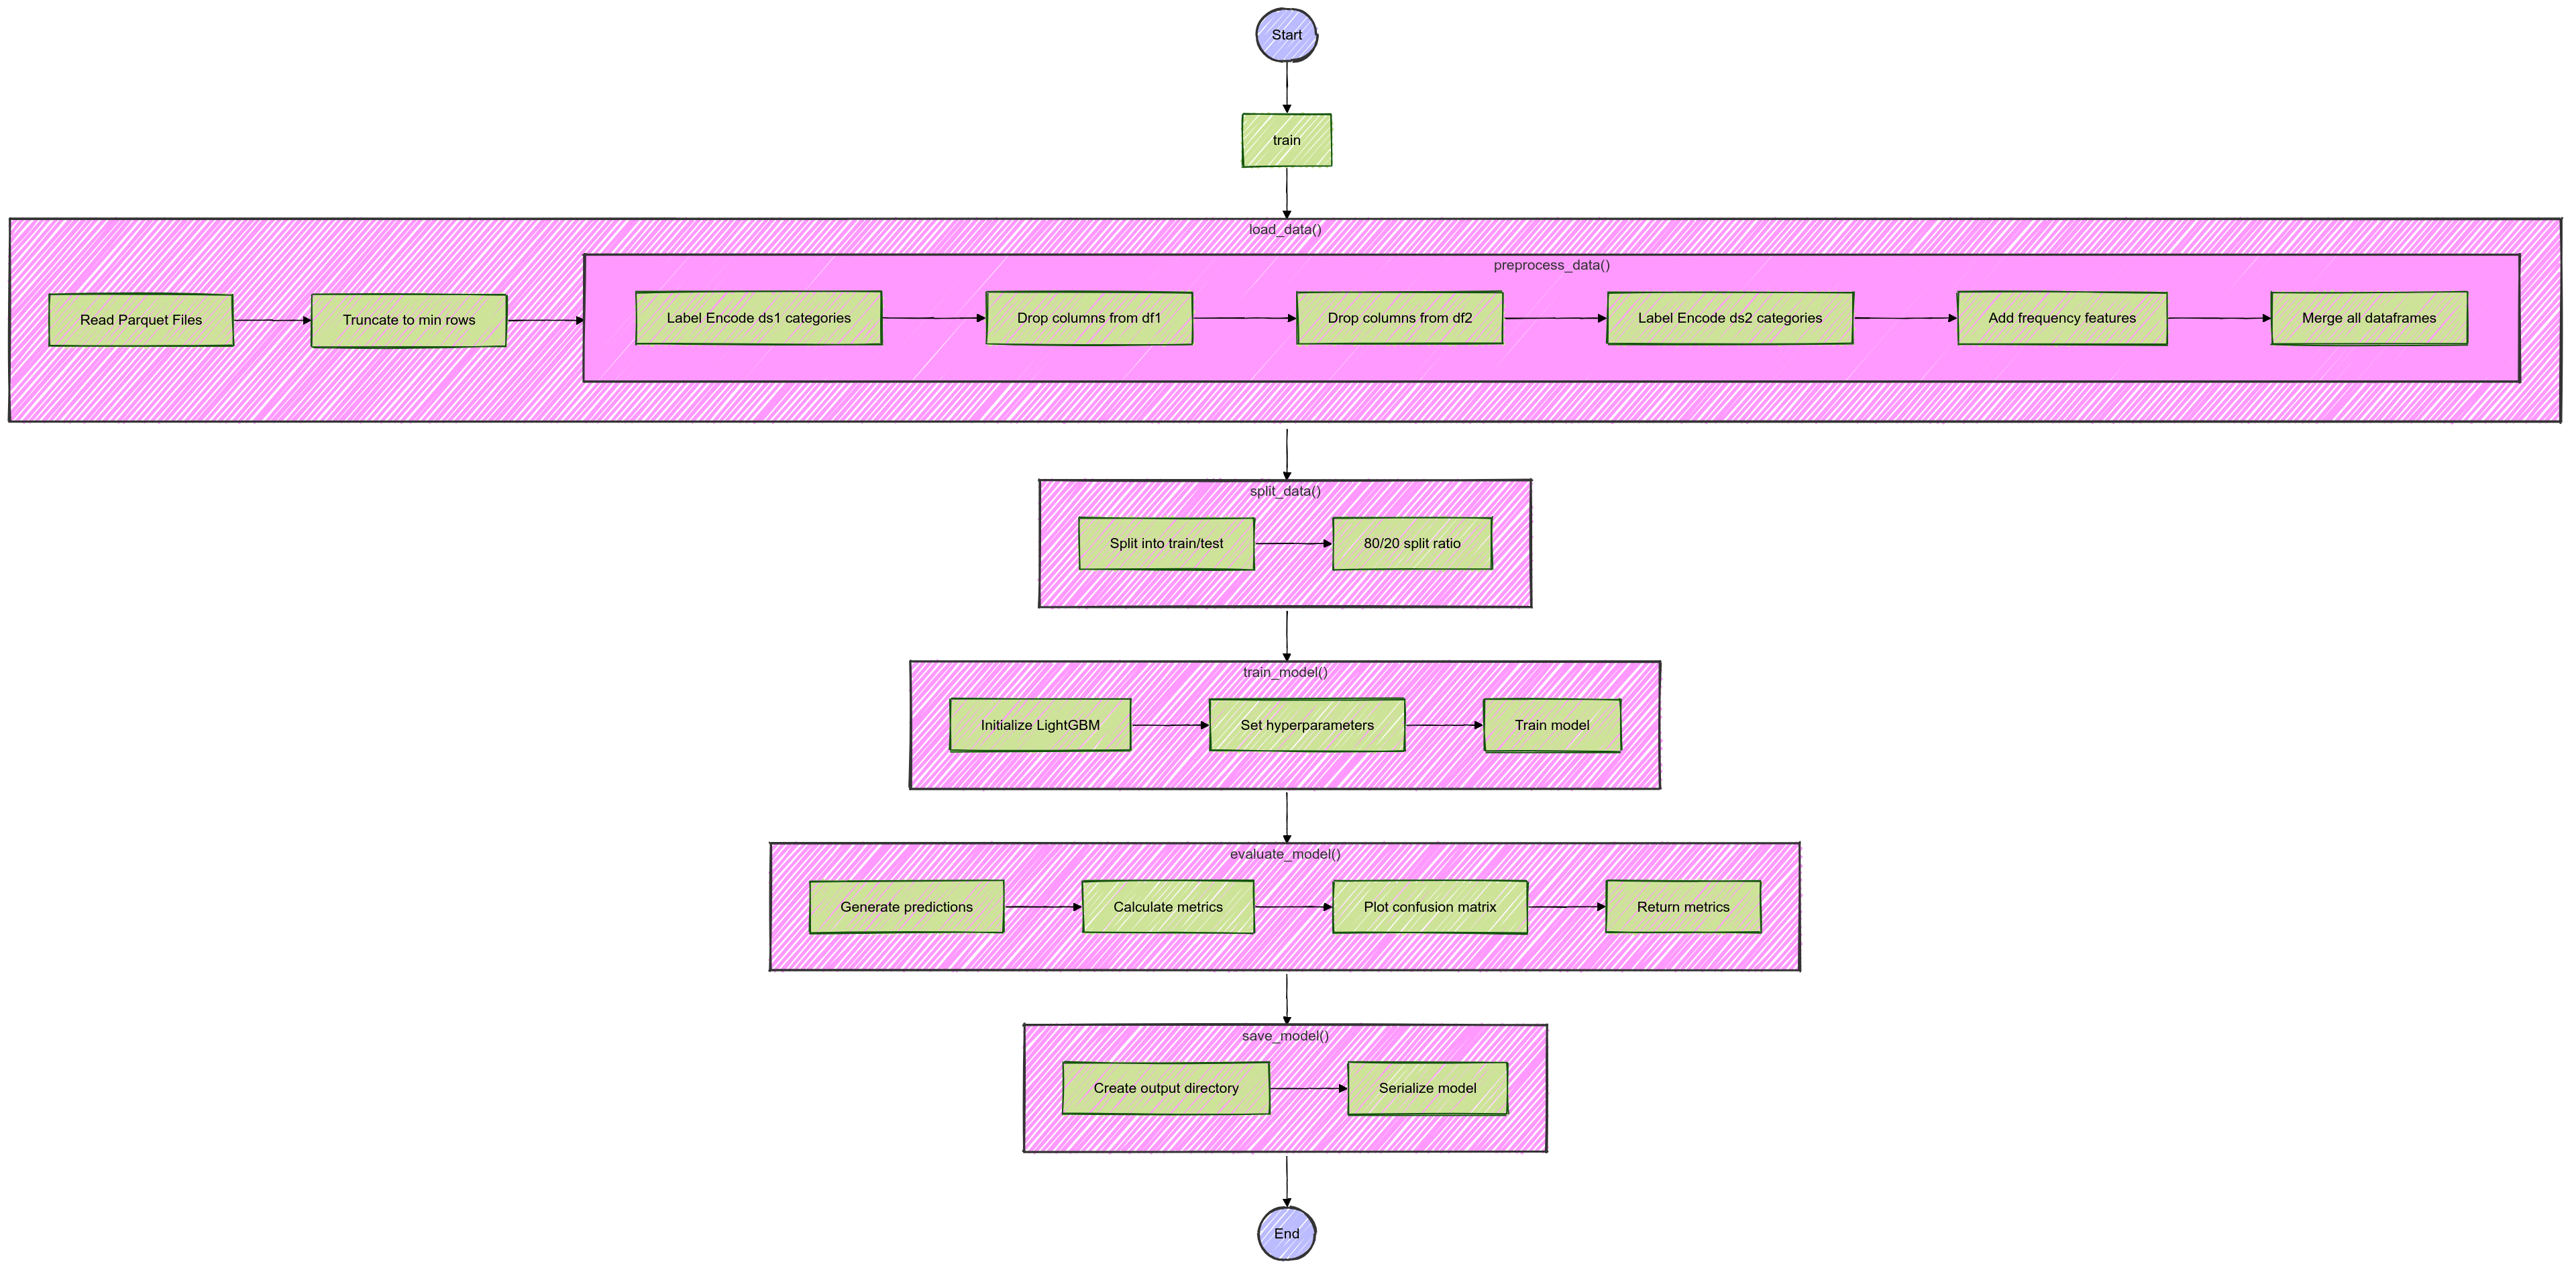

In [1]:
from IPython.display import Image
Image(filename='./steps.png')


## Import Necessary Libraries

The following libraries were installed using pip:
- pandas
- numpy
- os
- seaborn
- matplotlib
- LightGBM


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Read Datasets


In [3]:
df1 = pd.read_parquet("./data/data_source_1.parquet")
df2 = pd.read_parquet("./data/data_source_2.parquet")
df3 = pd.read_parquet("./data/data_source_3.parquet")

In [4]:
df1.head()

mid       ds1_f_1        ds1_f_2        ds1_f_3   ds1_f_4   ds1_f_5  \
0    0  6.165387e+04   23136.135671   17558.804329  0.542466  2.565388   
1    1  1.072220e+06  364947.764544  186277.555456  0.467809  3.380499   
2    2  4.826617e+05  199412.497164   46771.452836  0.394757  4.393336   
3    3  1.021842e+06  404405.635676   79996.354324  0.410477  5.195879   
4    4  2.089518e+05   49582.695480   56116.938579  0.434635  4.152852   

      ds1_f_6   ds1_f_7   ds1_f_8   ds1_f_9  ...  ds1_f_32  ds1_f_33  \
0  100.323540  0.431474  0.568526  517343.0  ...  0.622933  0.117396   
1  202.444909  0.337934  0.662066   46610.0  ...  0.533992  0.095268   
2  174.361243  0.189986  0.810014   83802.0  ...  0.458732  0.182768   
3  224.528758  0.165145  0.834855   41655.0  ...  0.574150  0.381094   
4  123.058229  0.530909  0.469091  616422.0  ...  0.322357  0.399488   

     ds1_f_34      ds1_f_35   ds1_f_36    ds1_f_37    ds1_f_38  ds1_f_39  \
0   26.022561  9.524297e+05 -1485393.0  -74.168188  Mid-Market    1238.0   
1   16.808085  1.178015e+06    13258.0   39.751739  Enterprise   44500.0   
2   29.138160  5.531847e+05    67154.0  403.375781  Mid-Market    1125.0   
3   83.985677  1.471365e+07 -3628387.0  -98.864999  Mid-Market    1000.0   
4  573.960646  1.633287e+06   389362.0  171.479785  Mid-Market     290.0   

             ds1_f_40  ds1_f_41  
0  a1VPz000003QcBBMA0    Medium  
1  a1V4J000002hagtUAA      High  
2  a1V4J000002hah9UAA      High  
3  a1V4J000002hagoUAA    Medium  
4  a1VPz000003QcBBMA0    Medium  

[5 rows x 42 columns]

In [15]:
df2.head()

mid         ds2_f_1      ds2_f_2  ds2_f_3     ds2_f_4 ds2_f_5 ds2_f_6  \
0    0   united states     762513.0   1238.0  mid-market  medium      34   
1    1   united states  206135279.0  44500.0  enterprise    high   44500   
2    2  united kingdom  213905112.0   1125.0  mid-market    high    1125   
3    3       australia  742495085.0   1000.0  mid-market  medium    1000   
4    4  united kingdom    5500000.0    290.0  mid-market  medium     290   

                               ds2_f_7                              ds2_f_8  \
0          consumer goods and services                           automotive   
1  hospitality, travel, and recreation  hospitality, travel, and recreation   
2          consumer goods and services                                 None   
3          consumer goods and services                                 None   
4                   financial services                             software   

             ds2_f_9  ...       ds2_f_23       ds2_f_24  ds2_f_25  ds2_f_26  \
0               None  ...  1,000 - 5,000  $100m - $200m  517343.0  0.442706   
1             gaming  ...       > 10,000           None   46610.0  0.432480   
2  apparel & fashion  ...  1,000 - 5,000  $100m - $200m   83802.0  0.000000   
3          retailing  ...  1,000 - 5,000    $25m - $50m   41655.0  0.000000   
4               None  ...    500 - 1,000    $25m - $50m  616422.0  0.000000   

                         ds2_f_27     ds2_f_28                  ds2_f_29  \
0      $1 mil to less than $5 mil    1955062.0       25 to less than 100   
1    $10 mil to less than $25 mil   12635185.0              less than 25   
2  $100 mil to less than $250 mil  199552180.0  1,000 to less than 5,000   
3                less than $1 mil        292.0  1,000 to less than 5,000   
4     $5 mil to less than $10 mil    6478950.0              less than 25   

   ds2_f_30  ds2_f_31       ds2_f_32  
0      34.0      34.0  north america  
1      10.0      10.0  north america  
2    1110.0       NaN           emea  
3    1514.0    1514.0           apac  
4      15.0      10.0  north america  

[5 rows x 33 columns]

In [16]:
df3.head()

mid  ds3_f_1  ds3_f_2  ds3_f_3  ds3_f_4  ds3_f_5  ds3_f_6  ds3_f_7  \
0    0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1    1      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
2    2      1.0      0.0      0.0      0.0      1.0      0.0      0.0   
3    3      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4    4      0.0      0.0      0.0      0.0      1.0      0.0      0.0   

   ds3_f_8  ds3_f_9  ...  ds3_f_64  ds3_f_65  ds3_f_66  ds3_f_67  ds3_f_68  \
0      1.0      1.0  ...       0.0       0.0       0.0       0.0       0.0   
1      0.0      1.0  ...       0.0       1.0       1.0       1.0       0.0   
2      0.0      1.0  ...       0.0       0.0       0.0       1.0       0.0   
3      0.0      0.0  ...       0.0       0.0       0.0       0.0       0.0   
4      0.0      1.0  ...       0.0       0.0       1.0       1.0       0.0   

   ds3_f_69  ds3_f_70  ds3_f_71  ds3_f_72  ds3_f_73  
0       0.0       0.0       0.0       0.0       1.0  
1       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0  

[5 rows x 74 columns]

## Sanity Check of Data

In [17]:
df1.shape

(1723, 42)

In [18]:
df2.shape

(1723, 33)

In [19]:
df3.shape

(1723, 74)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mid       1723 non-null   int64  
 1   ds1_f_1   1713 non-null   float64
 2   ds1_f_2   1714 non-null   float64
 3   ds1_f_3   1714 non-null   float64
 4   ds1_f_4   1712 non-null   float64
 5   ds1_f_5   1713 non-null   float64
 6   ds1_f_6   1711 non-null   float64
 7   ds1_f_7   1718 non-null   float64
 8   ds1_f_8   1718 non-null   float64
 9   ds1_f_9   1651 non-null   float64
 10  ds1_f_10  1666 non-null   object 
 11  ds1_f_11  1718 non-null   float64
 12  ds1_f_12  1675 non-null   float64
 13  ds1_f_13  1678 non-null   float64
 14  ds1_f_14  1718 non-null   float64
 15  ds1_f_15  1701 non-null   float64
 16  ds1_f_16  1434 non-null   float64
 17  ds1_f_17  1718 non-null   float64
 18  ds1_f_18  1701 non-null   float64
 19  ds1_f_19  1649 non-null   float64
 20  ds1_f_20  1718 non-null   floa

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mid       1723 non-null   int64  
 1   ds2_f_1   1716 non-null   object 
 2   ds2_f_2   1651 non-null   float64
 3   ds2_f_3   1695 non-null   float64
 4   ds2_f_4   1723 non-null   object 
 5   ds2_f_5   1675 non-null   object 
 6   ds2_f_6   1642 non-null   object 
 7   ds2_f_7   1659 non-null   object 
 8   ds2_f_8   491 non-null    object 
 9   ds2_f_9   1020 non-null   object 
 10  ds2_f_10  204 non-null    object 
 11  ds2_f_11  1599 non-null   object 
 12  ds2_f_12  1656 non-null   object 
 13  ds2_f_13  1574 non-null   object 
 14  ds2_f_14  1714 non-null   float64
 15  ds2_f_15  1715 non-null   float64
 16  ds2_f_16  1714 non-null   float64
 17  ds2_f_17  1684 non-null   float64
 18  ds2_f_18  1712 non-null   float64
 19  ds2_f_19  1714 non-null   float64
 20  ds2_f_20  1716 non-null   floa

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 74 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mid       1723 non-null   int64  
 1   ds3_f_1   1723 non-null   float64
 2   ds3_f_2   1723 non-null   float64
 3   ds3_f_3   1723 non-null   float64
 4   ds3_f_4   1723 non-null   float64
 5   ds3_f_5   1723 non-null   float64
 6   ds3_f_6   1723 non-null   float64
 7   ds3_f_7   1723 non-null   float64
 8   ds3_f_8   1723 non-null   float64
 9   ds3_f_9   1723 non-null   float64
 10  ds3_f_10  1723 non-null   float64
 11  ds3_f_11  1723 non-null   float64
 12  ds3_f_12  1723 non-null   float64
 13  ds3_f_13  1723 non-null   float64
 14  ds3_f_14  1723 non-null   float64
 15  ds3_f_15  1723 non-null   float64
 16  ds3_f_16  1723 non-null   float64
 17  ds3_f_17  1723 non-null   float64
 18  ds3_f_18  1723 non-null   float64
 19  ds3_f_19  1723 non-null   float64
 20  ds3_f_20  1723 non-null   floa

In [23]:
#finding missing values
df1.isnull().sum()

mid           0
ds1_f_1      10
ds1_f_2       9
ds1_f_3       9
ds1_f_4      11
ds1_f_5      10
ds1_f_6      12
ds1_f_7       5
ds1_f_8       5
ds1_f_9      72
ds1_f_10     57
ds1_f_11      5
ds1_f_12     48
ds1_f_13     45
ds1_f_14      5
ds1_f_15     22
ds1_f_16    289
ds1_f_17      5
ds1_f_18     22
ds1_f_19     74
ds1_f_20      5
ds1_f_21     50
ds1_f_22     99
ds1_f_23      5
ds1_f_24     48
ds1_f_25     45
ds1_f_26      5
ds1_f_27     59
ds1_f_28    157
ds1_f_29      5
ds1_f_30      5
ds1_f_31     65
ds1_f_32      5
ds1_f_33      5
ds1_f_34    285
ds1_f_35      7
ds1_f_36    155
ds1_f_37     92
ds1_f_38      0
ds1_f_39     13
ds1_f_40      0
ds1_f_41     44
dtype: int64

In [24]:
#finding missing values
df2.isnull().sum()

mid            0
ds2_f_1        7
ds2_f_2       72
ds2_f_3       28
ds2_f_4        0
ds2_f_5       48
ds2_f_6       81
ds2_f_7       64
ds2_f_8     1232
ds2_f_9      703
ds2_f_10    1519
ds2_f_11     124
ds2_f_12      67
ds2_f_13     149
ds2_f_14       9
ds2_f_15       8
ds2_f_16       9
ds2_f_17      39
ds2_f_18      11
ds2_f_19       9
ds2_f_20       7
ds2_f_21       7
ds2_f_22      97
ds2_f_23      67
ds2_f_24     149
ds2_f_25      67
ds2_f_26      38
ds2_f_27     255
ds2_f_28     396
ds2_f_29     255
ds2_f_30     255
ds2_f_31     449
ds2_f_32       1
dtype: int64

In [25]:
df3.isnull().sum()


mid         0
ds3_f_1     0
ds3_f_2     0
ds3_f_3     0
ds3_f_4     0
           ..
ds3_f_69    0
ds3_f_70    0
ds3_f_71    0
ds3_f_72    0
ds3_f_73    0
Length: 74, dtype: int64

In [26]:
#finding missing values
df1.isnull().sum()/df1.shape[0]*100


mid          0.000000
ds1_f_1      0.580383
ds1_f_2      0.522345
ds1_f_3      0.522345
ds1_f_4      0.638421
ds1_f_5      0.580383
ds1_f_6      0.696460
ds1_f_7      0.290192
ds1_f_8      0.290192
ds1_f_9      4.178758
ds1_f_10     3.308183
ds1_f_11     0.290192
ds1_f_12     2.785839
ds1_f_13     2.611724
ds1_f_14     0.290192
ds1_f_15     1.276843
ds1_f_16    16.773070
ds1_f_17     0.290192
ds1_f_18     1.276843
ds1_f_19     4.294835
ds1_f_20     0.290192
ds1_f_21     2.901915
ds1_f_22     5.745792
ds1_f_23     0.290192
ds1_f_24     2.785839
ds1_f_25     2.611724
ds1_f_26     0.290192
ds1_f_27     3.424260
ds1_f_28     9.112014
ds1_f_29     0.290192
ds1_f_30     0.290192
ds1_f_31     3.772490
ds1_f_32     0.290192
ds1_f_33     0.290192
ds1_f_34    16.540917
ds1_f_35     0.406268
ds1_f_36     8.995937
ds1_f_37     5.339524
ds1_f_38     0.000000
ds1_f_39     0.754498
ds1_f_40     0.000000
ds1_f_41     2.553685
dtype: float64

Column 8,9,10 has null values more than 50% of the occurances, so upon checking, we can skip or drop them 👇

In [27]:
#finding missing values
df2.isnull().sum()/df2.shape[0]*100

mid          0.000000
ds2_f_1      0.406268
ds2_f_2      4.178758
ds2_f_3      1.625073
ds2_f_4      0.000000
ds2_f_5      2.785839
ds2_f_6      4.701103
ds2_f_7      3.714452
ds2_f_8     71.503192
ds2_f_9     40.800929
ds2_f_10    88.160186
ds2_f_11     7.196750
ds2_f_12     3.888566
ds2_f_13     8.647707
ds2_f_14     0.522345
ds2_f_15     0.464306
ds2_f_16     0.522345
ds2_f_17     2.263494
ds2_f_18     0.638421
ds2_f_19     0.522345
ds2_f_20     0.406268
ds2_f_21     0.406268
ds2_f_22     5.629716
ds2_f_23     3.888566
ds2_f_24     8.647707
ds2_f_25     3.888566
ds2_f_26     2.205456
ds2_f_27    14.799768
ds2_f_28    22.983169
ds2_f_29    14.799768
ds2_f_30    14.799768
ds2_f_31    26.059199
ds2_f_32     0.058038
dtype: float64

In [28]:
#finding missing values
df3.isnull().sum()/df3.shape[0]*100

mid         0.0
ds3_f_1     0.0
ds3_f_2     0.0
ds3_f_3     0.0
ds3_f_4     0.0
           ... 
ds3_f_69    0.0
ds3_f_70    0.0
ds3_f_71    0.0
ds3_f_72    0.0
ds3_f_73    0.0
Length: 74, dtype: float64

In [29]:
#finding duplicates
df1.duplicated().sum()


np.int64(0)

In [30]:
#finding duplicates
df2.duplicated().sum()

np.int64(0)

In [31]:
#finding duplicates
df3.duplicated().sum()

np.int64(0)

This gives us an idea that the categories can be converted to a labeled format 👇

In [32]:
# Inspecting Categorical Data, garbage data
for i in df1.select_dtypes(include=['object']).columns:
    print(df1[i].value_counts())
    print('-'*50)

ds1_f_10
Lifestyle/Fashion_and_Apparel                                              103
Computers_Electronics_and_Technology/Programming_and_Developer_Software     74
Finance/Finance                                                             73
Finance/Financial_Planning_and_Management                                   71
Finance/Banking_Credit_and_Lending                                          62
                                                                          ... 
Health/Childrens_Health                                                      1
Science_and_Education                                                        1
Law_and_Government                                                           1
Arts_and_Entertainment                                                       1
E-commerce_and_Shopping/Auctions                                             1
Name: count, Length: 144, dtype: int64
--------------------------------------------------
ds1_f_38
Mid-Market    988
Enter

## Pre Processing Data Source 1

In [33]:
def preprocess_data(df1):
    df1[['main_category', 'subcategory']] = df1['ds1_f_10'].str.split('/', expand=True)

    # Fill missing values
    df1 = df1.fillna({
        'main_category': 'Unknown',
        'subcategory': 'Unknown'
    })

    # Encode market segments
    market_segment_map = {
        'Enterprise': 3,
        'Strategic': 2,
        'Mid-Market': 1
    }
    df1['market_segment_encoded'] = df1['ds1_f_market_segment'].map(market_segment_map)

    # Handle numeric columns
    numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
    df1[numeric_cols] = df1[numeric_cols].fillna(df1[numeric_cols].mean())

    return df1

In [34]:
# Inspecting Categorical Data, garbage data
for i in df3.select_dtypes(include=['object']).columns:
    print(df3[i].value_counts())
    print('-'*50)

## EDA

In [35]:
df1.describe(include='object')


ds1_f_10    ds1_f_38            ds1_f_40 ds1_f_41
count                            1666        1723                1723     1679
unique                            144           4                  16        3
top     Lifestyle/Fashion_and_Apparel  Mid-Market  a1VPz000003QcBBMA0     High
freq                              103         988                 605     1036

In [36]:
df2.describe(include='object')

ds2_f_1     ds2_f_4 ds2_f_5 ds2_f_6  \
count            1716        1723    1675    1642   
unique             52           4       3     732   
top     united states  mid-market    high     150   
freq              955        1015    1034      67   

                            ds2_f_7   ds2_f_8    ds2_f_9   ds2_f_10  ds2_f_11  \
count                          1659       491       1020        204      1599   
unique                           24        24         45         26      1296   
top     consumer goods and services  internet  retailing  retailing  50000000   
freq                            411       115        239         75        78   

             ds2_f_12 ds2_f_13       ds2_f_23 ds2_f_24          ds2_f_27  \
count            1656     1574           1656     1574              1468   
unique              8       13              8       13                10   
top     1,000 - 5,000    > $1b  1,000 - 5,000    > $1b  less than $1 mil   
freq              396      513            396      513               313   

            ds2_f_29       ds2_f_32  
count           1468           1722  
unique             8              3  
top     less than 25  north america  
freq             478           1014

In [37]:
df3.describe()

mid      ds3_f_1      ds3_f_2      ds3_f_3      ds3_f_4  \
count  1723.000000  1723.000000  1723.000000  1723.000000  1723.000000   
mean    861.000000     0.276262     0.031341     0.048172     0.085897   
std     497.531574     0.447278     0.174287     0.214191     0.280293   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     430.500000     0.000000     0.000000     0.000000     0.000000   
50%     861.000000     0.000000     0.000000     0.000000     0.000000   
75%    1291.500000     1.000000     0.000000     0.000000     0.000000   
max    1722.000000     1.000000     1.000000     1.000000     1.000000   

           ds3_f_5      ds3_f_6      ds3_f_7      ds3_f_8      ds3_f_9  ...  \
count  1723.000000  1723.000000  1723.000000  1723.000000  1723.000000  ...   
mean      0.229251     0.082995     0.107371     0.366802     0.773651  ...   
std       0.420473     0.275954     0.309674     0.482072     0.418589  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     1.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     1.000000  ...   
75%       0.000000     0.000000     0.000000     1.000000     1.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

          ds3_f_64     ds3_f_65     ds3_f_66     ds3_f_67     ds3_f_68  \
count  1723.000000  1723.000000  1723.000000  1723.000000  1723.000000   
mean      0.214161     0.165409     0.428323     0.500290     0.016831   
std       0.410358     0.371657     0.494979     0.500145     0.128676   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     1.000000     0.000000   
75%       0.000000     0.000000     1.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          ds3_f_69     ds3_f_70     ds3_f_71     ds3_f_72     ds3_f_73  
count  1723.000000  1723.000000  1723.000000  1723.000000  1723.000000  
mean      0.203714     0.057458     0.101567     0.078932     0.168311  
std       0.402876     0.232783     0.302166     0.269711     0.374251  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 74 columns]

In [38]:
df1.head()

mid       ds1_f_1        ds1_f_2        ds1_f_3   ds1_f_4   ds1_f_5  \
0    0  6.165387e+04   23136.135671   17558.804329  0.542466  2.565388   
1    1  1.072220e+06  364947.764544  186277.555456  0.467809  3.380499   
2    2  4.826617e+05  199412.497164   46771.452836  0.394757  4.393336   
3    3  1.021842e+06  404405.635676   79996.354324  0.410477  5.195879   
4    4  2.089518e+05   49582.695480   56116.938579  0.434635  4.152852   

      ds1_f_6   ds1_f_7   ds1_f_8   ds1_f_9  ...  ds1_f_32  ds1_f_33  \
0  100.323540  0.431474  0.568526  517343.0  ...  0.622933  0.117396   
1  202.444909  0.337934  0.662066   46610.0  ...  0.533992  0.095268   
2  174.361243  0.189986  0.810014   83802.0  ...  0.458732  0.182768   
3  224.528758  0.165145  0.834855   41655.0  ...  0.574150  0.381094   
4  123.058229  0.530909  0.469091  616422.0  ...  0.322357  0.399488   

     ds1_f_34      ds1_f_35   ds1_f_36    ds1_f_37    ds1_f_38  ds1_f_39  \
0   26.022561  9.524297e+05 -1485393.0  -74.168188  Mid-Market    1238.0   
1   16.808085  1.178015e+06    13258.0   39.751739  Enterprise   44500.0   
2   29.138160  5.531847e+05    67154.0  403.375781  Mid-Market    1125.0   
3   83.985677  1.471365e+07 -3628387.0  -98.864999  Mid-Market    1000.0   
4  573.960646  1.633287e+06   389362.0  171.479785  Mid-Market     290.0   

             ds1_f_40  ds1_f_41  
0  a1VPz000003QcBBMA0    Medium  
1  a1V4J000002hagtUAA      High  
2  a1V4J000002hah9UAA      High  
3  a1V4J000002hagoUAA    Medium  
4  a1VPz000003QcBBMA0    Medium  

[5 rows x 42 columns]

From below histograms, we have standard, skewed (positive and negative) variations here. But applying mean , median , mode imputation on every column might turn into a biased dataset 👇

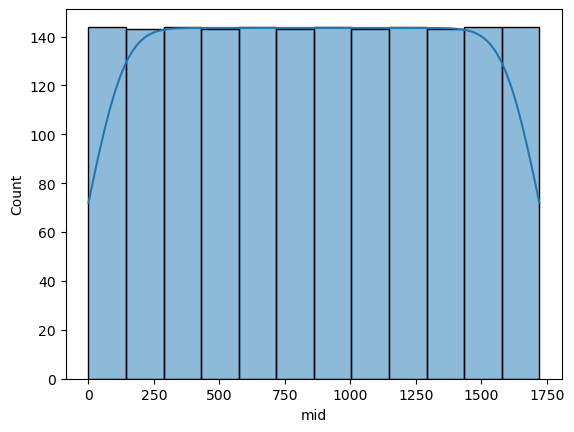

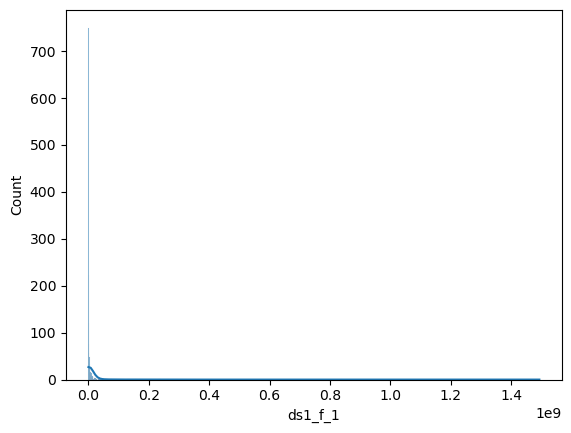

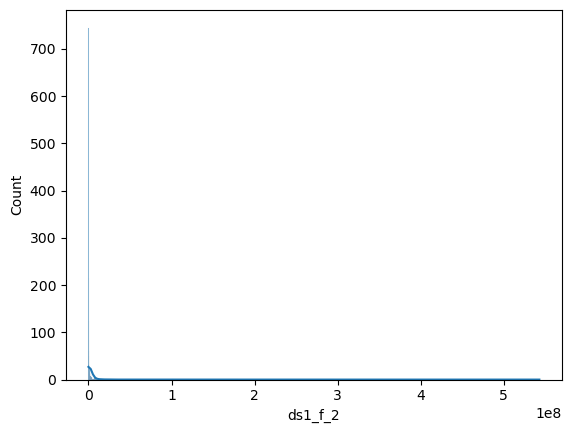

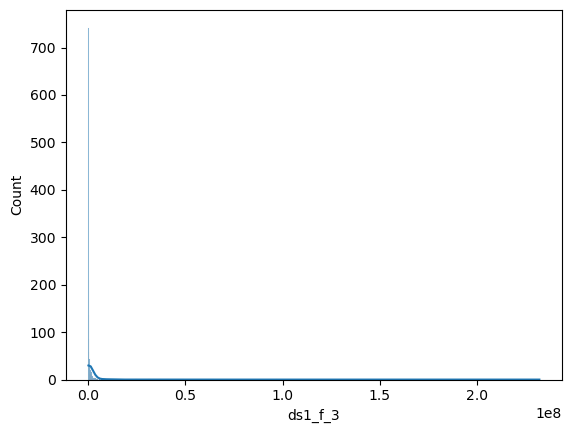

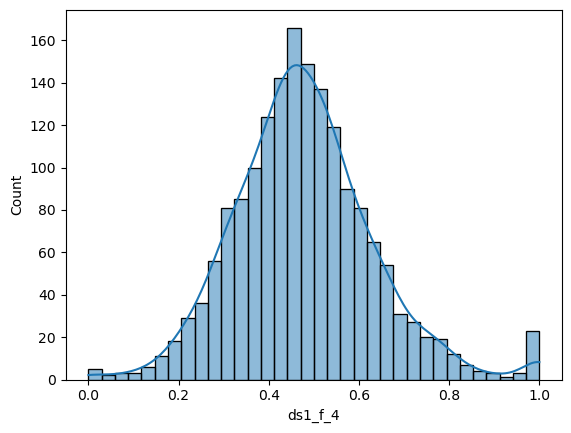

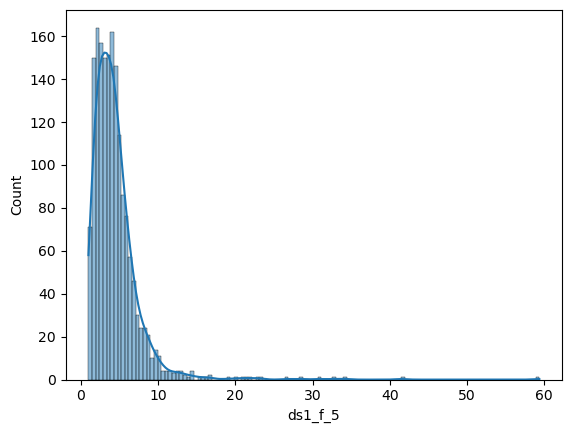

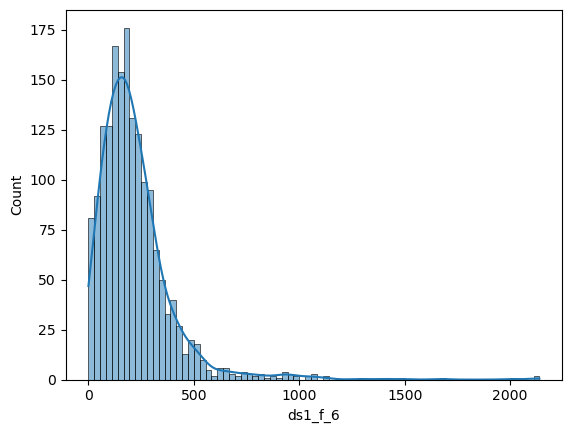

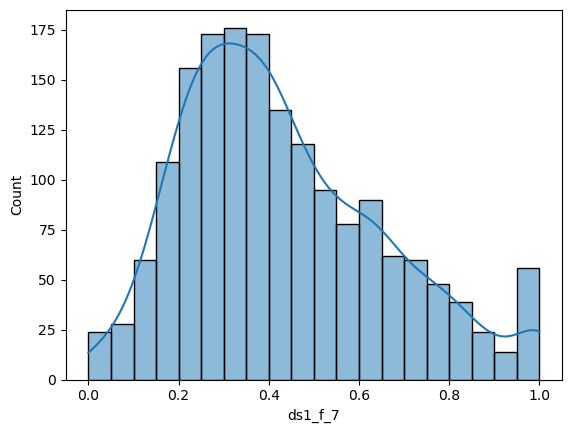

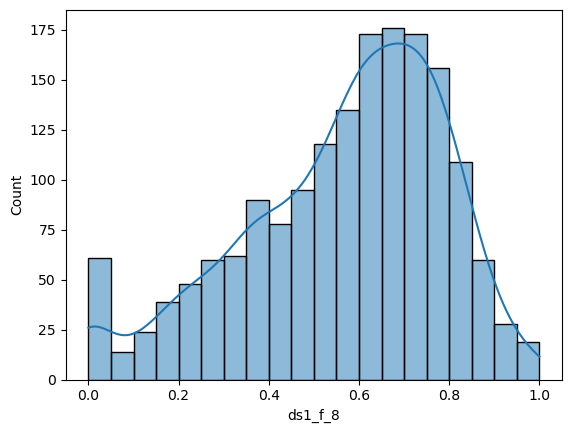

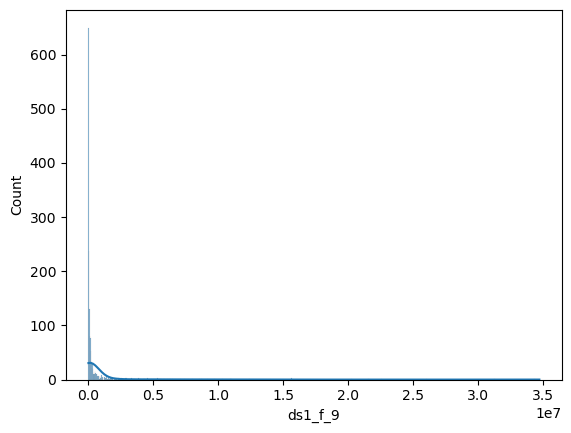

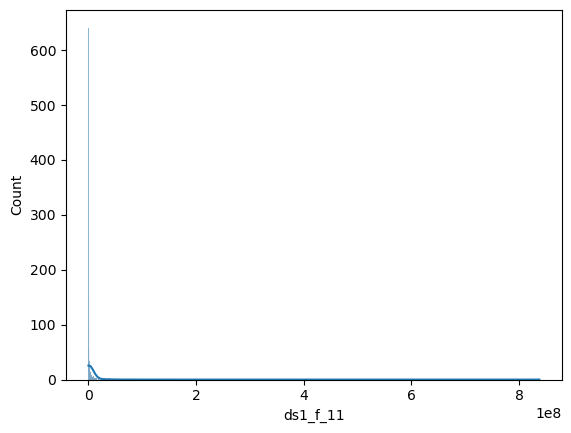

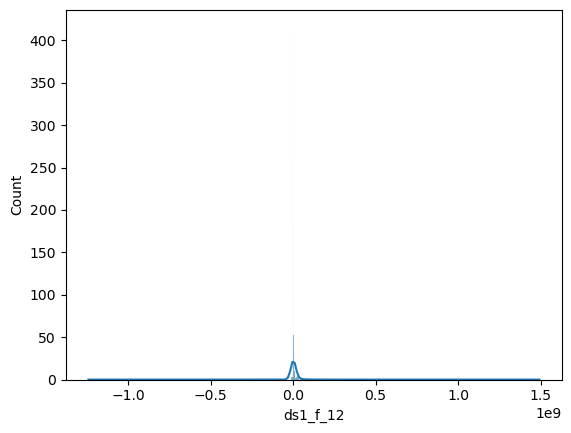

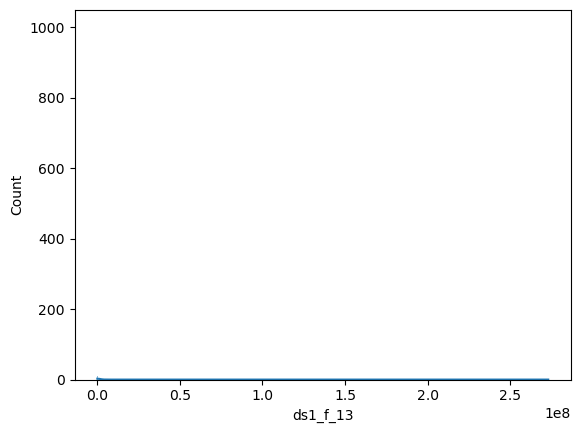

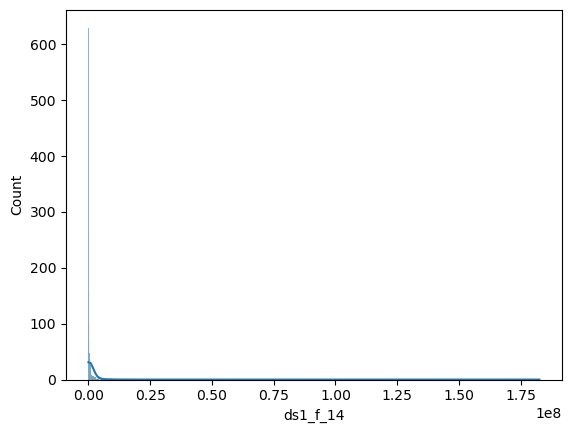

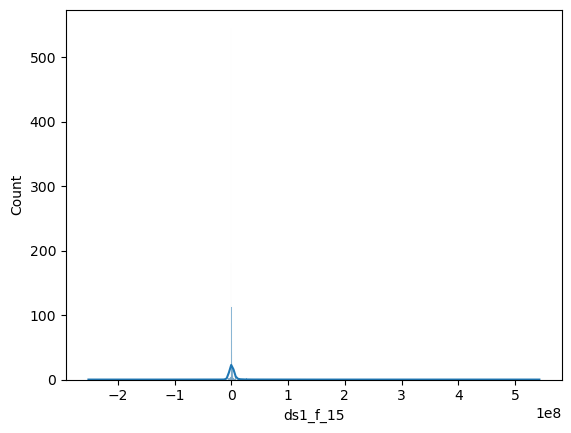

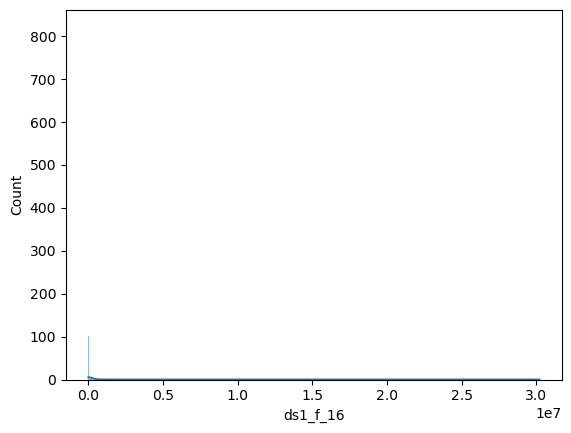

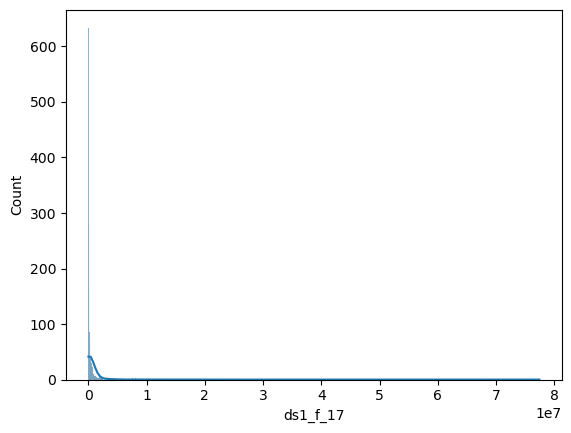

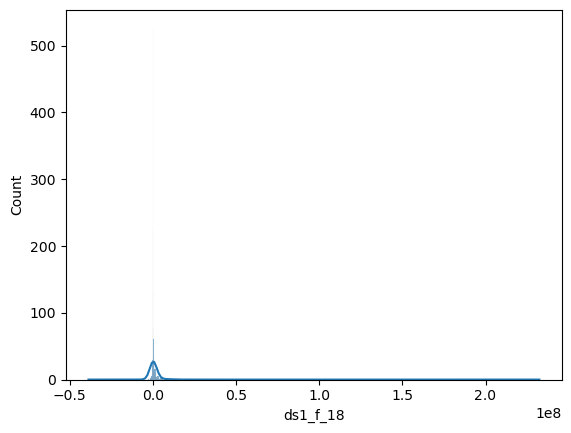

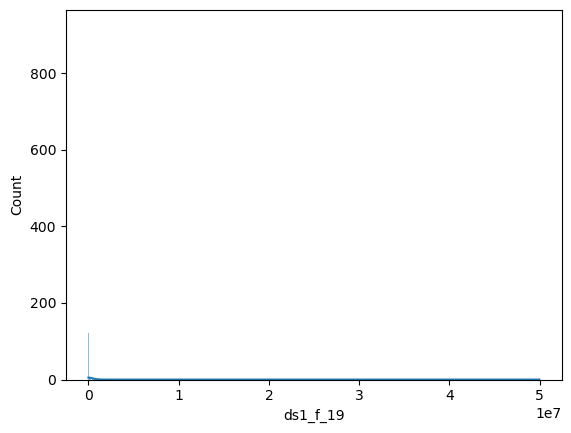

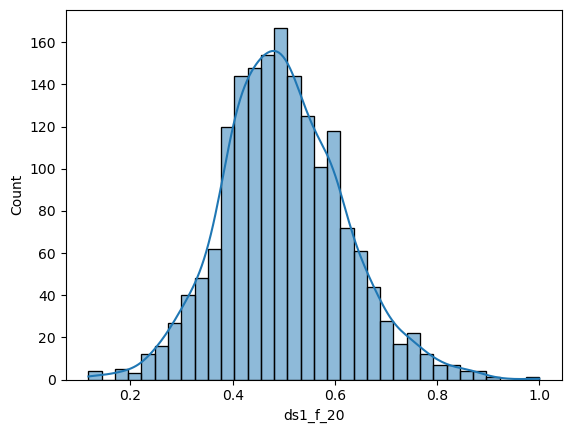

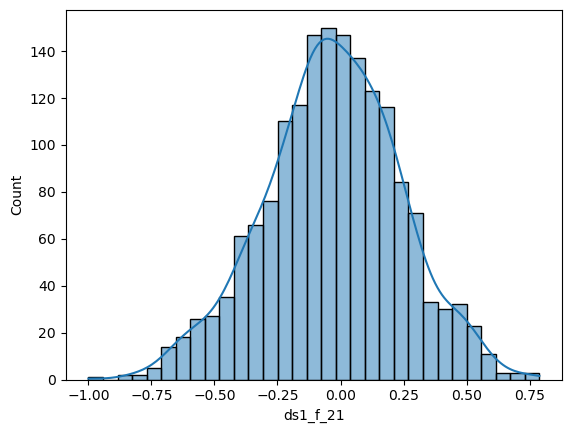

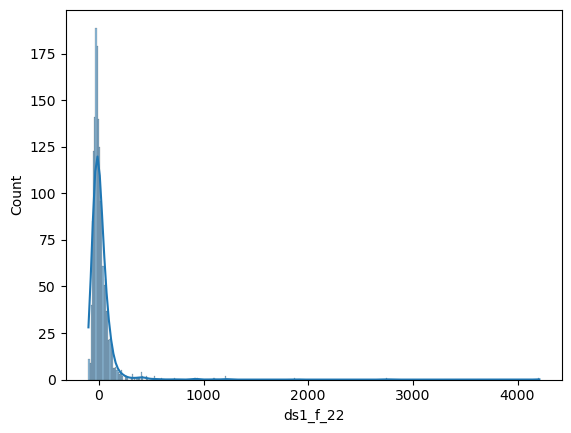

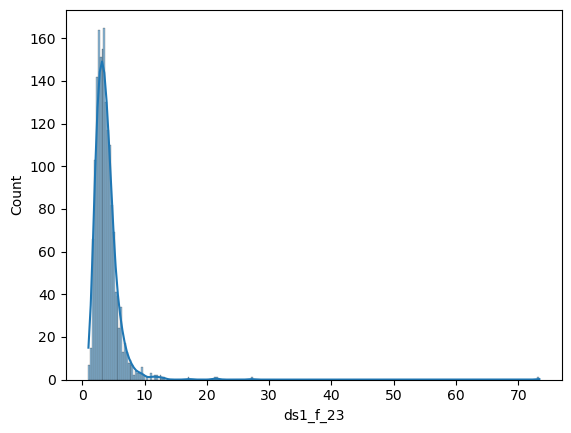

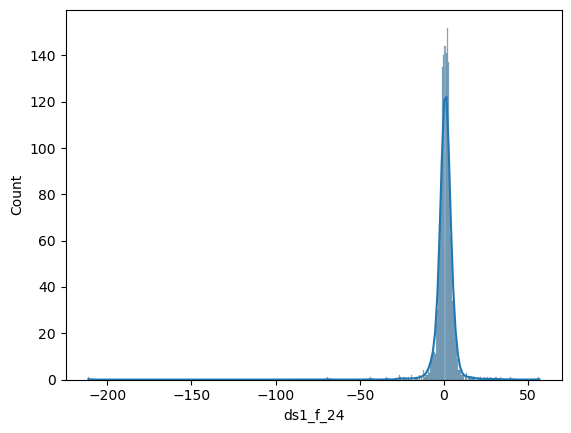

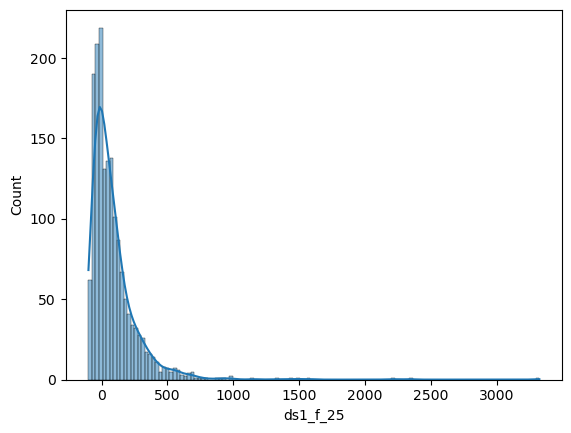

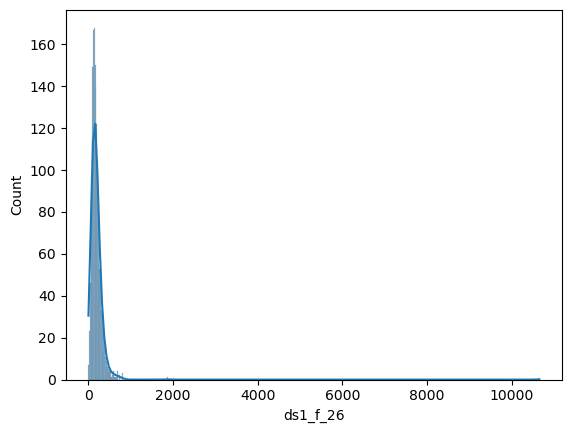

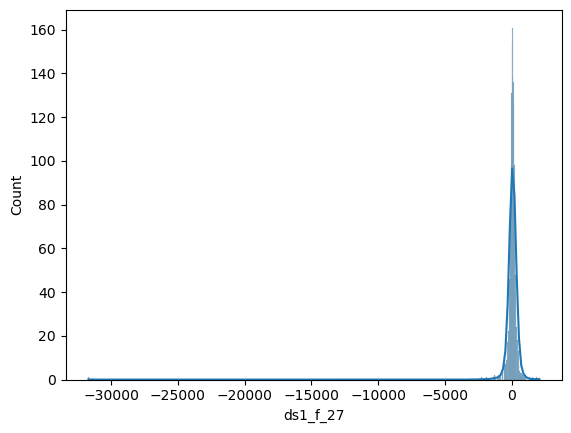

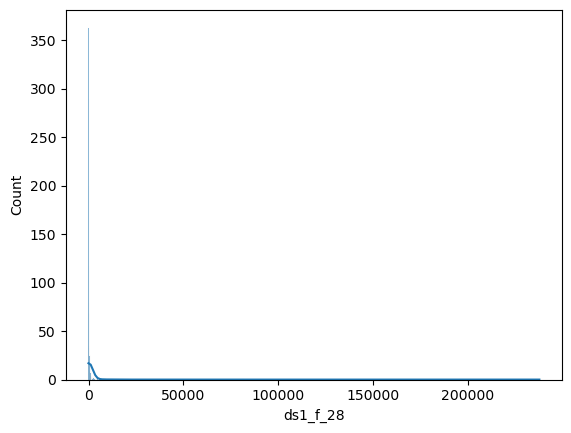

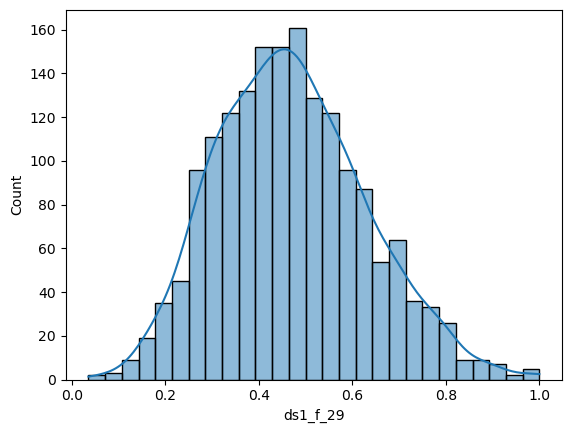

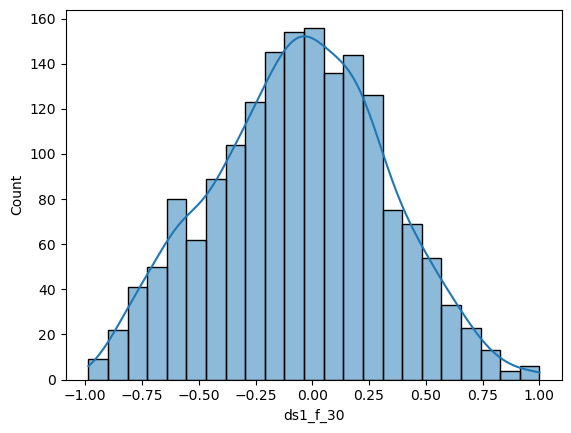

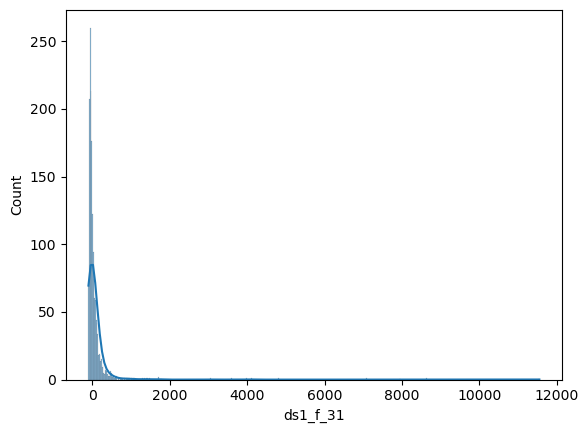

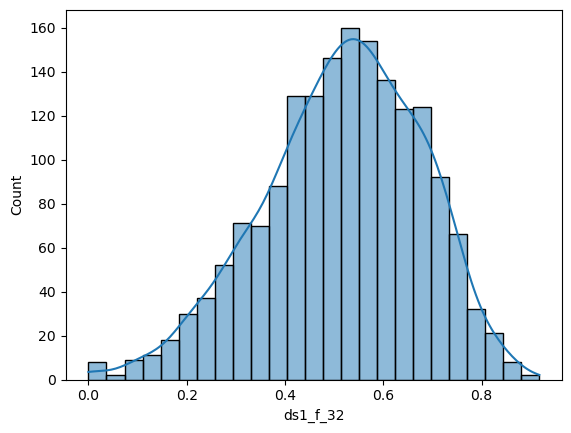

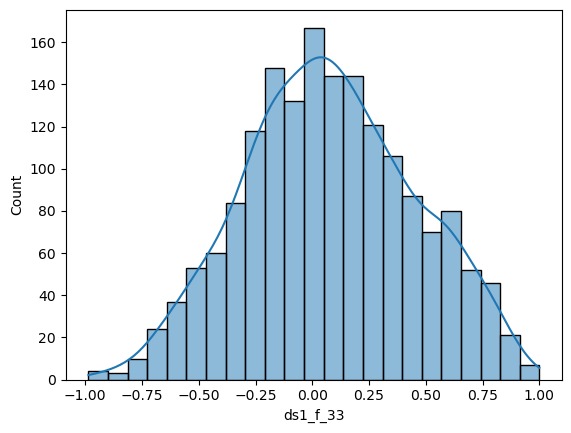

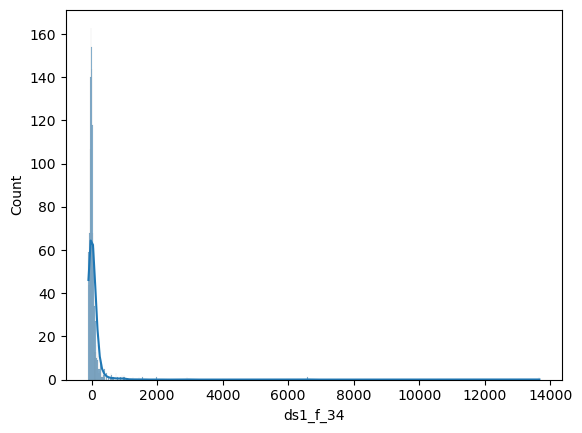

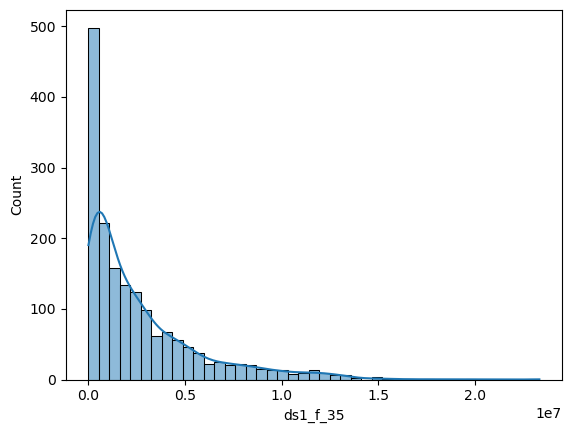

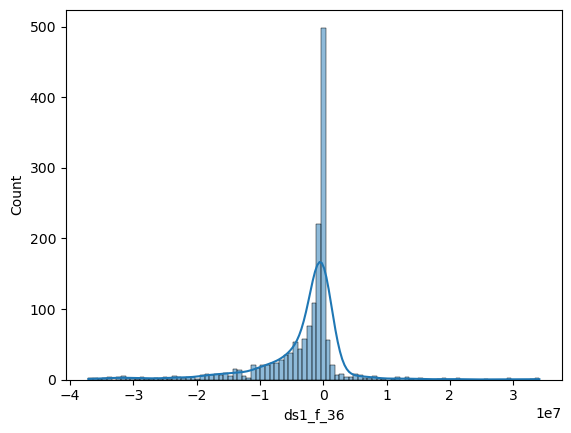

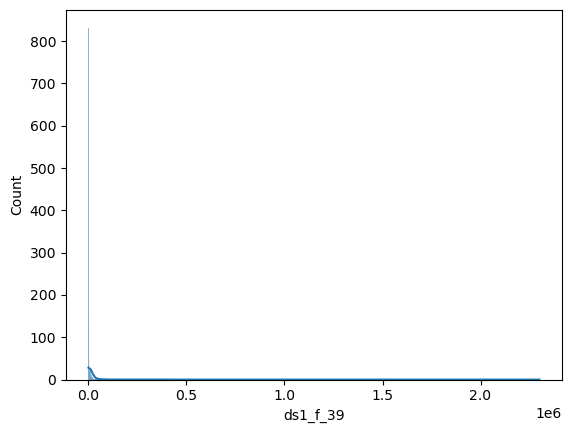

In [39]:
## histogram
for i in df1.select_dtypes(include='number').columns:
    if i != 'ds1_f_37':
        # plt.figure(figsize=(10,4))
        sns.histplot(data=df1, x=i, kde=True)
        # plt.title(i)
        plt.show()


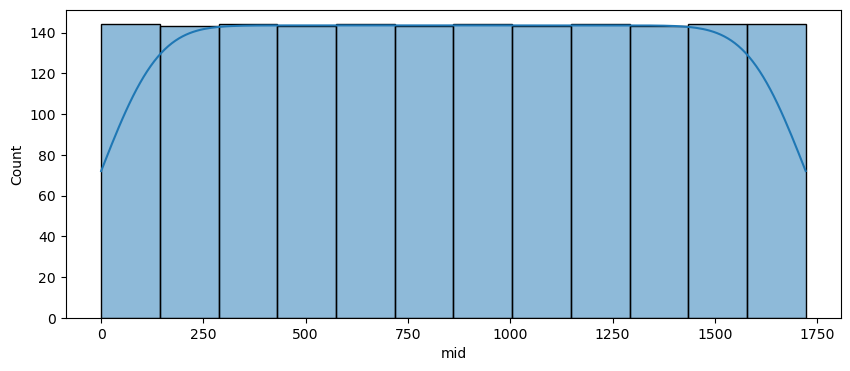

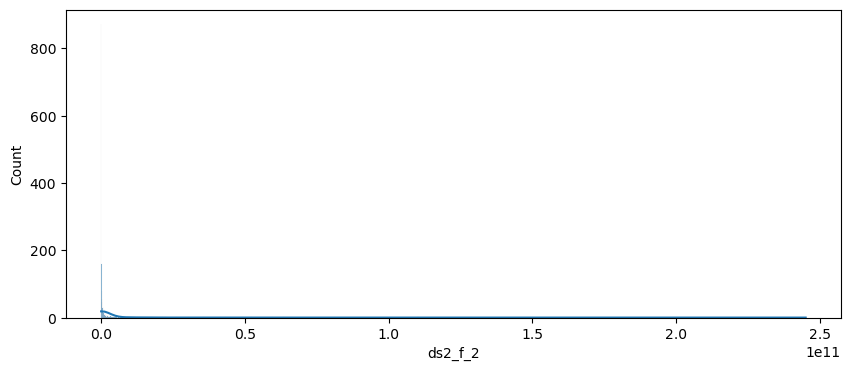

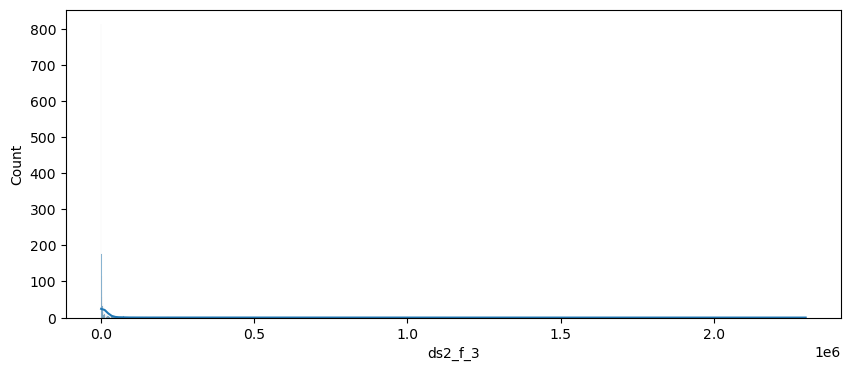

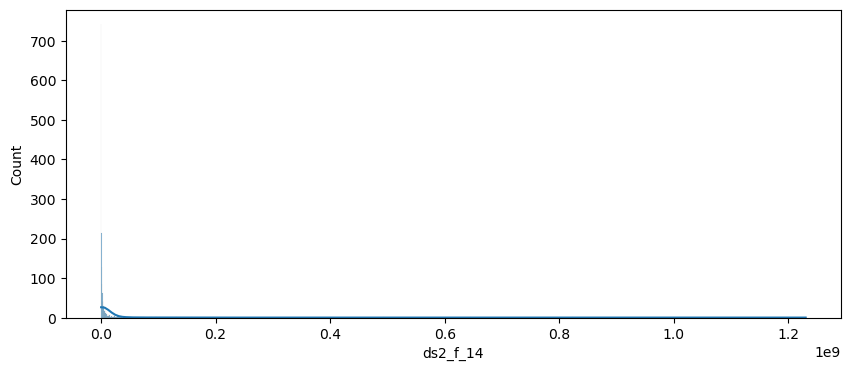

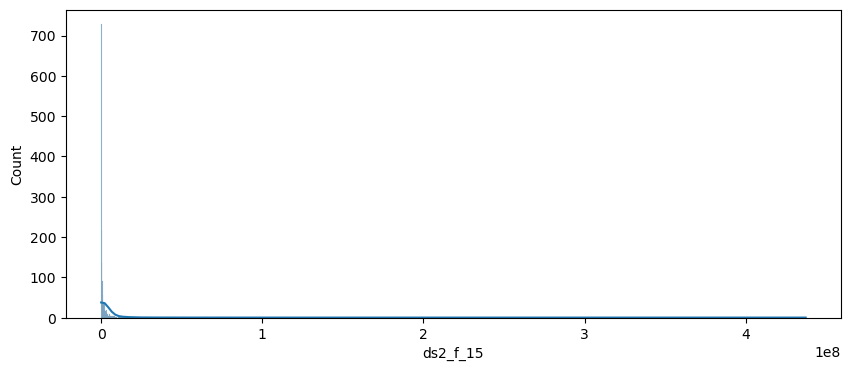

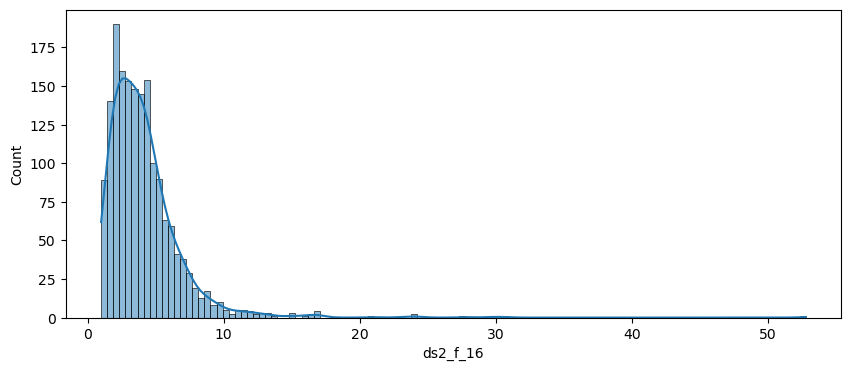

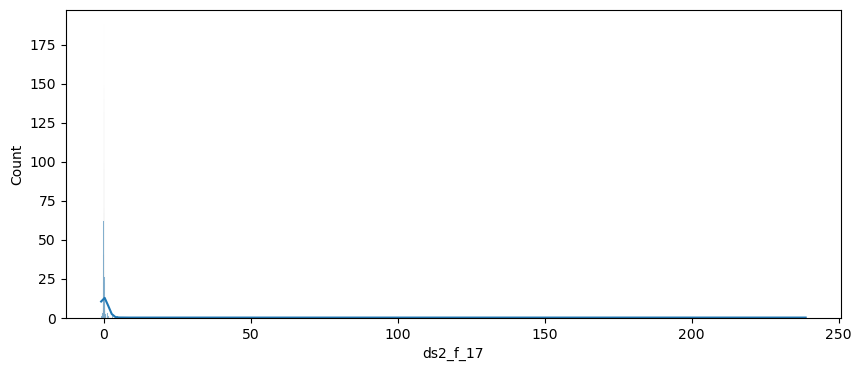

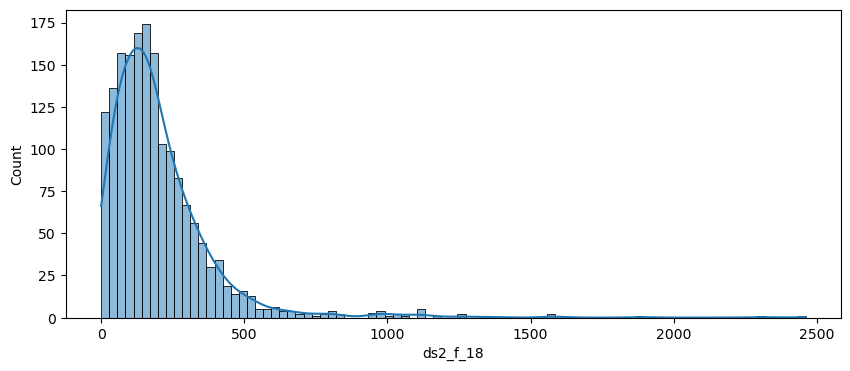

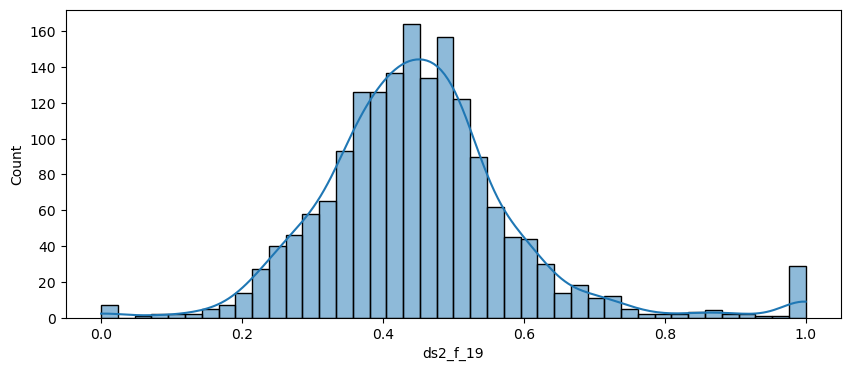

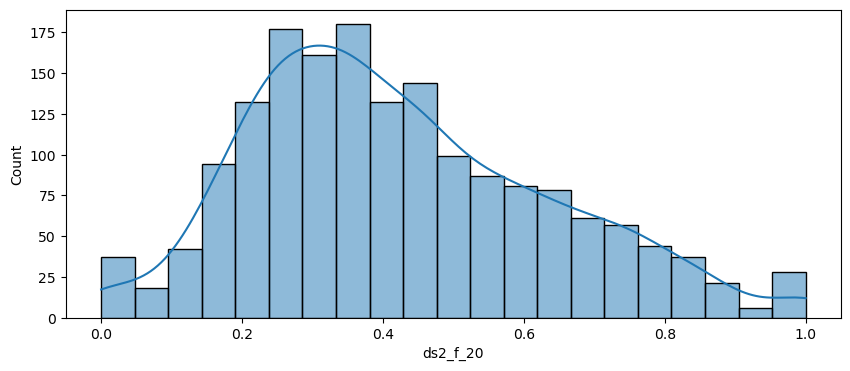

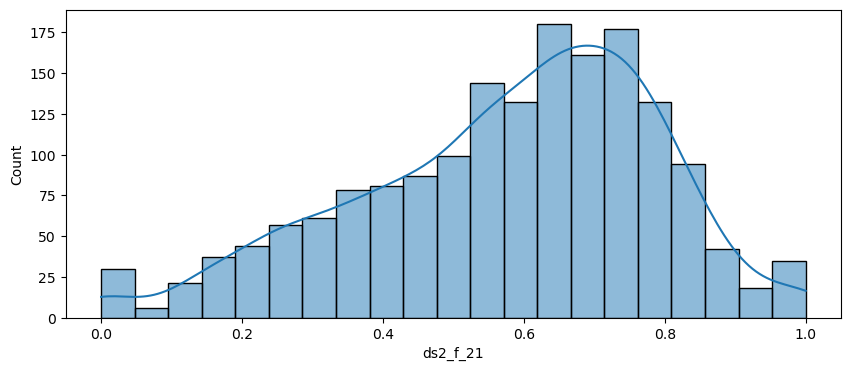

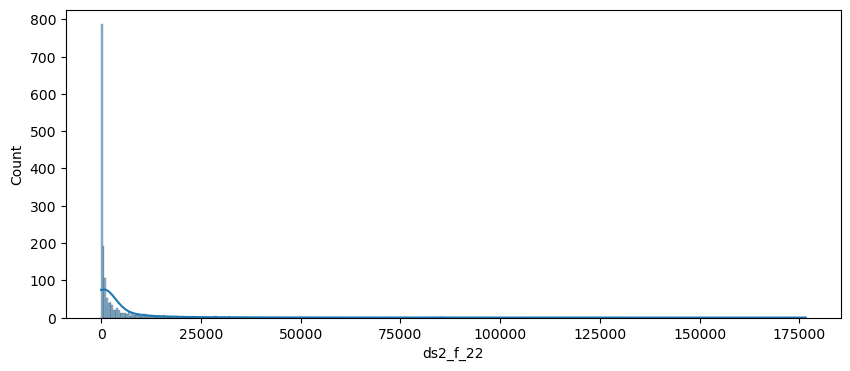

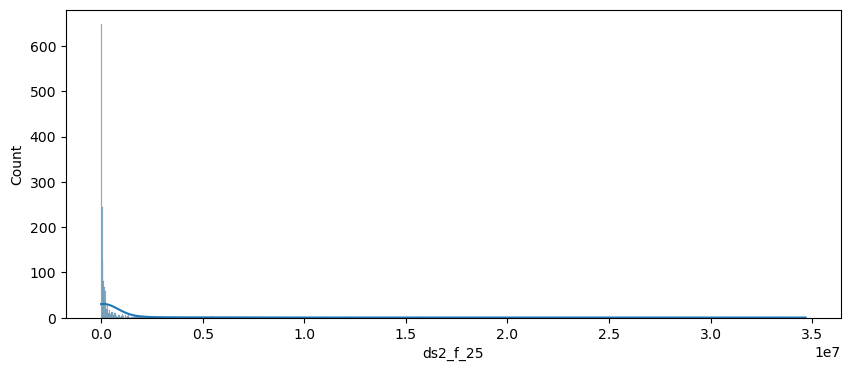

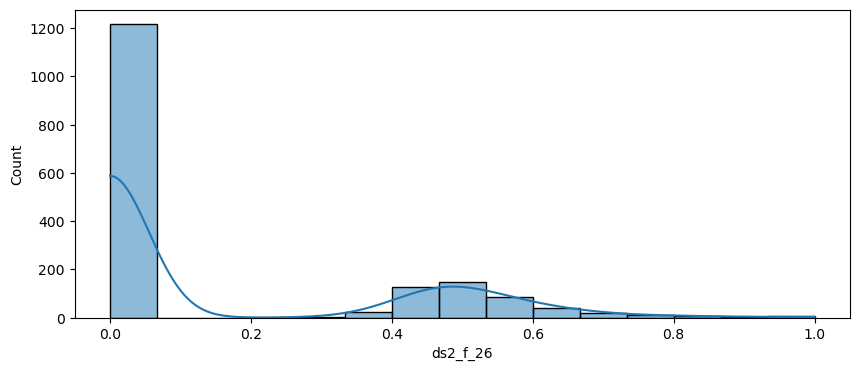

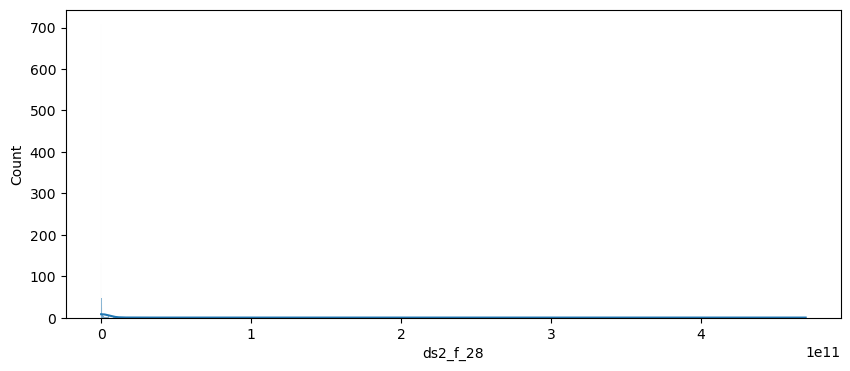

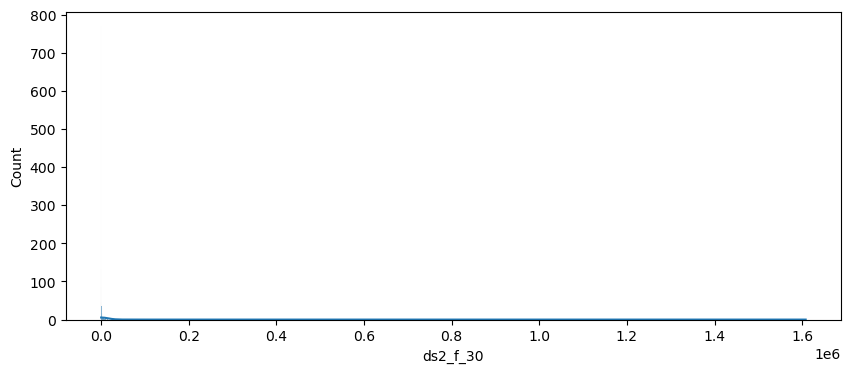

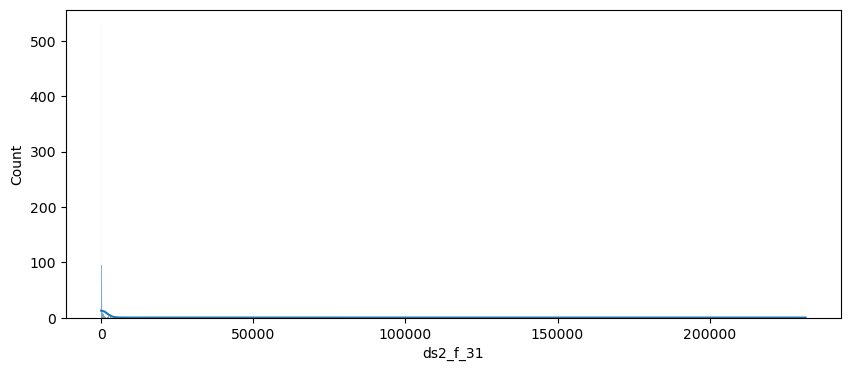

In [40]:
## histogram
for i in df2.select_dtypes(include='number').columns:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df2,x=i, kde=True)
    # plt.title(i)
    plt.show()


From below histograms, we have standard, skewed (positive and negative) variations here. But apply mean , median , mode imputation on every column might turn into a biased dataset 👇

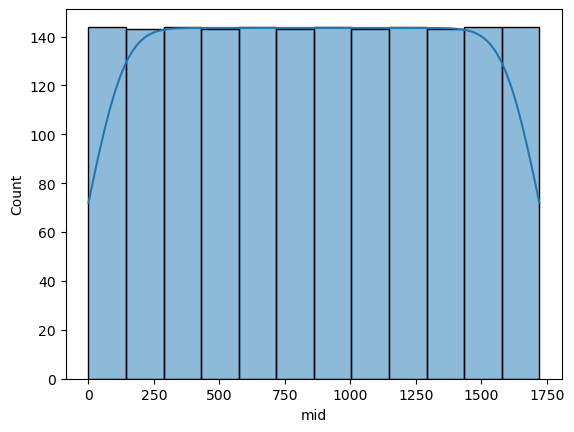

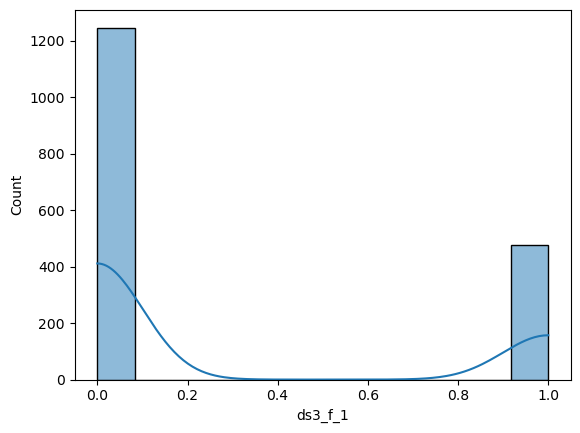

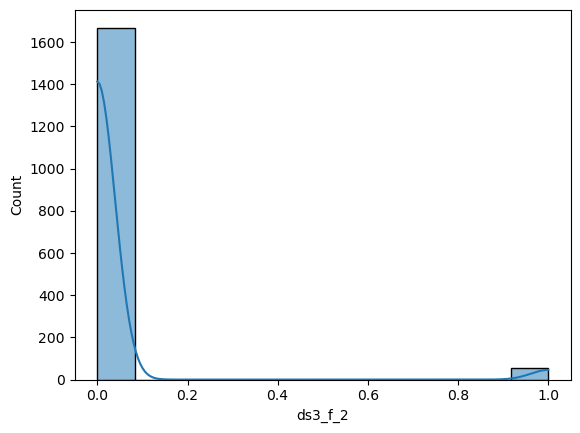

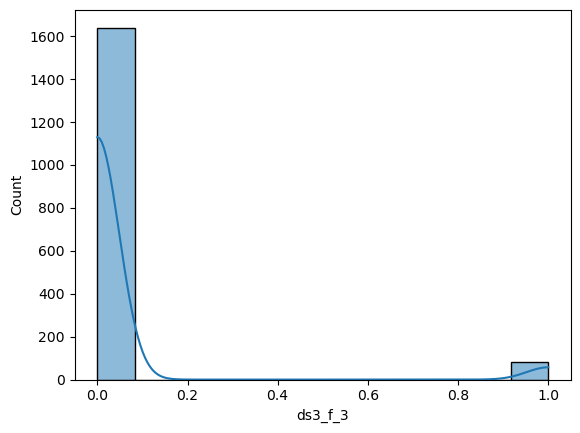

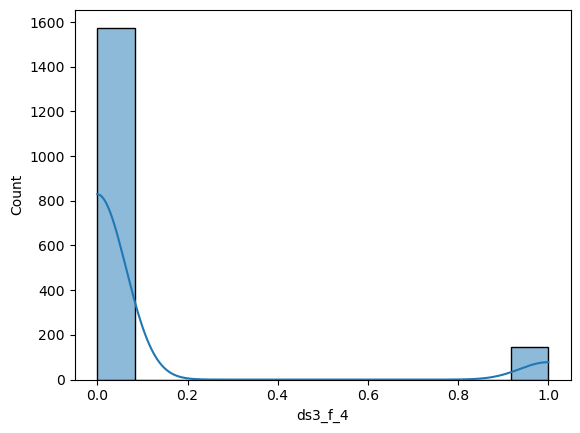

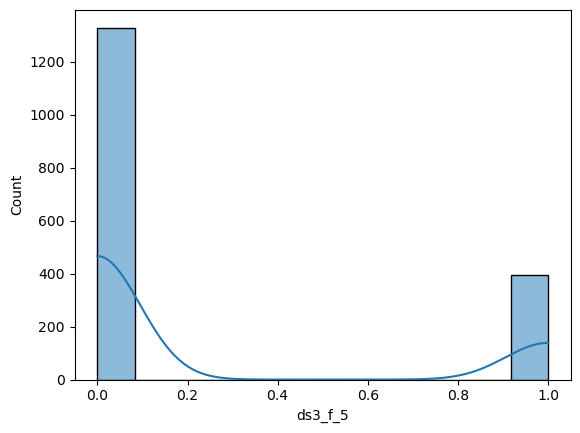

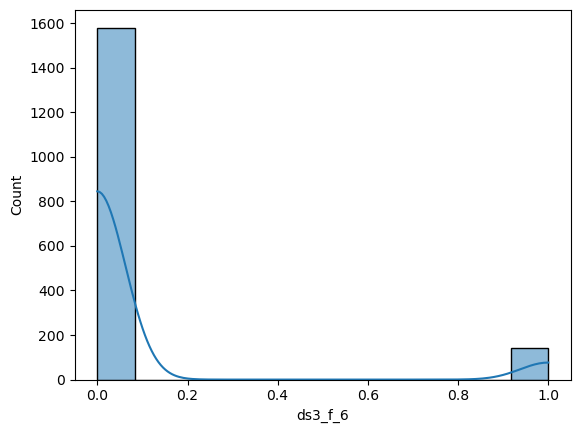

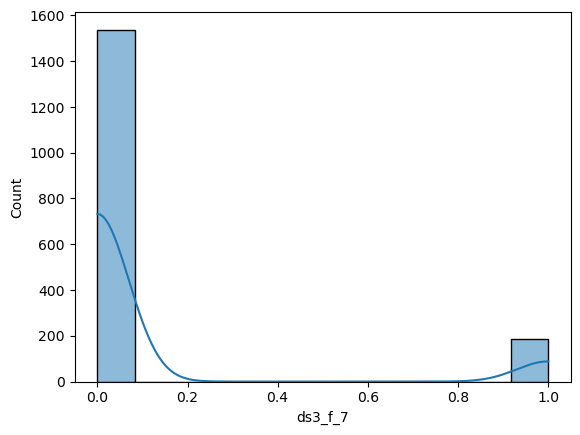

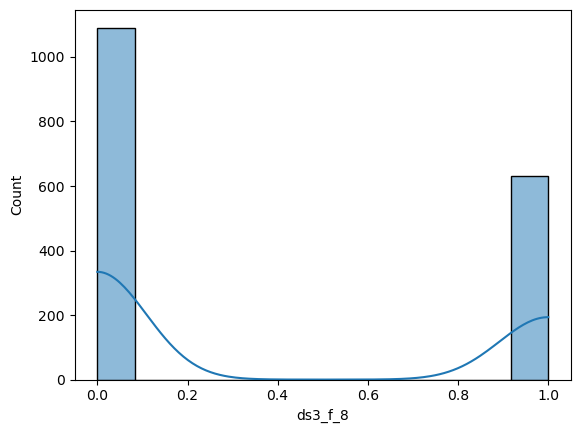

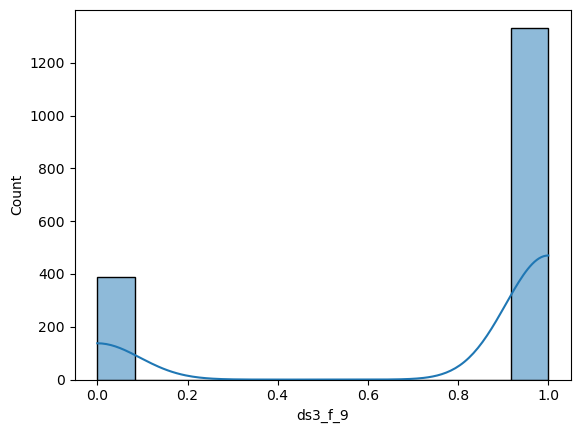

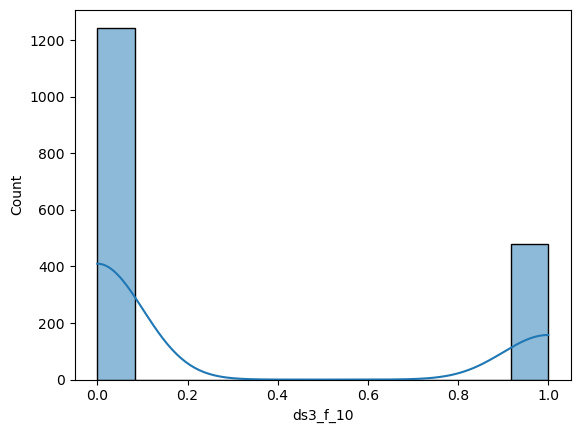

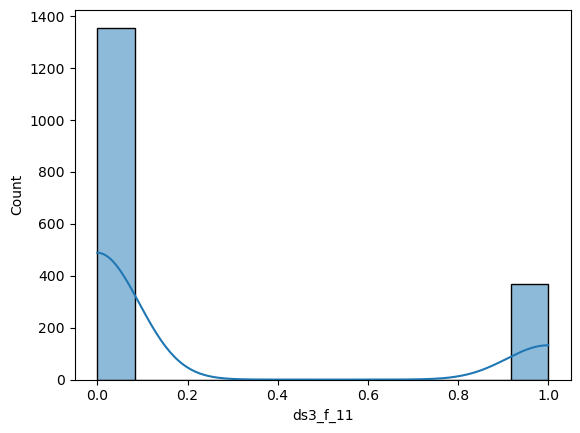

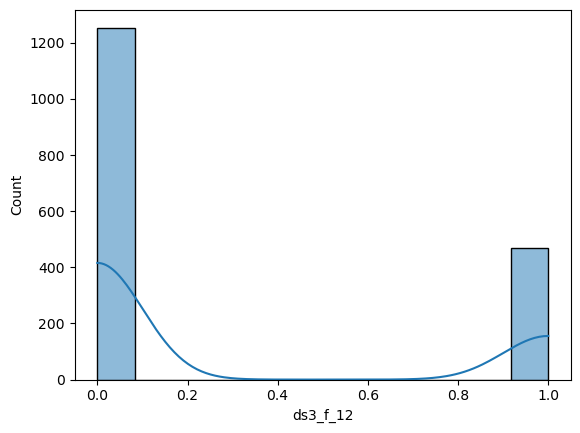

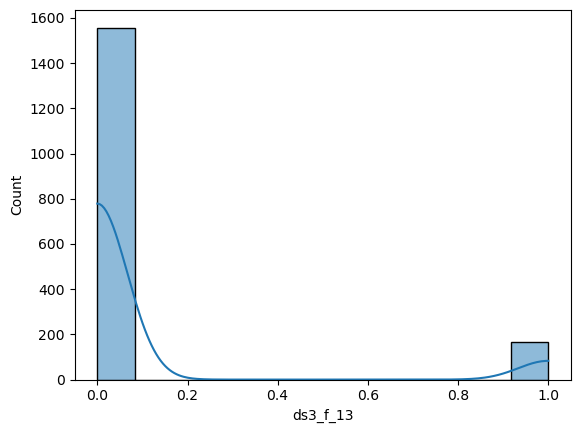

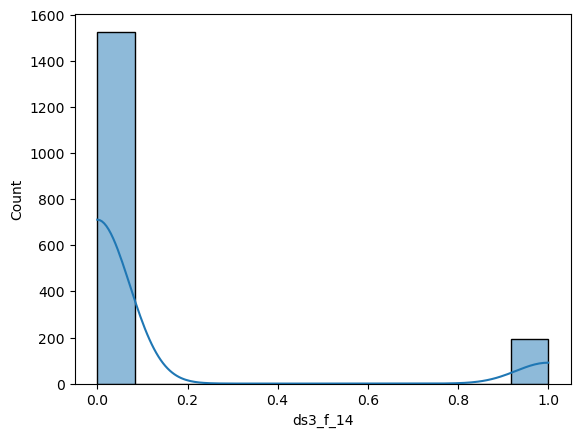

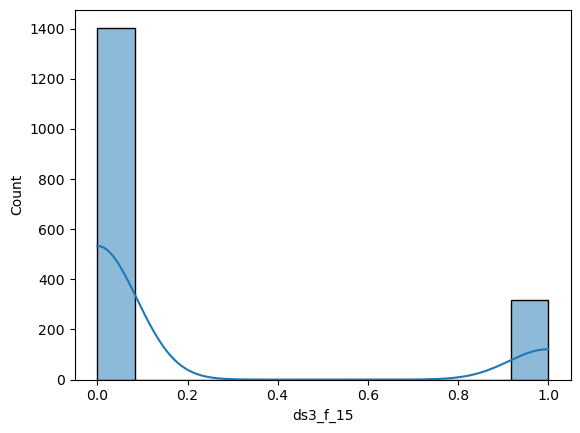

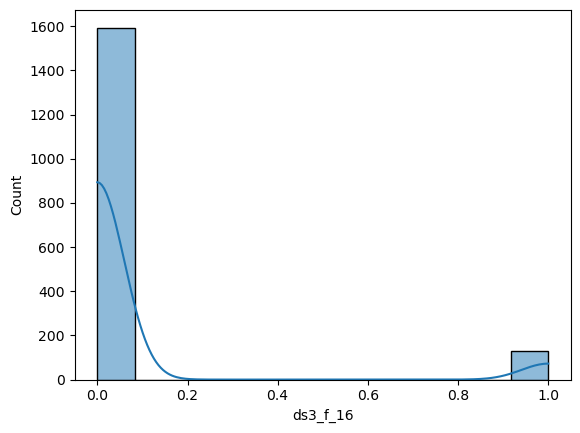

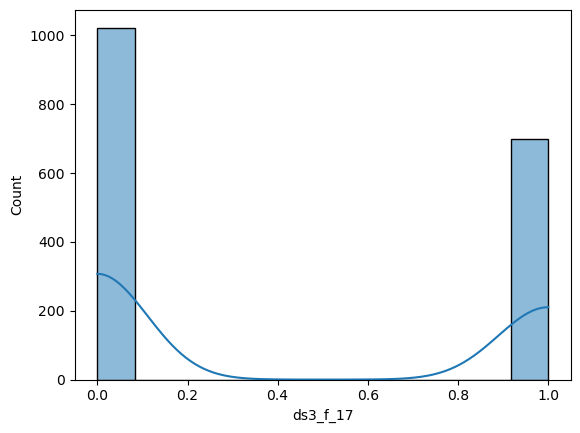

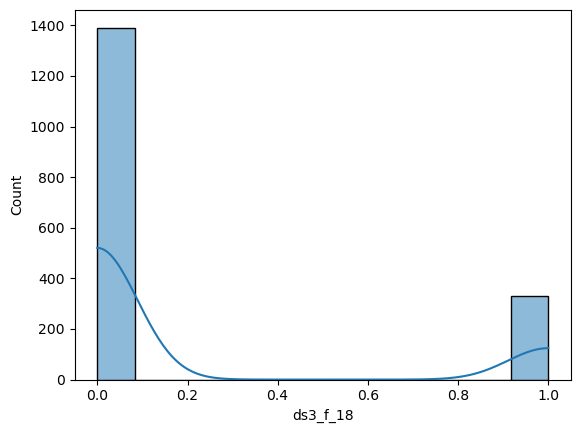

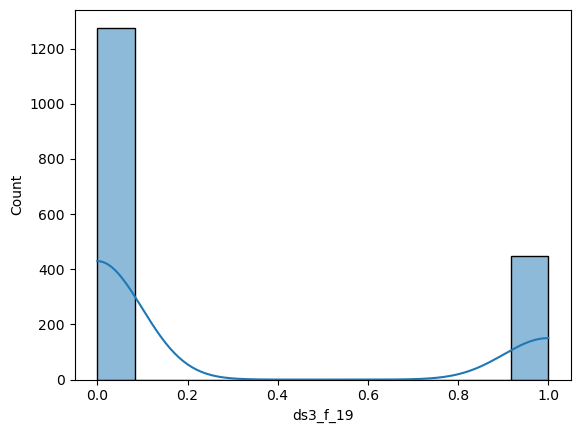

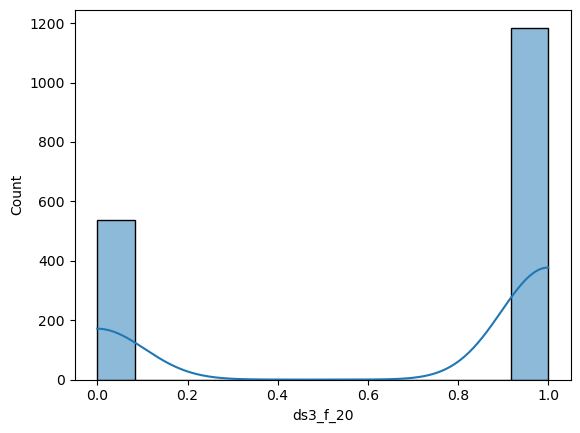

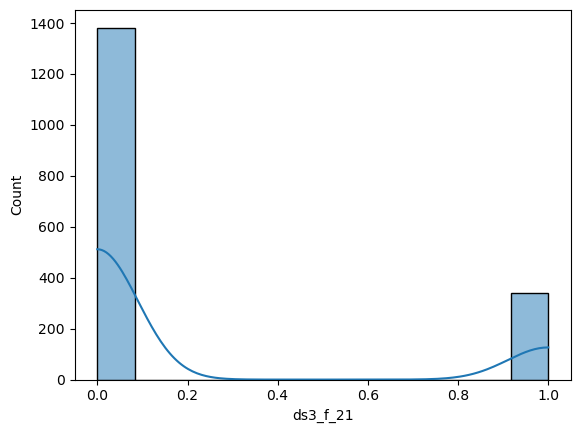

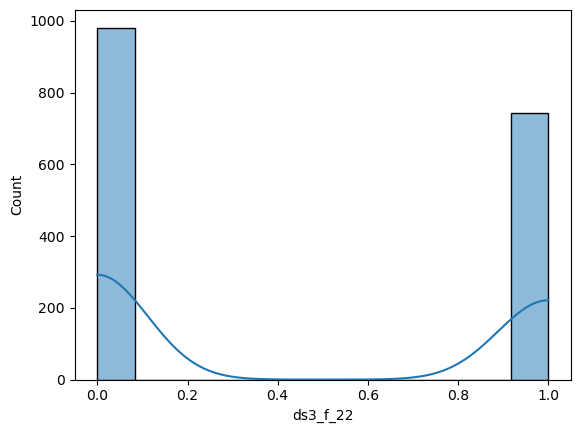

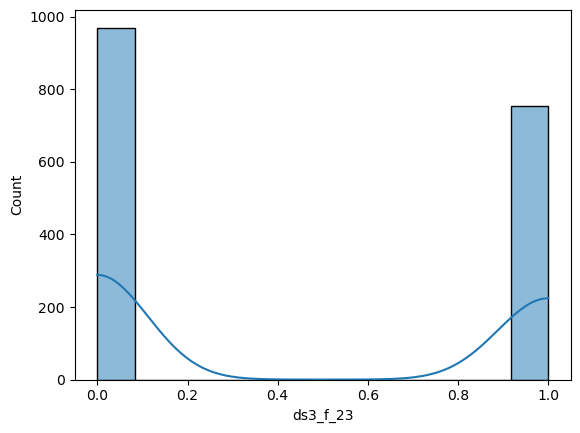

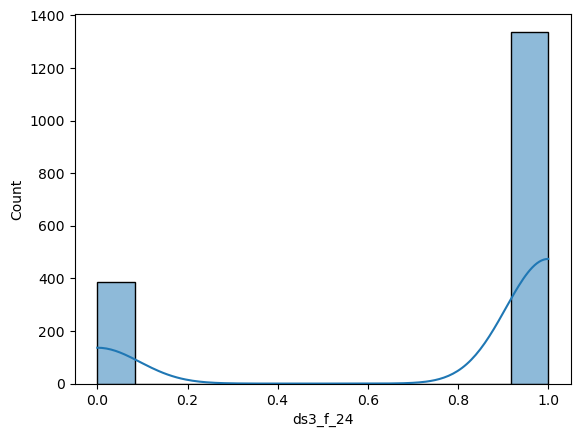

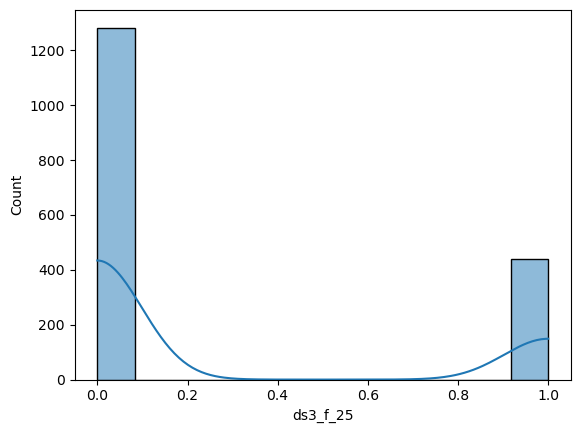

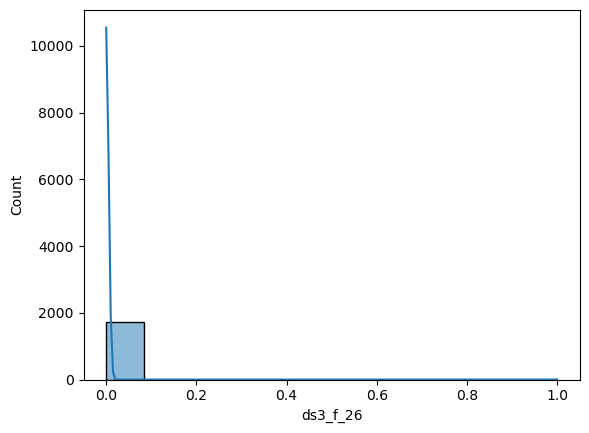

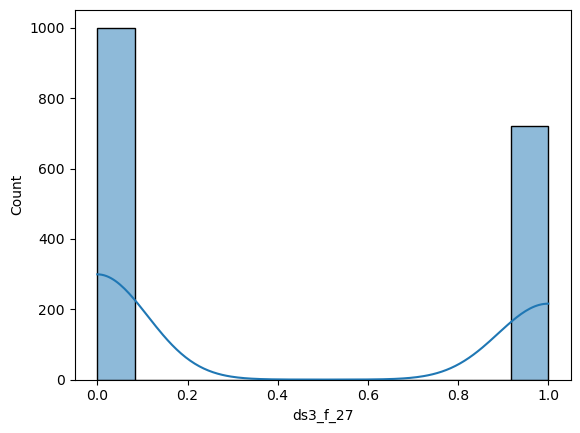

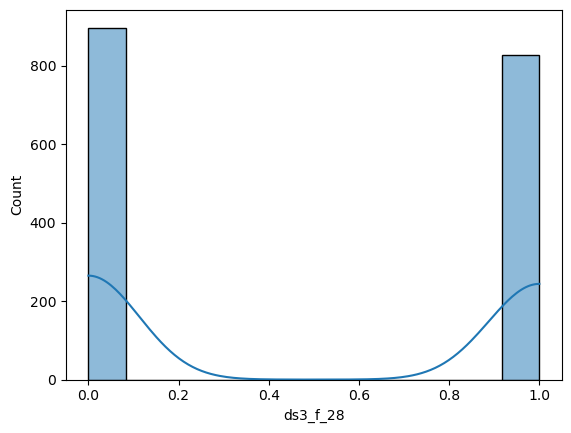

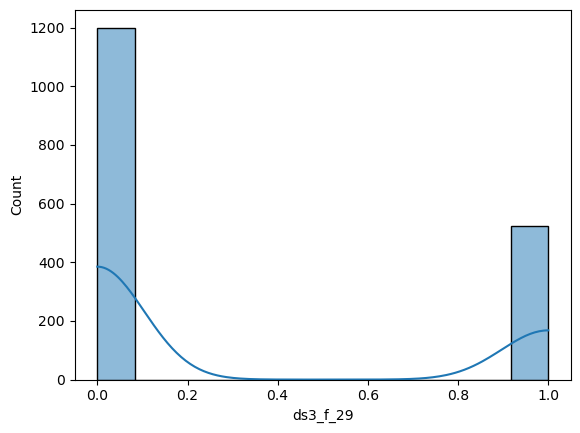

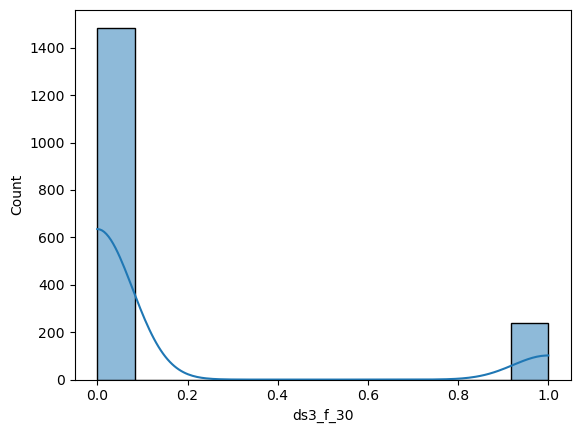

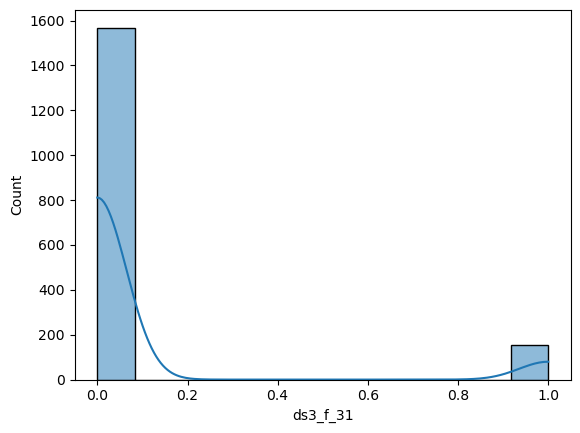

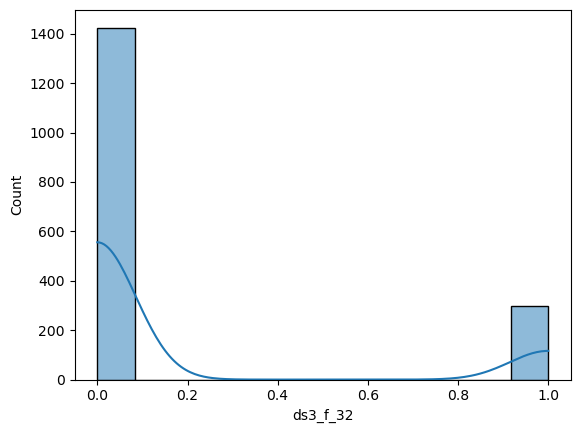

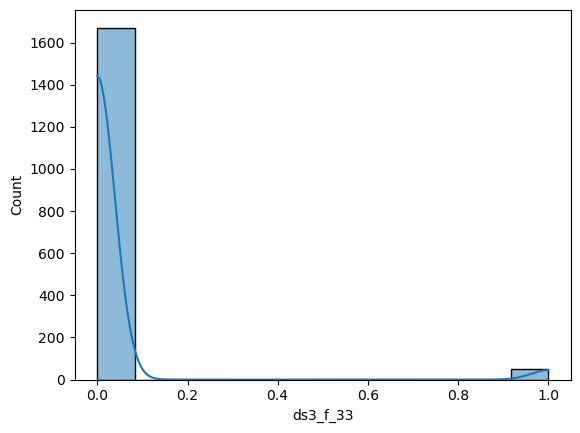

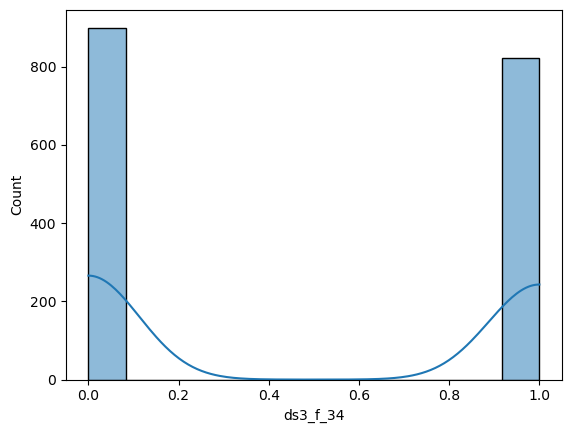

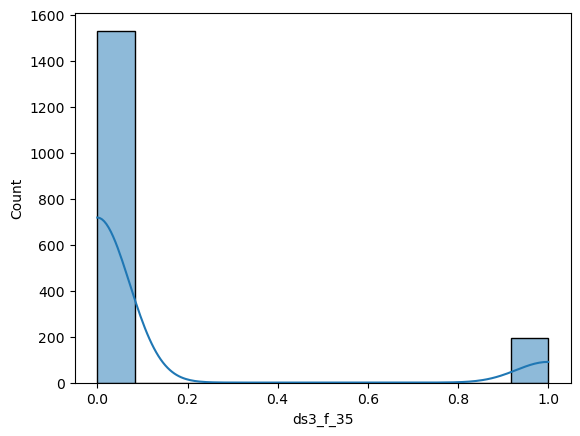

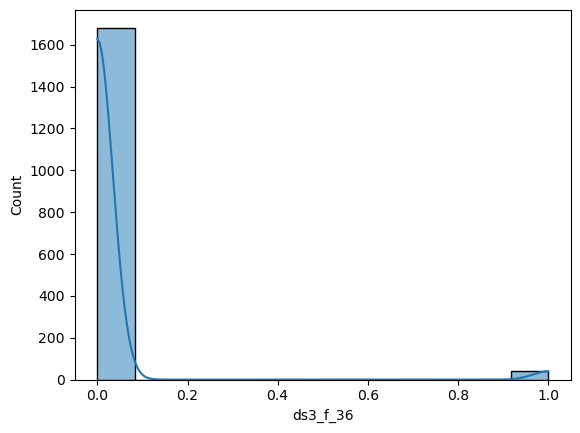

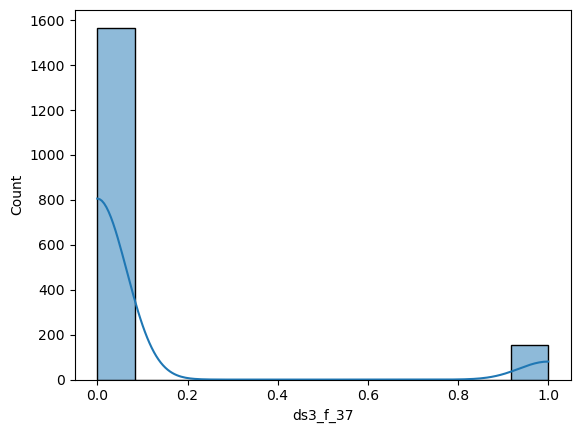

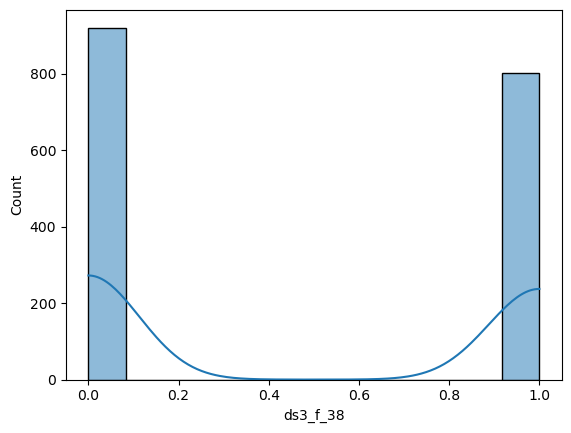

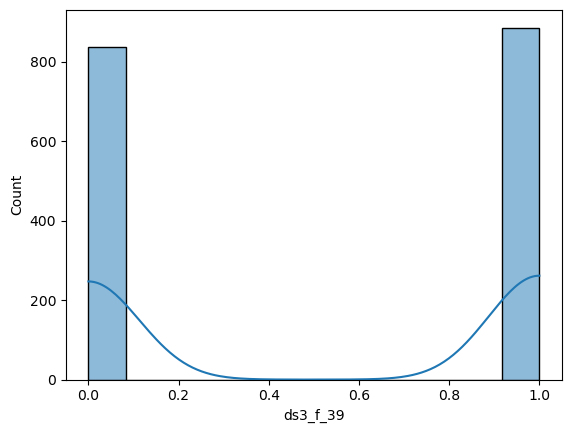

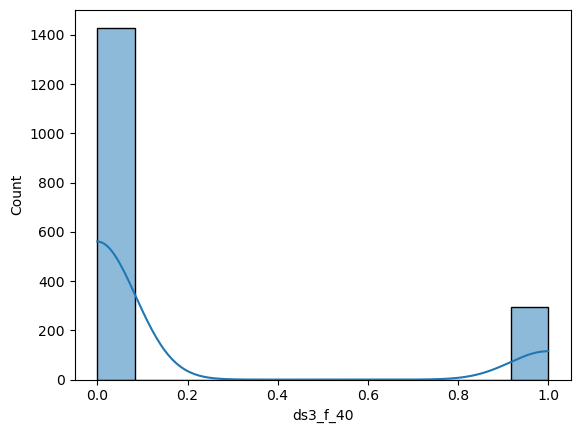

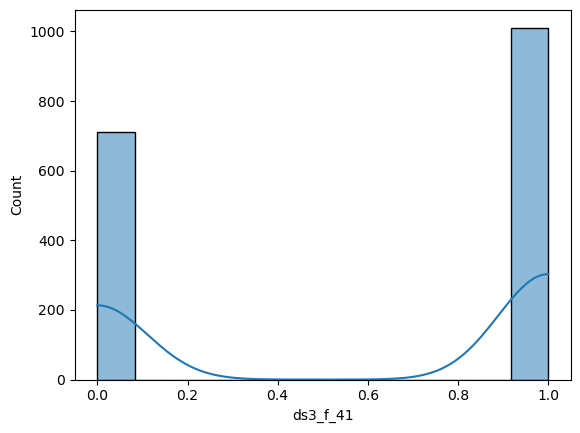

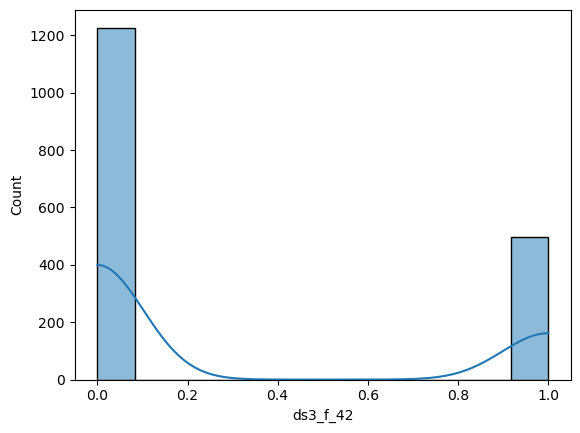

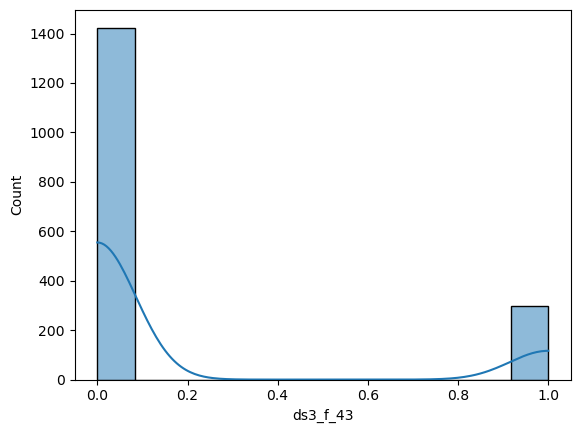

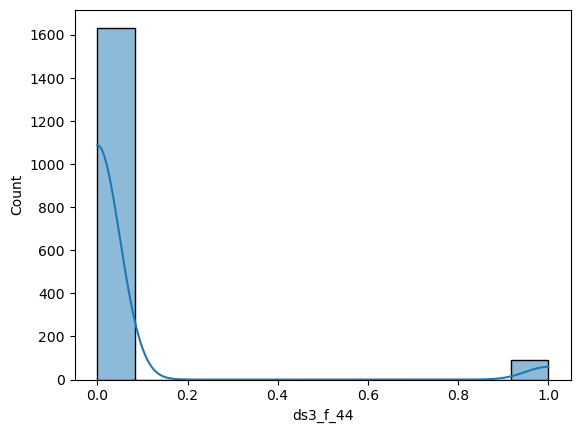

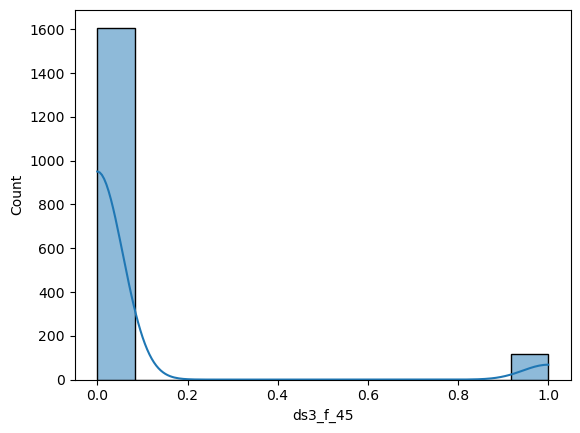

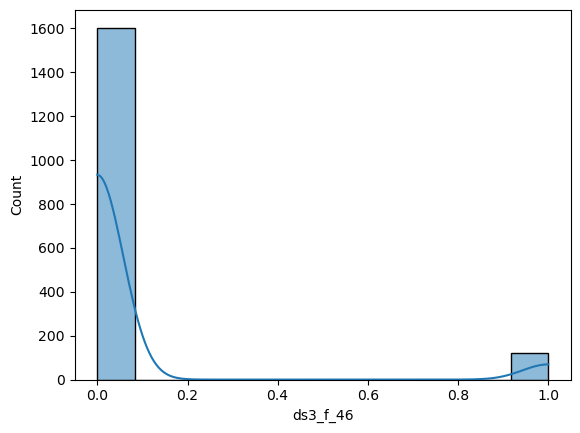

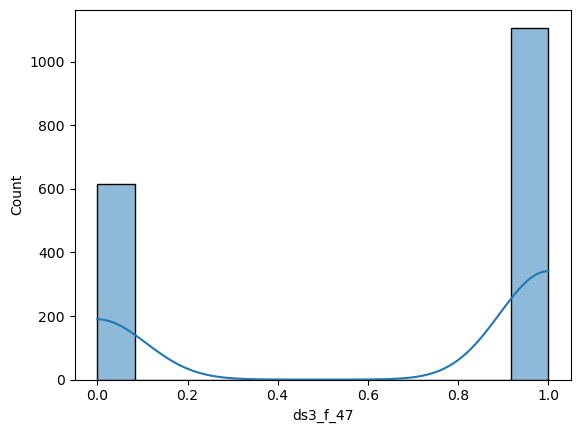

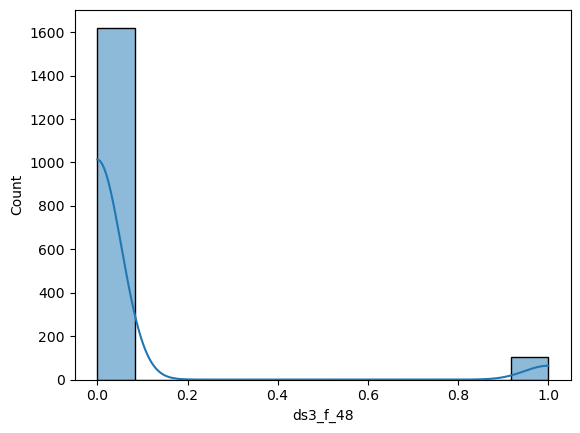

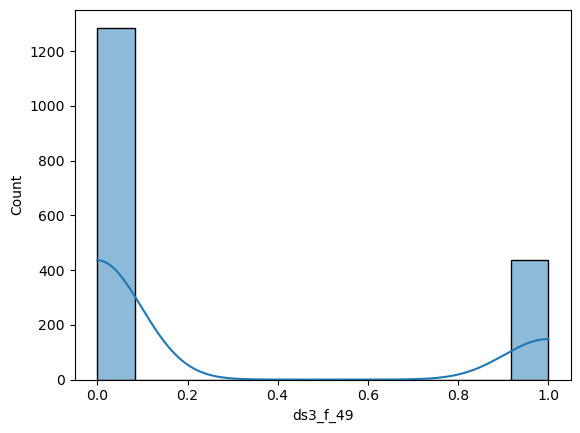

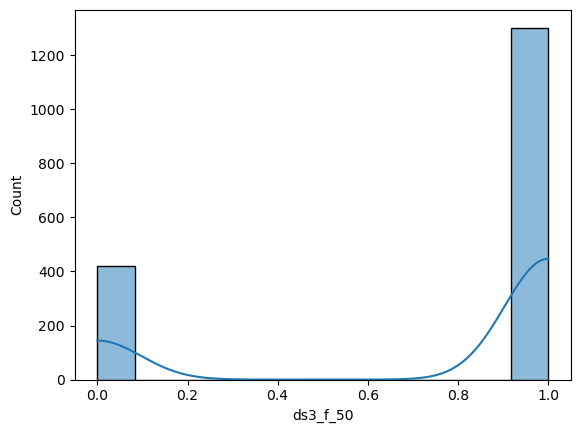

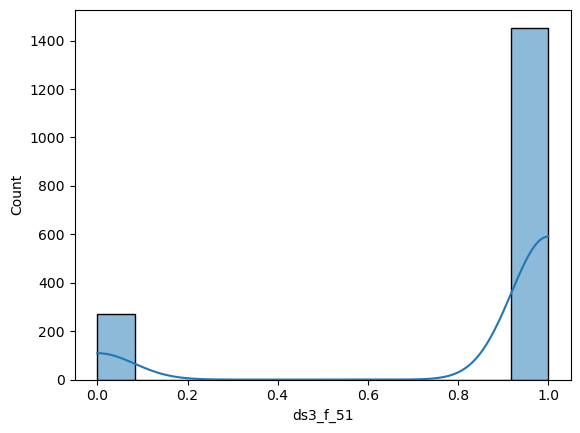

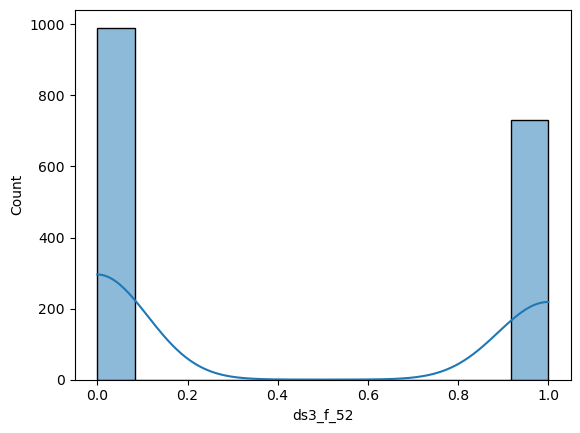

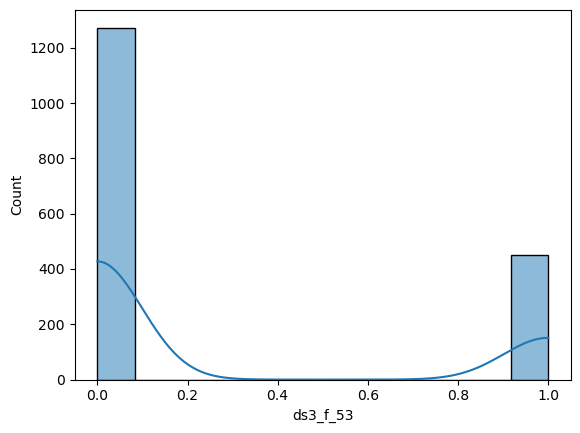

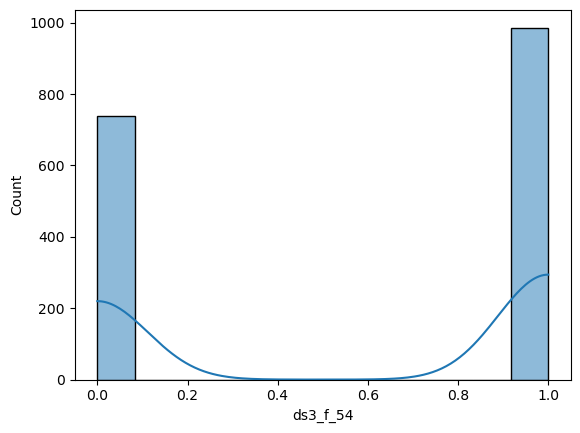

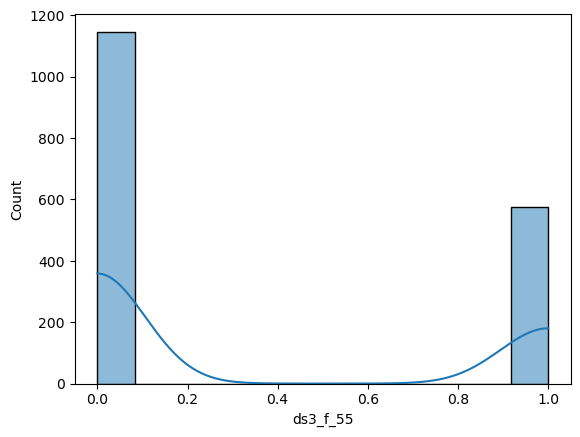

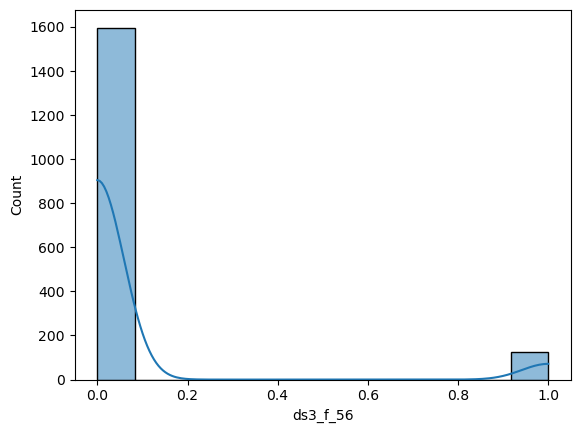

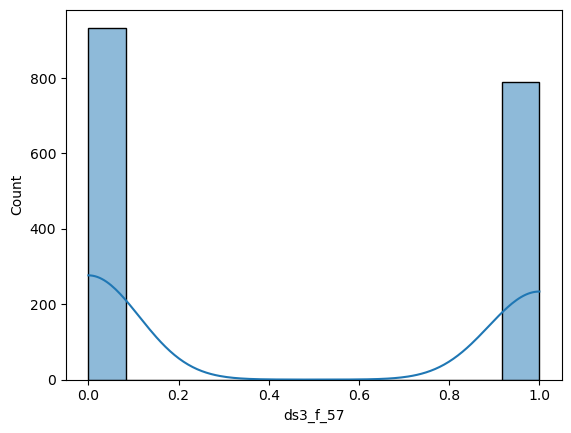

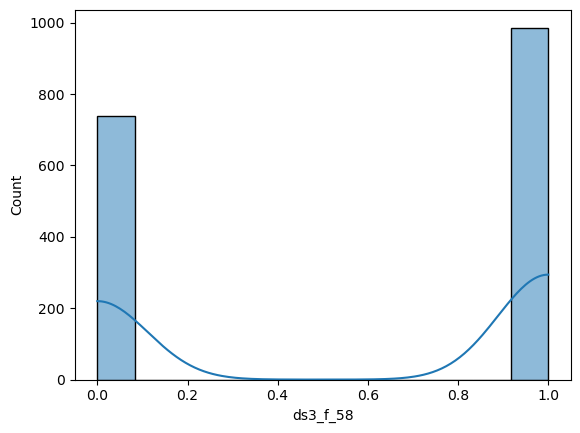

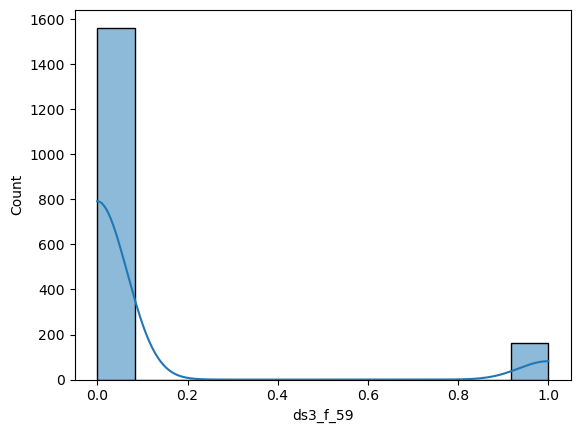

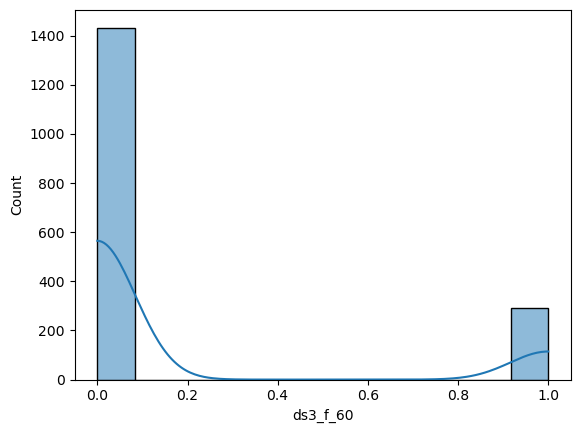

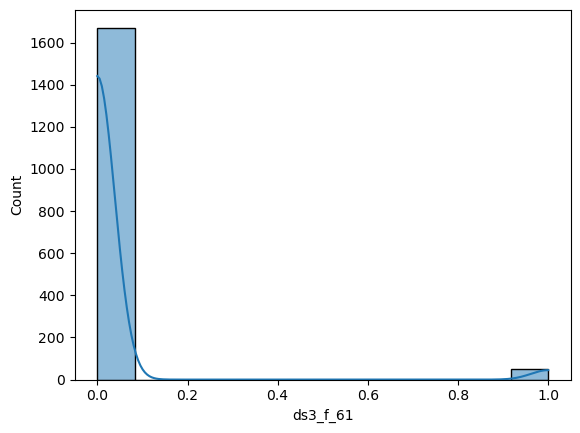

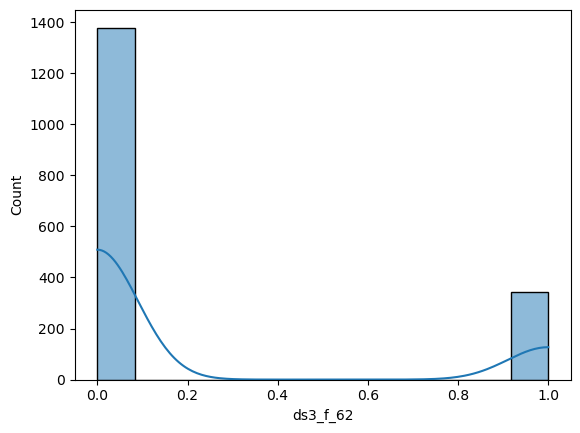

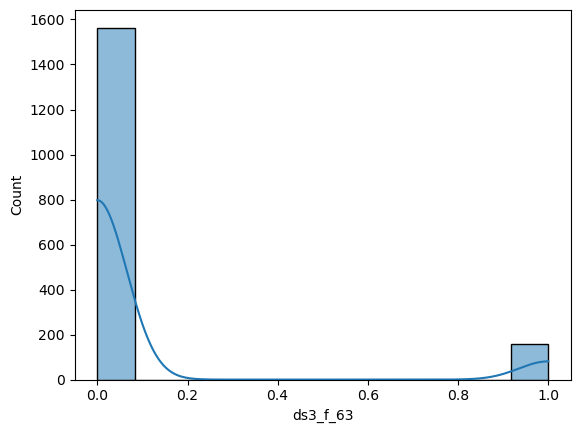

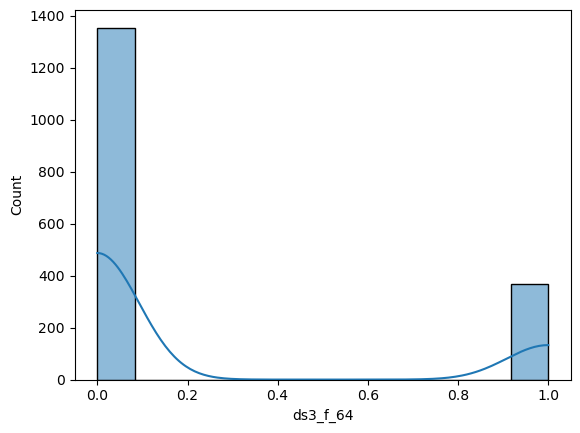

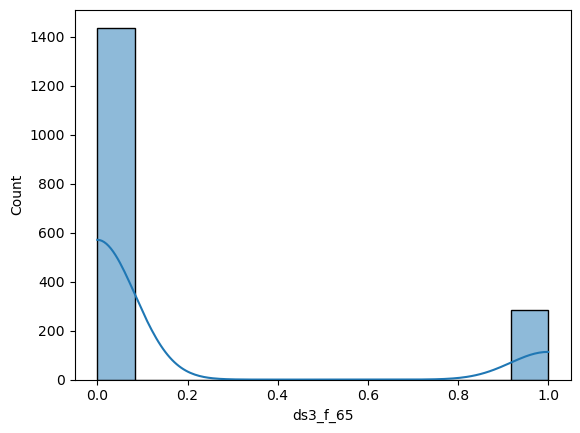

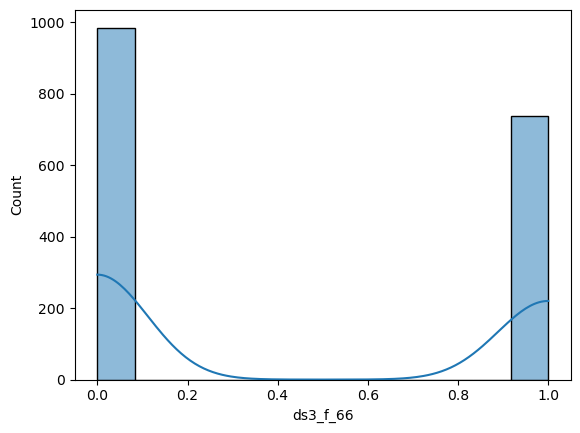

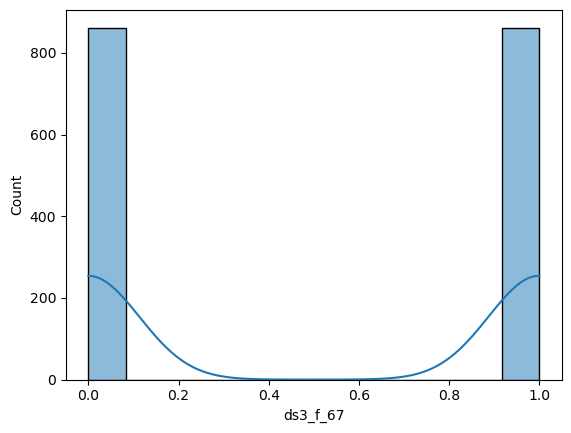

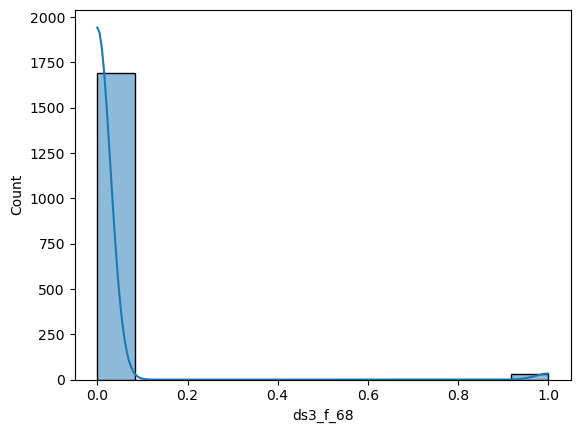

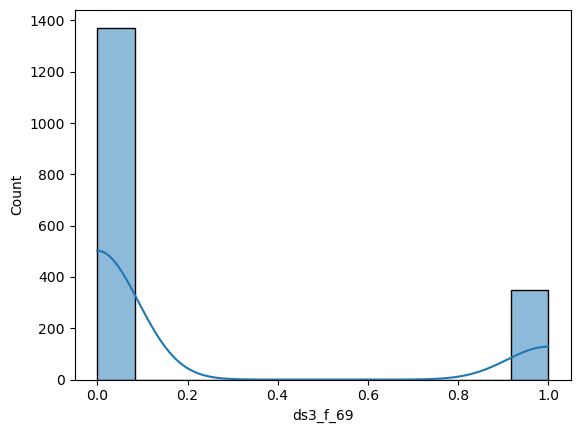

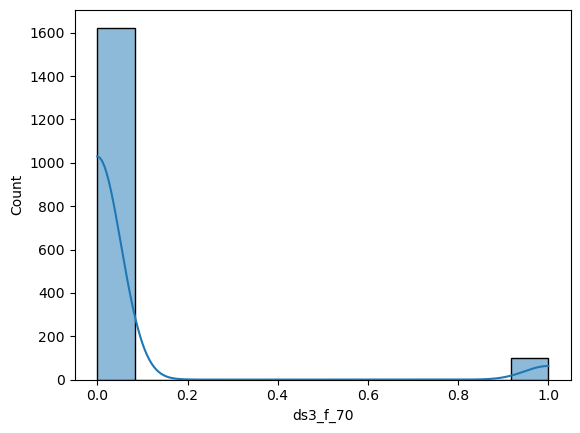

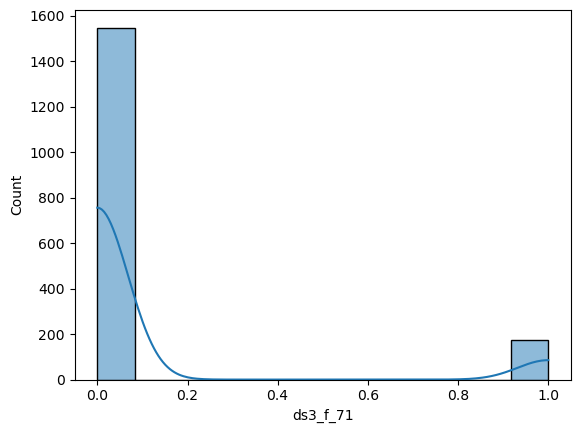

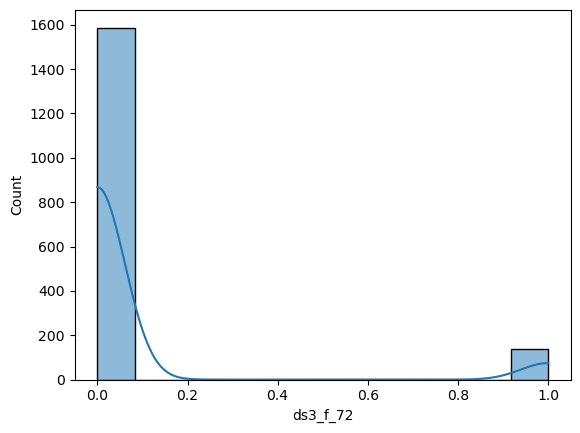

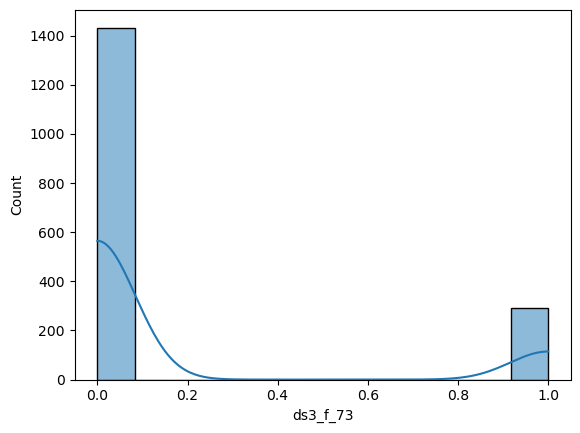

In [41]:
## histogram
for i in df3.select_dtypes(include='number').columns:
    # plt.figure(figsize=(10,4))
    sns.histplot(data=df3,x=i, kde=True)
    # plt.title(i)
    plt.show()


Now, I have performed boxplot analysis in order to check outliers 👇

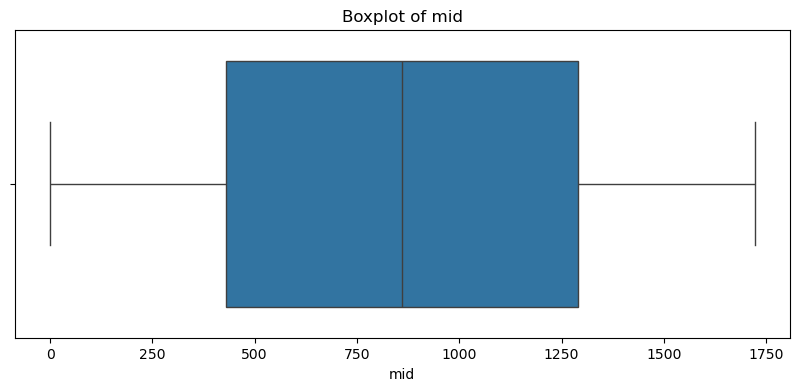


Outliers in mid:
Number of outliers: 0
--------------------------------------------------


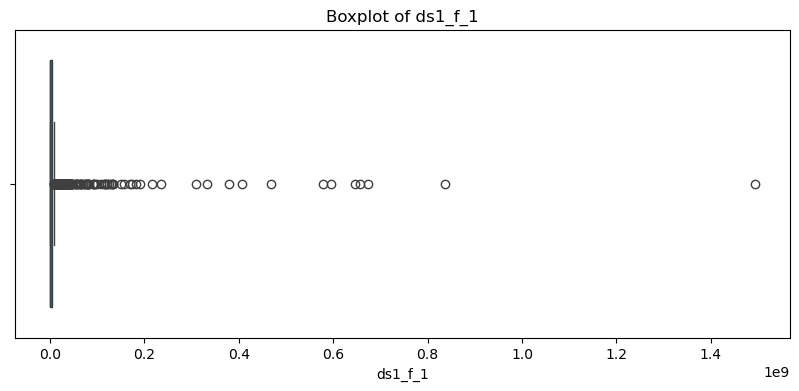


Outliers in ds1_f_1:
Number of outliers: 247
Outlier values:
[9.98040241e+06 1.28169776e+07 1.07994149e+07 1.52101072e+07
 3.27600566e+07 3.38216306e+07 2.25893993e+07 3.98572929e+07
 1.51999694e+07 7.00173067e+07 9.53655922e+06 9.19568202e+06
 1.21187999e+08 1.37899657e+07 1.44219275e+07 9.44429899e+07
 2.04779510e+07 3.91606402e+07 1.34231411e+07 1.02083589e+07
 3.22666081e+07 4.64579369e+07 4.36209071e+07 2.72375524e+07
 4.47766598e+07 1.82622495e+07 1.49828746e+07 2.85995953e+07
 1.49282497e+09 1.32826130e+08 3.10753601e+07 1.77367377e+07
 1.15751680e+08 2.71953951e+07 1.21034827e+07 6.45407983e+08
 2.00123251e+07 1.36728273e+07 9.91234274e+07 2.04689423e+07
 3.56641679e+07 1.38278092e+07 2.35150576e+07 1.30899695e+07
 2.82345871e+07 2.63398243e+07 1.08359086e+07 1.94384526e+07
 1.71252760e+07 2.24155973e+07 9.00207411e+07 7.88750881e+07
 2.92085223e+07 1.01491753e+07 9.44573313e+06 1.33159800e+08
 3.03204392e+07 2.38879424e+07 9.25587277e+07 1.24771649e+07
 1.14107645e+07 2.09242

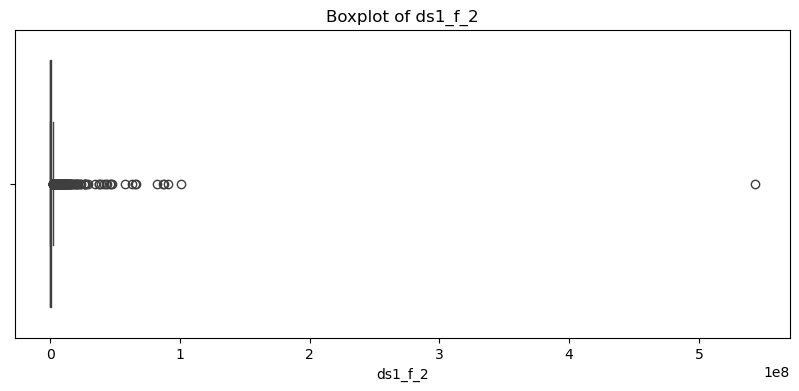


Outliers in ds1_f_2:
Number of outliers: 238
Outlier values:
[2.55403838e+06 4.00059828e+06 3.31926485e+06 6.02024372e+06
 3.91946075e+06 2.55268443e+06 2.95210295e+06 2.33984649e+06
 3.25114855e+06 3.02040162e+06 1.66535084e+07 2.50290979e+06
 3.79895328e+07 4.23738125e+06 5.09866216e+06 5.56569030e+06
 1.36891389e+07 5.19299212e+06 3.58071679e+06 2.51815721e+06
 9.91858625e+06 1.17242205e+07 1.37082583e+07 8.90877213e+06
 3.51190114e+06 5.31464434e+06 9.79786412e+06 5.42922868e+08
 9.63544980e+06 1.31188713e+07 4.06416832e+06 3.81450726e+06
 3.89687017e+06 4.28877472e+07 3.08169462e+06 2.77724186e+07
 2.84272219e+06 3.83835343e+06 1.58673198e+07 7.24400095e+06
 5.08390772e+06 5.35571778e+06 1.31158773e+07 3.14370025e+06
 1.10819991e+07 3.80456734e+06 5.28093610e+06 6.66489829e+06
 2.38301210e+07 1.20382415e+07 8.86571261e+06 4.43263566e+06
 2.06109125e+07 4.58329101e+06 8.39621907e+06 2.02139798e+07
 5.10869674e+06 7.82256775e+06 4.69889331e+06 1.56197117e+07
 3.15387625e+06 1.93194

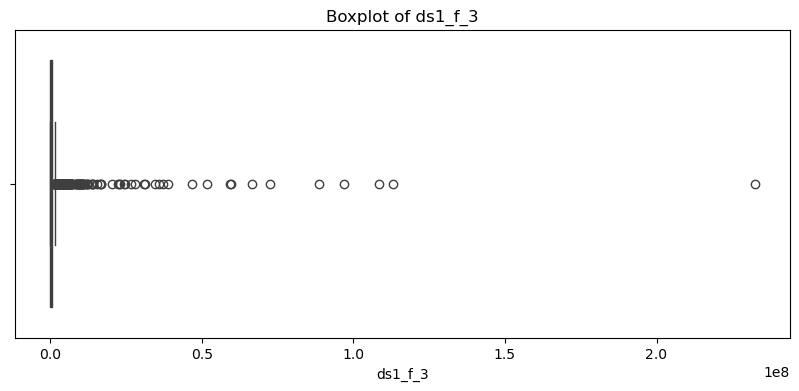


Outliers in ds1_f_3:
Number of outliers: 253
Outlier values:
[3.52099545e+06 1.94783979e+06 3.77553778e+06 1.91165096e+06
 9.20051876e+06 1.96944822e+06 1.06930427e+07 1.57665763e+06
 1.77231794e+06 8.18020117e+06 1.95753711e+06 3.45247484e+07
 1.83586586e+06 3.50255996e+06 2.23834262e+07 9.81194687e+06
 3.67882630e+06 5.91314970e+06 5.54972679e+06 7.32456545e+06
 4.30239875e+06 1.55876605e+07 3.82345558e+06 1.96059442e+06
 1.79901002e+06 2.32759094e+06 1.20767011e+07 4.53069832e+06
 2.66019540e+07 4.11039842e+06 1.80539942e+06 1.13146613e+08
 1.71640635e+06 1.62988665e+06 2.14767339e+06 1.77894286e+06
 1.08939182e+07 3.48375581e+06 6.74272824e+06 2.42679300e+06
 5.61825120e+06 2.15658436e+06 2.36043673e+06 3.28959331e+06
 5.54274111e+06 2.56884113e+06 2.65817928e+06 3.62904244e+06
 1.91930495e+06 2.42139001e+07 3.74326082e+06 3.48663961e+06
 3.49603278e+06 6.59441340e+06 5.22054818e+06 3.57639545e+06
 1.09610415e+07 2.11328770e+06 1.52933576e+06 5.76826287e+06
 2.82227366e+06 1.03126

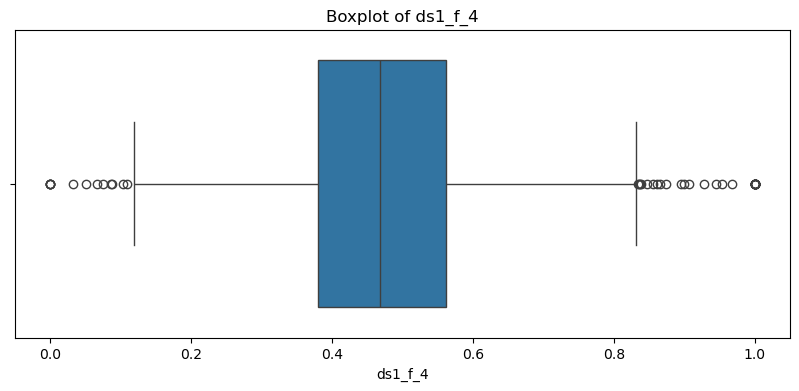


Outliers in ds1_f_4:
Number of outliers: 52
Outlier values:
[0.92751216 0.87447493 1.         0.         1.         0.07527173
 1.         0.94525646 0.         1.         0.90656744 0.83452497
 0.8478022  1.         0.         0.08602157 1.         0.9999776
 0.83843996 0.10376399 1.         0.83698472 0.03254683 1.
 0.         1.         1.         0.86089861 0.96809287 1.
 1.         1.         1.         1.         0.89927253 1.
 0.89538444 0.83519931 0.86522254 1.         1.         0.
 1.         1.         0.85547078 1.         0.08832084 0.95318668
 1.         0.06664887 0.05165519 0.10891313]
--------------------------------------------------


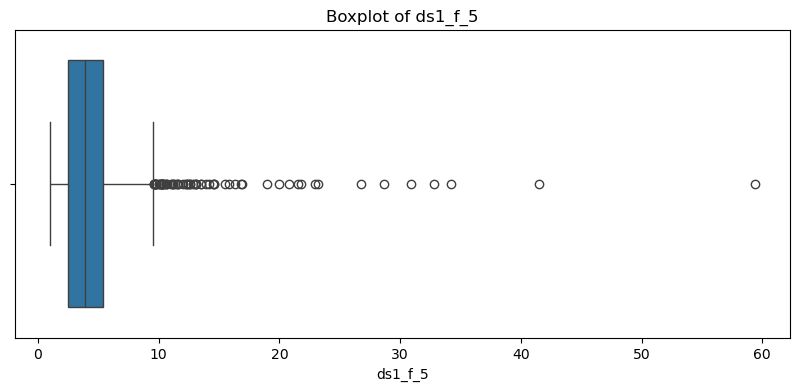


Outliers in ds1_f_5:
Number of outliers: 69
Outlier values:
[12.39976411 41.49980196 13.11791912  9.7407999  23.17032626 11.21673139
 16.89172489 13.05815653 10.18581418 10.37743486  9.60079526 21.81350461
 11.38841276 10.26934139  9.7015999  14.54786209  9.74542501 10.20540443
 26.72493655 11.6266518  11.53590834 11.11583766 12.96766367  9.71457316
 13.51981799 14.45559333  9.70990843 15.78052172 28.62833865  9.60808886
 10.43528064 11.98875612 14.60952068 30.90884005 20.80216618  9.99781414
 16.8137624  22.9556296  11.17484694 12.23983084  9.58727532 12.6042344
 13.49339443 10.70160255 11.56327189 10.26607261 19.9383355  21.50882293
 12.61440696 14.20281509 59.36115019  9.73535971 12.86443619 10.62593206
 18.95212278 16.28623255 15.47277433 12.2433543  34.23131964 10.26406423
 10.31752516 12.44649186 10.02974391 32.77424251 10.98946327 10.30918933
 10.63325478 10.09135811 13.94078336]
--------------------------------------------------


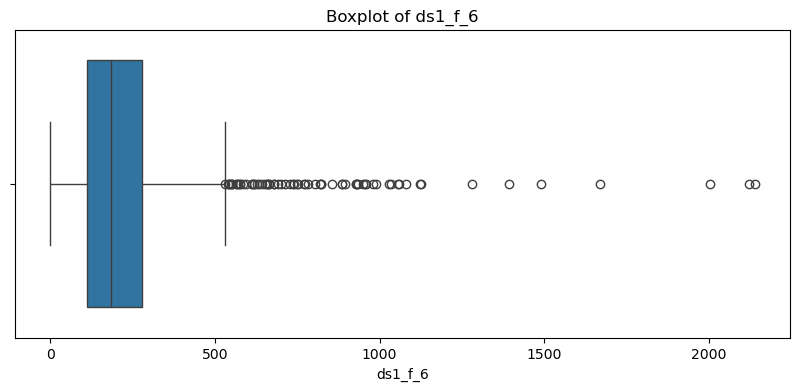


Outliers in ds1_f_6:
Number of outliers: 70
Outlier values:
[2138.40409903 1123.52316415  855.06094127  659.31030953  548.01369395
  979.37652685  728.57917897  954.86118705 1392.72094712  736.53614038
 1282.          613.75242551  700.77849322 1058.5661086   586.86892911
  567.49895245  949.28503498  774.92273363  627.85490278  929.73146835
  563.10912021  753.76768545  577.24441951  957.92520992  771.85258806
 1670.08279107  678.48104742  691.14477845  553.23967321  935.46267935
  613.50819478 1034.78544238 1126.03204569 1029.33926536  821.84592063
  885.1653436   932.99865897  552.49103368  740.23599884  542.83937978
  886.49268427  712.84286907  532.20950537  665.69905474  663.04937636
  642.0103882   618.69231006  595.98249437  896.21453349 1057.4118765
  541.40703946  823.34442132 1488.70237304 2002.16655638  618.64673319
  652.5621047   820.09467656  571.00064096  990.46022365  680.73439577
  782.19368819  634.94572439  748.92493058  804.85306822  659.82067027
 1080.43302485  5

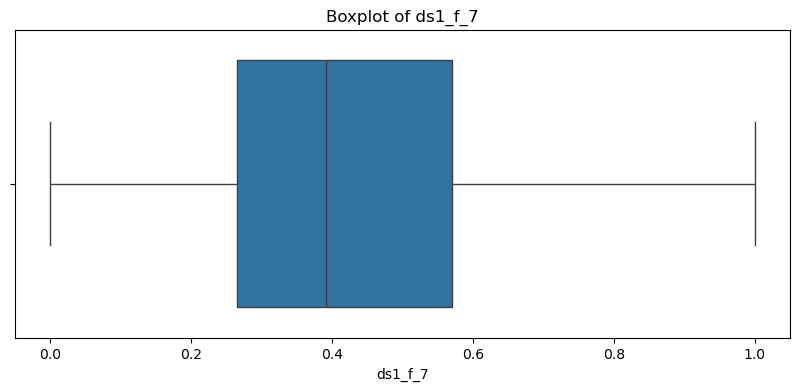


Outliers in ds1_f_7:
Number of outliers: 0
--------------------------------------------------


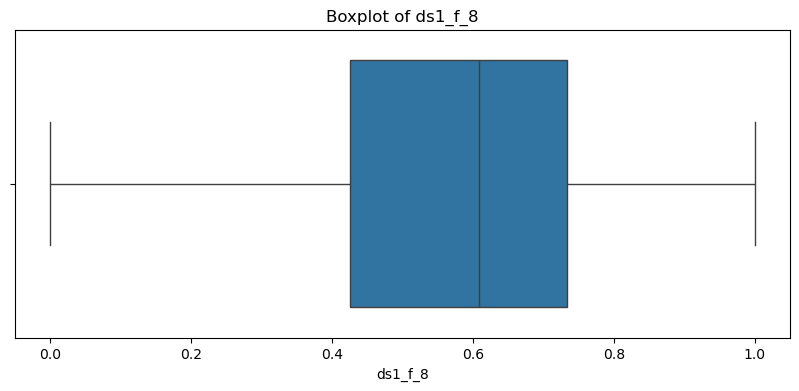


Outliers in ds1_f_8:
Number of outliers: 0
--------------------------------------------------


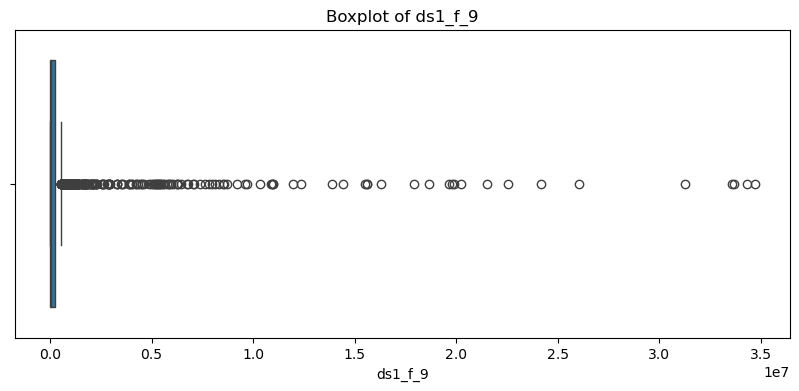


Outliers in ds1_f_9:
Number of outliers: 259
Outlier values:
[  616422. 22565532.   635547.  1338530.  1036021.  5083811.   663639.
  2854425.  1010828.  1546384.  1747382.  3554649.   586175.   704379.
  2915506.  1042955.   631862.  6229955.   720101.   799145.  1369667.
 15526123.  1204651.  1759470.   798271.  1364355.  1644660.  4054030.
 24192438.  1287452.  1559104.   587898.   572142.  9186597.  5477009.
   565250.   626299.  2091386.  2637991. 20237262. 33593886.  5191572.
   658076.  1195946.  2603119.   887174.  3294300. 34301634. 15626186.
  8120220.  1391662.  8531394.  1341877.  1219952.  6071833.  2110769.
  2046925. 10963044.  5599195.   836388. 10959255.   652419.   769308.
   557486.   776348.  2094262.  1633898.   695985.   631144.   559263.
  1016950.   926618. 19900178. 17907714.   599640.  1646857.   721254.
 11978089.   556357.  1370253.  2535370.  4244481.  9712521.   872881.
  3876348. 10313996.  2009962.   733018.   618077.  7628019.  2261381.
  1231458.  127

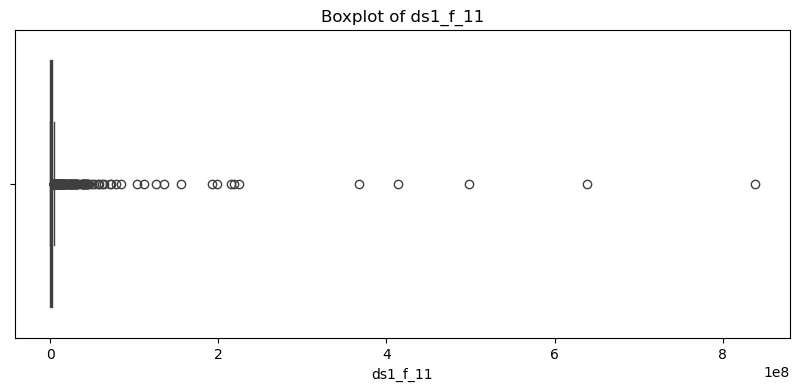


Outliers in ds1_f_11:
Number of outliers: 234
Outlier values:
[9.28289763e+06 3.82832395e+07 1.09212249e+07 1.12988235e+07
 7.53467241e+06 4.19846599e+07 1.35554345e+07 5.07373232e+06
 2.34026352e+07 5.72624732e+06 4.04739830e+07 8.58801998e+06
 7.08222972e+07 6.80532018e+06 3.31186527e+07 7.10674222e+06
 1.30542807e+07 1.08910280e+07 1.55407513e+07 1.45608543e+07
 9.08595765e+06 1.49371536e+07 2.99006141e+07 6.19255227e+06
 4.61168152e+07 1.07391859e+07 4.97620273e+08 4.42823610e+07
 1.03598056e+07 5.92580257e+06 3.86771241e+07 9.13041267e+06
 1.04822784e+07 8.53315952e+06 2.15138826e+08 6.69732380e+06
 3.30947669e+07 8.43916519e+06 6.85360676e+06 1.19016793e+07
 5.92947082e+06 7.84043631e+06 4.13456289e+08 9.41597146e+06
 8.92072808e+06 6.52306520e+06 5.79895993e+06 9.29268204e+06
 3.00271560e+07 2.63339611e+07 9.73757781e+06 4.44971244e+07
 1.01497562e+07 8.08029461e+06 1.51764459e+07 3.12267157e+07
 5.31546383e+06 6.98238648e+06 7.96319250e+06 1.31626144e+07
 6.22059540e+06 7.2067

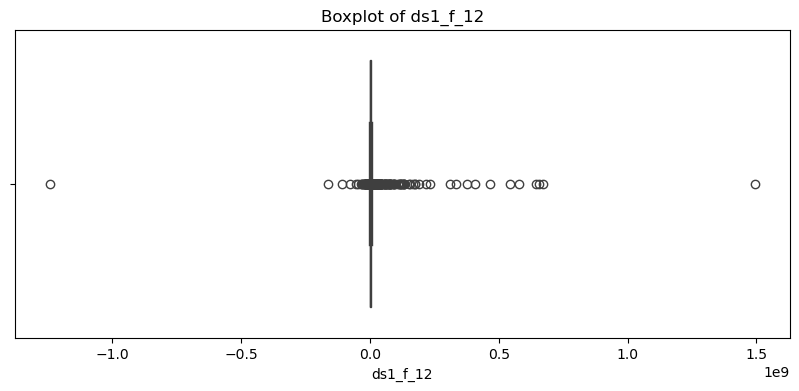


Outliers in ds1_f_12:
Number of outliers: 306
Outlier values:
[-1.00201151e+07  9.96490008e+06  1.28051978e+07  1.07984950e+07
  1.39983027e+07  3.27583415e+07 -7.78907783e+06  3.38203578e+07
  2.25374215e+07  3.98532994e+07 -5.02304665e+06  1.51943522e+07
 -2.00683712e+07  6.99061569e+07  9.53370114e+06  9.15938778e+06
  1.21166738e+08  8.72357540e+06  1.36862659e+07 -9.47263007e+06
  1.40784371e+07  9.34807718e+07  2.04603048e+07  3.31290615e+07
  1.32275836e+07  1.02080974e+07 -1.26330210e+07 -6.49497015e+06
  3.21564524e+07  4.63299208e+07  4.35941127e+07  2.72135456e+07
  4.46017203e+07  1.81277020e+07 -7.76751213e+06 -1.08377973e+08
 -8.60933830e+06  2.84477204e+07  1.49282147e+09  1.32803148e+08
  3.10742682e+07  1.76923847e+07  1.15288305e+08  2.71638164e+07
  1.20387879e+07  8.95998066e+06  6.45406858e+08  2.00022091e+07
  1.15796714e+07  8.69421694e+06  9.89625638e+07  2.04527694e+07
  3.56638062e+07  1.38275746e+07 -7.26446386e+06  2.35104375e+07
  1.20631246e+07 -1.2403483

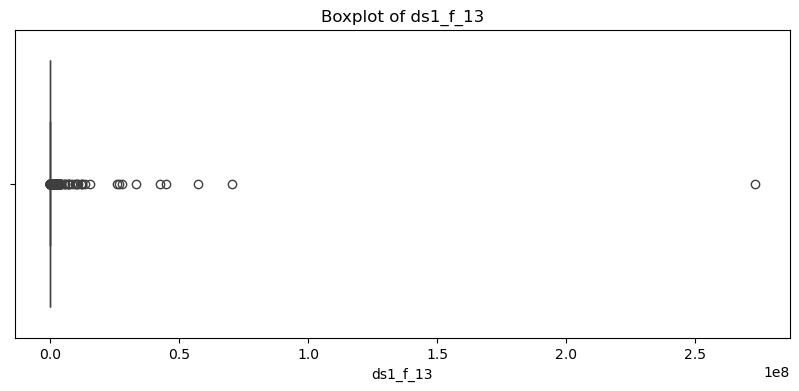


Outliers in ds1_f_13:
Number of outliers: 292
Outlier values:
[1.08705409e+05 2.12282815e+05 1.17387167e+06 1.91003750e+06
 6.06865630e+05 2.65717321e+06 9.97953230e+05 2.55627321e+05
 2.70496439e+05 1.23348897e+05 3.33569817e+05 3.54450238e+05
 2.32661417e+05 2.37443462e+05 3.57104219e+05 5.69914279e+05
 3.06210136e+05 7.06941269e+05 1.60462044e+05 1.19849470e+06
 1.84316184e+06 6.82417430e+05 1.15947523e+05 2.54971891e+05
 3.90349443e+06 1.62698963e+05 1.38957403e+05 1.13357558e+05
 2.63133063e+05 1.29140307e+05 3.22903341e+06 4.26851216e+07
 5.77863841e+05 2.84587612e+06 5.56243143e+05 7.44473114e+05
 1.00341773e+05 1.78193342e+05 1.28631555e+05 6.28612818e+05
 3.47081698e+05 9.65501558e+05 1.17080759e+05 2.46864751e+05
 5.73544481e+07 1.97728673e+05 1.05657472e+05 2.37705538e+06
 1.26463388e+05 9.85773713e+06 5.89371160e+06 2.61682469e+05
 5.08876098e+05 5.72049456e+05 1.12748790e+06 5.89268179e+05
 1.65232902e+05 2.09321355e+06 1.03933120e+05 4.83758197e+05
 3.98754871e+06 1.8067

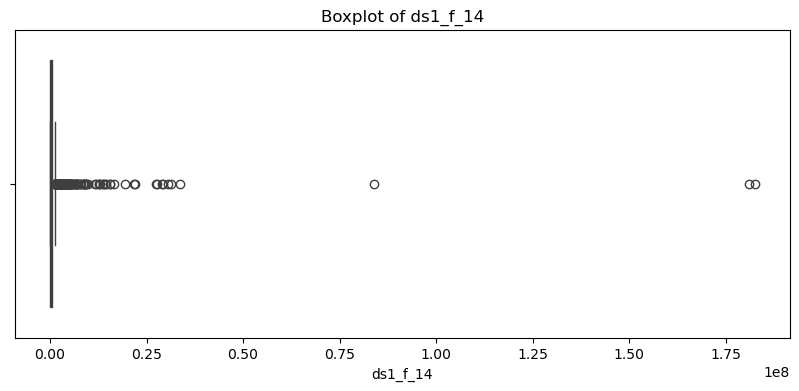


Outliers in ds1_f_14:
Number of outliers: 235
Outlier values:
[2.06445003e+06 1.89641900e+06 1.19154696e+07 1.30678076e+06
 1.37325499e+07 1.34599995e+06 5.58668295e+06 1.43963453e+06
 1.26927910e+07 1.43800744e+06 1.85867462e+06 4.11741960e+06
 1.71308681e+06 1.49551895e+06 1.87523190e+06 1.45822048e+06
 5.15719274e+06 1.77420300e+06 3.36630207e+06 3.92062647e+06
 4.57413275e+06 2.97226325e+06 9.36046387e+06 8.90542292e+06
 1.65777953e+06 3.30857782e+06 1.80977967e+08 3.21196888e+06
 4.41853542e+06 1.37753753e+06 1.43808453e+06 1.29997638e+06
 2.86679699e+06 1.42968584e+07 9.28282518e+06 2.05196227e+06
 1.28684457e+06 5.29651486e+06 2.70430888e+06 1.69505770e+06
 1.83066660e+06 8.39389497e+07 4.37318336e+06 3.70793905e+06
 1.32427282e+06 1.80365491e+06 3.03106505e+06 7.94881888e+06
 4.01634322e+06 2.95569513e+06 1.47932917e+06 6.90627528e+06
 1.54062677e+06 2.85156461e+06 5.48637501e+06 6.80410325e+06
 1.81265478e+06 2.60865064e+06 1.71075525e+06 5.21825380e+06
 6.43982599e+06 5.4823

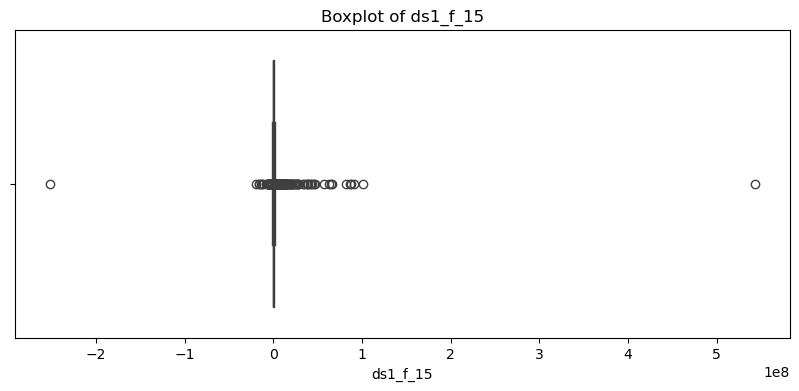


Outliers in ds1_f_15:
Number of outliers: 304
Outlier values:
[ 2.18314454e+06 -6.04807858e+06  2.54999951e+06  3.99381676e+06
  3.31926485e+06  5.64837472e+06  3.91857923e+06 -3.23767910e+06
  2.95166395e+06  2.32003388e+06  3.25103034e+06 -1.53542739e+06
  3.01903851e+06  1.65897028e+07 -1.29687680e+06  2.47040452e+06
  2.15177228e+06  2.19810914e+06  3.79854379e+07  4.23518957e+06
  5.05806387e+06 -2.73317862e+06  5.47163582e+06  1.33954782e+07
  5.18798790e+06  2.51815721e+06 -1.99957483e+06 -2.74775474e+06
  9.86759424e+06  1.16976788e+07  1.36968905e+07  8.90342846e+06
  3.44547662e+06 -1.46128389e+06 -1.60839331e+07 -4.92654119e+06
  9.73822277e+06  5.42921070e+08  2.24939065e+06  9.63507458e+06
  1.28519612e+07  4.05351613e+06  2.16361445e+06 -1.86130486e+06
  3.77468563e+06  3.89381119e+06  4.28874708e+07  3.08105392e+06
  2.76963617e+07  2.84272219e+06  3.83182253e+06  1.58673198e+07
  7.24400095e+06 -1.84375038e+06  5.08205198e+06  5.34789530e+06
 -2.51811712e+08  1.3115224

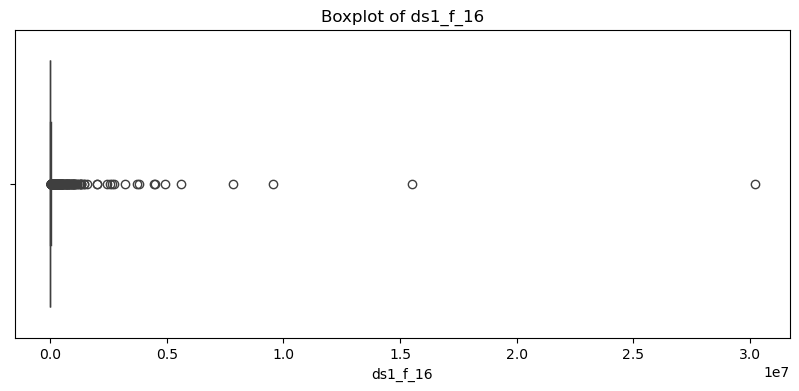


Outliers in ds1_f_16:
Number of outliers: 256
Outlier values:
[   36197.6321842     63136.56550088    58892.66178531    78277.76936609
   444526.15375717   672360.12685465  2750080.86215292   540840.94468626
   221481.64774198    34879.11314904    45939.65530576   837359.60145043
   210999.70118928   927626.30090358   193239.82203318   664115.6671193
   103672.18521931    85471.761753     141306.17566284    44072.91244664
   246551.94727079   120488.87382354   166616.28819109    39059.51865845
   782672.47661151 30198094.7649961    462344.47575188    72471.07627605
    60506.11011704  2567886.11050592   146189.16121763    38053.36258285
    79161.93087262    56609.4361492     42118.1663338     65987.86794218
   100817.17855413   485442.97215564   127291.31381736   239882.97113117
 15517094.07662996    59668.09432079    68493.42760075    41529.0888338
   480890.90012274    36415.32252942    58672.1775649     35970.35835607
   118222.44212928   273854.91539368    68365.74681788    49998

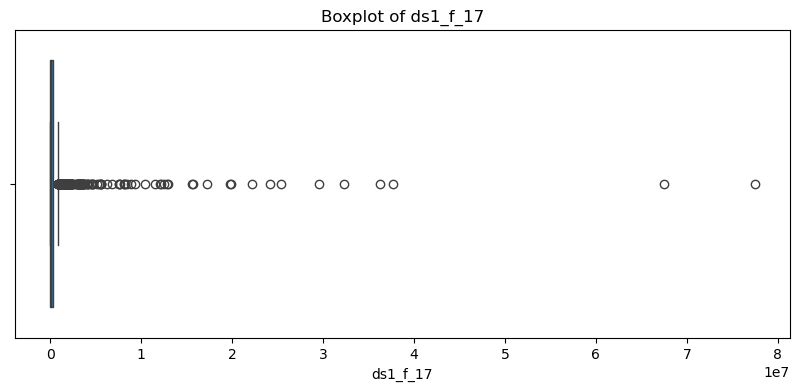


Outliers in ds1_f_17:
Number of outliers: 211
Outlier values:
[ 2191642.28129244  8483600.80227748  1258966.74195798  3070312.9946323
  5556640.30174269  3592875.33176315  2733993.52265743   992709.42054073
 11524224.97078104  1273943.65224737  5393696.18601913  1172685.4528519
  1151605.0793995   1724939.40600474  2038939.40280127  1183274.81820776
  7582778.60252568  3270793.61243853  1848239.14336556  1987588.97827513
  1867099.13933443  2449493.95693146  1434959.24636188  5199155.43568073
  3605717.90143663  1294149.30521297  8070985.99563784  4026705.694483
  1510659.77550532  8871080.09136274  1385288.39123902  1346611.42850296
  1467516.37361606 37716090.54412381  3638284.00057422  2097524.52619938
  1167198.0260615   2249396.80166044  1219237.89338225  1873242.89534511
 12902319.15917341  1096804.98258309  1898734.32027924   923699.34346167
   894184.88010098  1223214.15621738   924931.70500977  8076490.59060128
  1256207.47320451  1162883.00439968  1280778.30782298  2213334.9

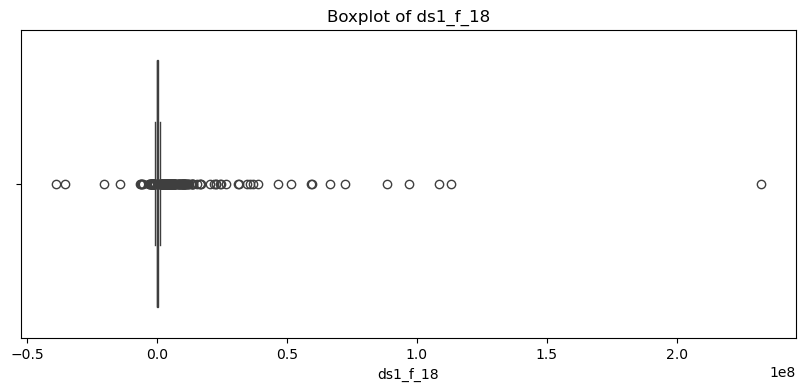


Outliers in ds1_f_18:
Number of outliers: 304
Outlier values:
[-1.37233372e+06  3.51911922e+06  1.68582605e+06  3.77553778e+06
  9.20035992e+06  1.95823903e+06  1.06906635e+07 -8.43264385e+05
  1.57483344e+06  1.77042338e+06 -5.30075540e+06  8.16461065e+06
  1.94318564e+06  3.45241758e+07  1.83461361e+06  3.48730637e+06
 -1.56748343e+06  2.20634883e+07  8.67450727e+06  3.65074925e+06
 -2.14196111e+06 -1.15312894e+06  5.90684261e+06  5.50728367e+06
  7.32202975e+06  4.29779264e+06  1.55531833e+07  3.81215612e+06
 -2.02913704e+07  1.77495322e+06  2.32759094e+06  1.20745717e+07
  4.53054702e+06  1.48058071e+06  1.41509511e+06  2.65449649e+07
  4.10664386e+06  1.79653437e+06  1.13146386e+08  1.71395497e+06
  1.62774709e+06  1.93155307e+06  1.77562643e+06  1.08729893e+07
  3.48078106e+06  6.74236646e+06  2.42655838e+06  5.61755193e+06
  2.06715636e+06  2.31994536e+06 -3.87008461e+07  3.28903597e+06
  5.53739103e+06  2.56454744e+06  2.64853527e+06  3.62861298e+06
  1.67996868e+06  2.4213900

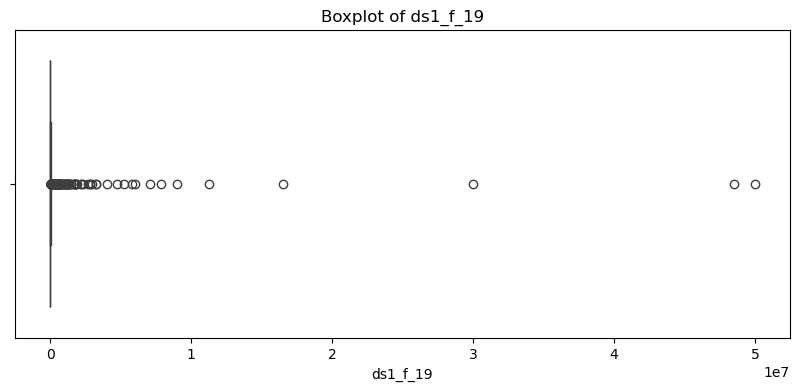


Outliers in ds1_f_19:
Number of outliers: 279
Outlier values:
[  137508.08508895   187562.45851207   119935.5729527   5792234.74534322
   449349.86578064    86330.55987075    69973.51075779    93447.72986434
   131304.30379516   147817.89086251   101141.55022163   202185.57178871
   110490.28151016  6029544.52267601   146505.10994131    93726.91281511
   113776.36891661    64131.30007473   137663.89443764   397888.89059295
   285831.54764294   217999.31057424    80536.40032939   407594.69198499
    93654.05590441   288756.80877809    89019.8696303     93306.38648665
   433075.39749752   567047.56534714  2994299.28163972    71015.98109963
   140182.0674704     81120.23533411   109377.47293574   291880.19739859
   119833.35343551   136273.07297609   169852.03832801   135638.30279854
   142125.66361326   205960.86978791 49956139.54985917    69917.82715068
    76078.53221965   537601.5816629    117010.96307599  1863639.45188331
    82110.56924493  1034250.43874716    61293.80063322    723

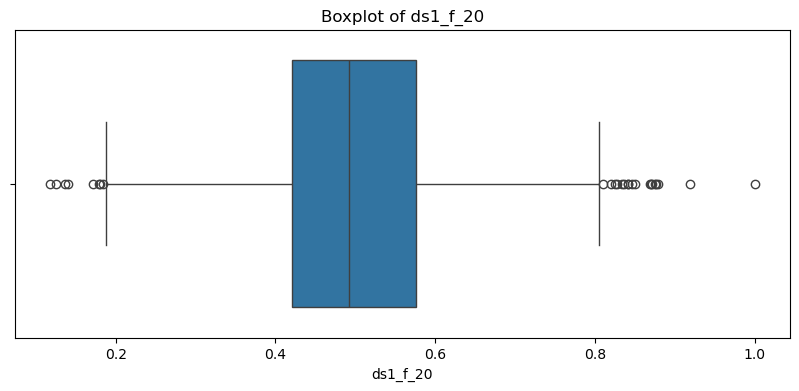


Outliers in ds1_f_20:
Number of outliers: 26
Outlier values:
[0.18424426 0.84191733 0.84144146 1.         0.82713684 0.86835183
 0.82494819 0.1366442  0.86988917 0.91892904 0.8367337  0.11774551
 0.14014499 0.12555742 0.87883377 0.87207779 0.171231   0.87682086
 0.84640397 0.82064322 0.8758234  0.81065625 0.17957323 0.8502676
 0.83331197 0.1805108 ]
--------------------------------------------------


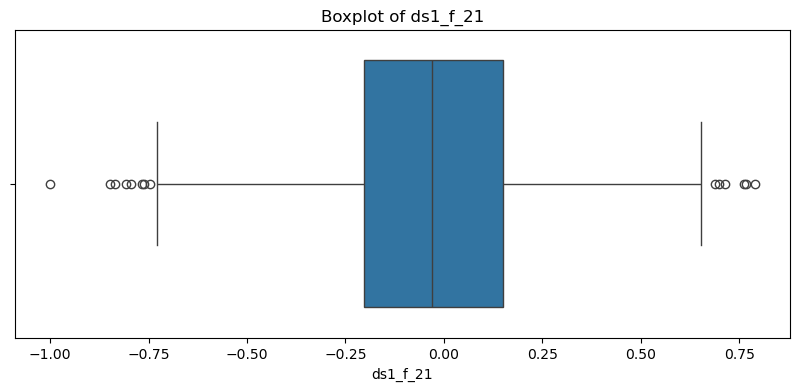


Outliers in ds1_f_21:
Number of outliers: 14
Outlier values:
[-0.74730921 -0.76055741  0.71363511 -1.          0.6978807  -0.84861285
  0.78886141 -0.7946923  -0.76584647 -0.83619258  0.76261136  0.68700137
  0.76601502 -0.80700431]
--------------------------------------------------


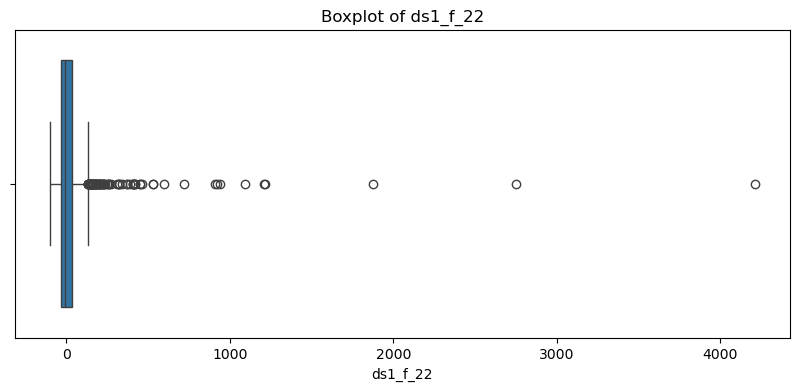


Outliers in ds1_f_22:
Number of outliers: 82
Outlier values:
[ 173.36985961  407.22424882  404.43623565  187.1766237   907.50224257
 2750.8751966   410.08972913  181.3474043   179.07287616  136.39612407
  137.88353058  596.83905873  198.01217126  309.52287125  143.65387872
  161.20852623  249.20481598  165.06324228  252.43229624  223.27725327
  203.37630927  163.68320438  216.89300357  318.72421783  132.85830178
  939.74984287  221.08719713  419.63326269 1094.76617856  234.80374717
  157.5022246   203.74517027  390.91140614  417.58093242 4208.78128866
  322.10748169 1872.77402831  174.00114524  131.84544224  159.56609417
  132.11457736  451.17424347  717.28079877  222.28626744  447.45052606
  191.51081317  150.24366374  185.10830677  203.44657637  146.54125677
  527.66899794  318.70208882  175.50406923  204.43645753  161.08426719
  137.02999759  178.97552338  269.89951105  133.40666946  153.54617536
  372.41294038  337.50202862  157.50349944 1217.17357527  229.16079944
 1210.85698923 

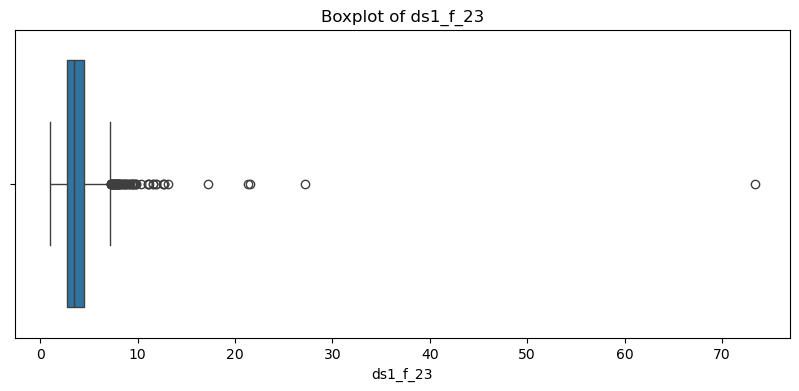


Outliers in ds1_f_23:
Number of outliers: 67
Outlier values:
[ 7.25213353 17.18960886 12.57522946  7.98023393  9.22109494  7.22832292
  8.26640209  8.01663166  7.33674835  9.82963774  9.70221355  7.72406114
 11.91027099  7.82151508  9.45699142  7.28284296  8.84165721 12.72696155
 11.19670263  7.28703477  7.25317064  7.71241286  7.9270011  11.53674381
 11.61386728  7.6091324   9.44828901  7.2234899   9.60808886  7.36947571
  8.50893274 11.85259847 11.03342254  9.8581014   7.94631676  8.58481704
  8.15589024  8.64075047  7.60150919  9.14945809 27.21083378  7.41642855
  8.85463933 10.35735948  8.81309428  8.1588966   7.76249016  7.80612415
  8.59769995 21.32938421  7.52189267 73.35281567  9.10819865 11.06195512
  8.04566442  7.86210517  9.4071352   8.31651478 13.1480441   9.53349015
  7.54790869  7.79762304 21.49856598  7.51834576  7.76294779 12.70740485
  7.3930523 ]
--------------------------------------------------


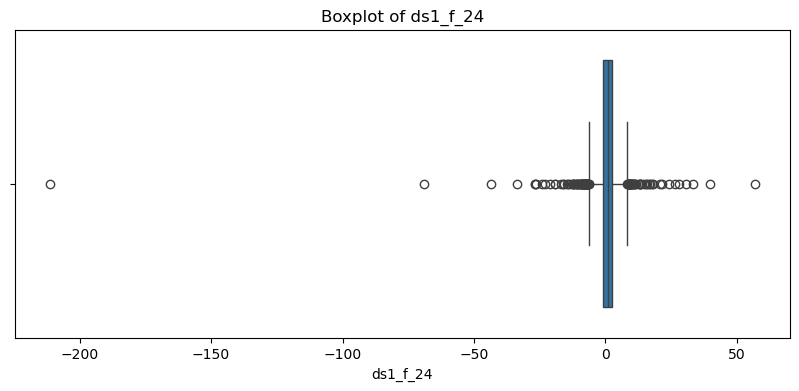


Outliers in ds1_f_24:
Number of outliers: 108
Outlier values:
[  -8.52898039  -15.78647654    8.59987326   -6.54516487   -7.61616715
   -6.57904926   -8.33644165  -12.29970959   39.79837514   11.45033065
   -8.71270057   21.65168626   -9.97117595   -9.78664165  -12.21483576
   -6.49597499   -7.39196834  -26.89239787  -14.42148088  -10.80044738
   -7.14731071   15.88822925   -7.37759008    9.9508718     8.58284647
  -16.98943971  -22.89836031   -7.25054319   -7.39029444   16.74615258
   12.77930292    8.15946348   24.1252259     9.81826296   10.37505834
    9.35360475   10.71812569  -10.62677708  -12.26060909    9.57757254
    9.7701583   -10.47990036   13.70685826   -9.00905408   26.34941748
   -8.00221237   -6.99210031   10.80058286   28.02787973   15.42874665
  -19.29440985  -11.82270113   -7.43117373   14.61980603   20.60801853
  -69.09294134  -26.21514699    8.91312321   -6.62489694   -9.30575473
  -13.46975528   11.56992206  -14.27795793   -7.11295459  -21.21666674
   -7.21619532

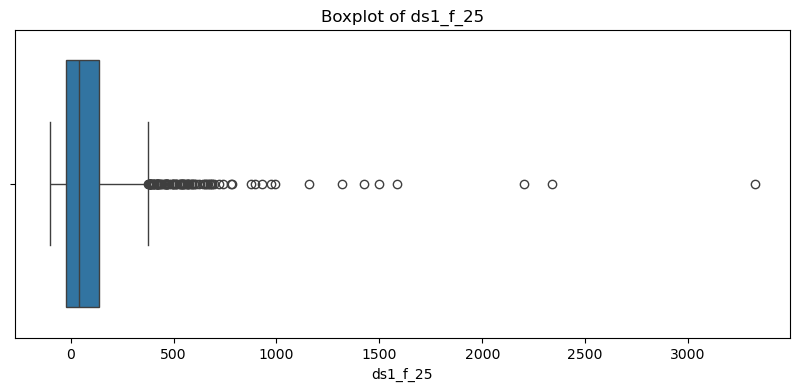


Outliers in ds1_f_25:
Number of outliers: 97
Outlier values:
[ 588.07432546  538.9012373  2339.11765333  686.64006965  503.49183495
  623.02653535  698.29308559 1425.72869314  459.02448123  417.1428363
  385.26559596  404.71331157 1583.28831961  434.13387405  535.43476697
  402.4672194   553.36647967  784.30933654  583.39177027  653.44948767
  379.34324712  466.34270152  469.56450731  722.58271877  535.1157433
  496.47201691  398.81226825  379.32445148  927.9965794   542.92875139
  545.46545055  893.74668092  530.78141172  511.0224475   476.45897927
  417.29340089  436.61361138  660.99724134  419.55675161 1156.22329878
  499.4561533   740.3174171   442.8915242   972.86587348  666.36721968
  391.08864642  877.82933074  684.55680262  383.48010222  387.23177317
  654.49694393  388.29211119  527.55487859  601.51225473  642.38193211
  569.18362009  486.0166005   576.84983158  678.59296228  470.02069471
  993.44169936  455.44727207  469.36613926  566.38807266  377.98215097
  400.90756041  3

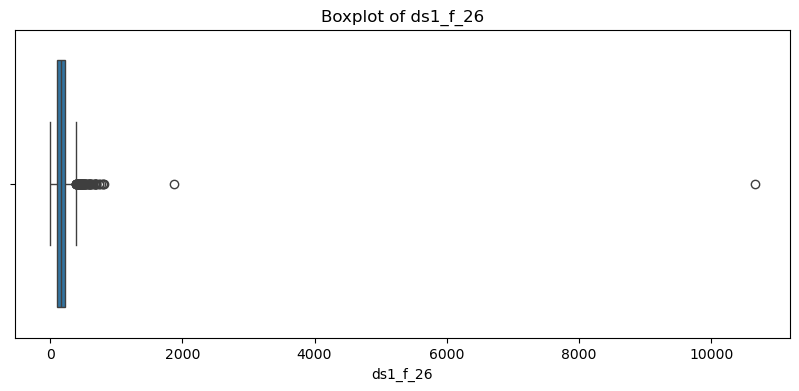


Outliers in ds1_f_26:
Number of outliers: 80
Outlier values:
[  468.53904386   672.48623092   483.49334099   815.39949203
   807.70191274   466.71742182   486.55569028   695.97411649
   557.08259194   548.43044122   609.08807097   604.74312784
   636.22389924   453.75072954   564.85175482   410.88223978
   463.03254364   402.90947127   458.8030095    533.48068312
   525.6744184    652.467479     453.57461289   394.52664284
   463.8000072    480.53503126   622.33722337   675.85447579
   771.96965941   434.75992334   603.73657606   419.61578482
   737.17913185   518.57991033   405.44511894   423.85013806
   513.9917704    677.1378529    610.73834102   431.40873088
   400.18382514   411.28871093   501.6885269    420.90333342
   407.18492697   495.27186925   392.39566879   501.21399971
   532.01330268   391.37168551   426.17105535   423.86868413
   392.72594787   507.50260501   736.21683783   678.92276682
   697.6284533    507.49901412   428.31903285   390.38766681
   583.39328422   433.8

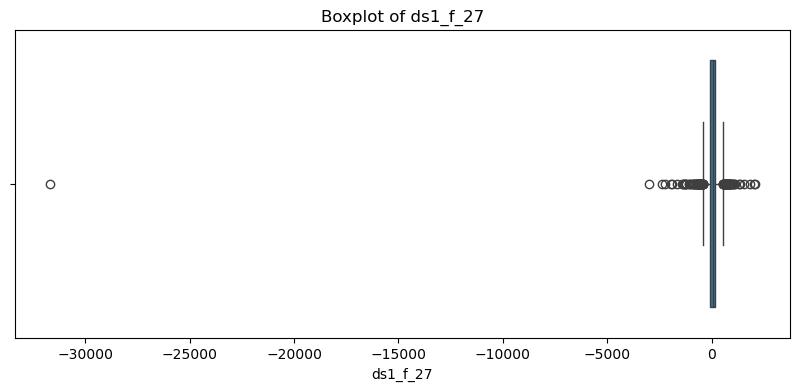


Outliers in ds1_f_27:
Number of outliers: 112
Outlier values:
[ -1878.88327974  -2250.55980486   -590.97016606   2066.63456997
   1123.52316415    644.98417355    658.60916554   -552.74025428
   -852.25838586   -465.82124173   -585.68886106  -2975.31357175
    872.32089328  -1239.62326054   -528.34572403    954.86118705
   -436.25789535   1329.54985164    605.97706253  -1231.08529915
   -705.60118915   1052.80474187   -553.923431     -667.33944537
   -743.50959785    613.75242551    791.10905938   -438.86877325
    579.53120514    857.41103879    721.72084176    627.42990979
    834.5051946     681.19885499   -547.68100536    774.48722704
    539.32102566   -475.98970725   -984.43924497   1580.72070578
   -433.76481853   -523.90952121  -1676.43378017    581.58527415
   -502.92198744    830.24280821    891.74160747   1032.68589376
    857.93615525  -1076.26168453   -414.31691649    738.10265607
   -456.01147443    923.52036142   -415.04081932   -520.2232858
  -1435.80218757    723.2662

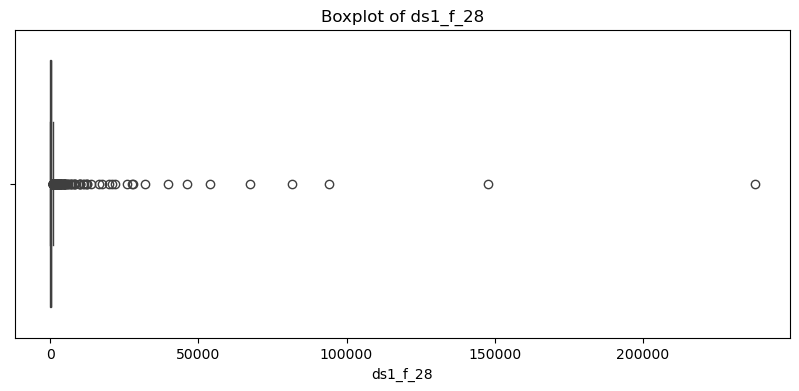


Outliers in ds1_f_28:
Number of outliers: 186
Outlier values:
[  2436.89588063    874.45500664   1248.54935945   2665.68330288
   4884.22708868    921.3050855   25956.51909088  39818.37830888
   2879.54316667   1323.77551329    776.30075413  93933.50952931
   1943.04320308   2921.21599744   1053.22954541   1742.40571774
   2416.84601328   1628.51341975   3707.24675208    814.82950887
    869.55257056   2996.70866503   1114.85446282    857.06793777
    894.84237637   2104.68069542    897.24731416   1432.05994676
   1024.07296139   2677.19946067    920.24528349  21734.58153343
   1293.07603055   7005.50347454   2159.17130728    935.04109383
  17365.1845087    5007.91290018    910.10506084    893.33928513
   7897.9695564    1208.01003152    933.24670132   3107.32983181
   1356.56988199   1031.77471459 147633.00299144   1692.47706859
    876.33923051  12455.00468495    979.74410613    947.99911601
   2014.52628184    938.69344554   1438.23821471   1158.08423842
    825.2884385     927.715

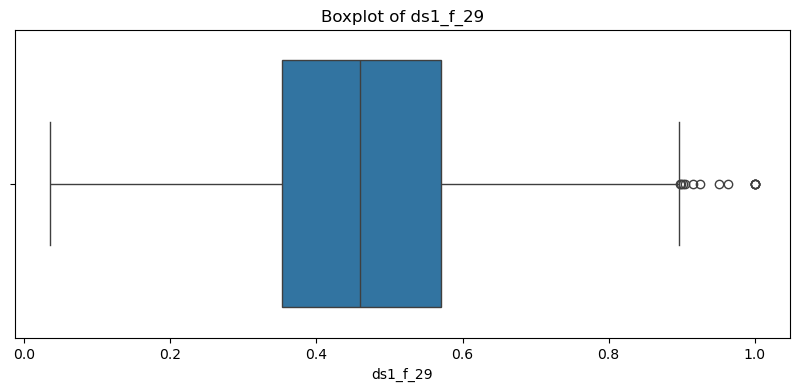


Outliers in ds1_f_29:
Number of outliers: 13
Outlier values:
[0.96365098 0.91611011 0.9044912  0.95096739 1.         1.
 1.         1.         0.89741714 1.         0.9020941  0.92518229
 0.89884665]
--------------------------------------------------


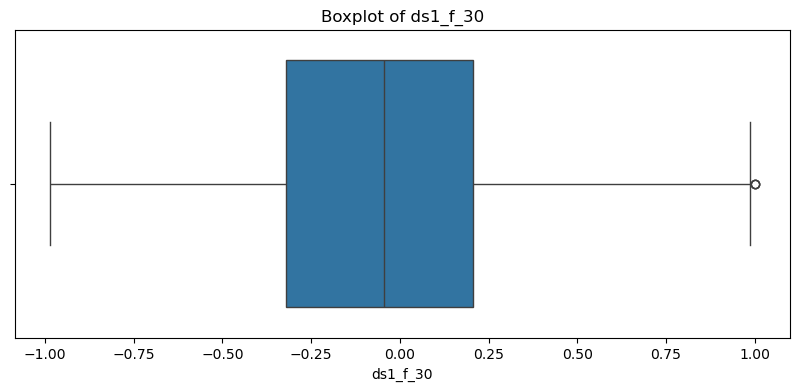


Outliers in ds1_f_30:
Number of outliers: 3
Outlier values:
[1. 1. 1.]
--------------------------------------------------


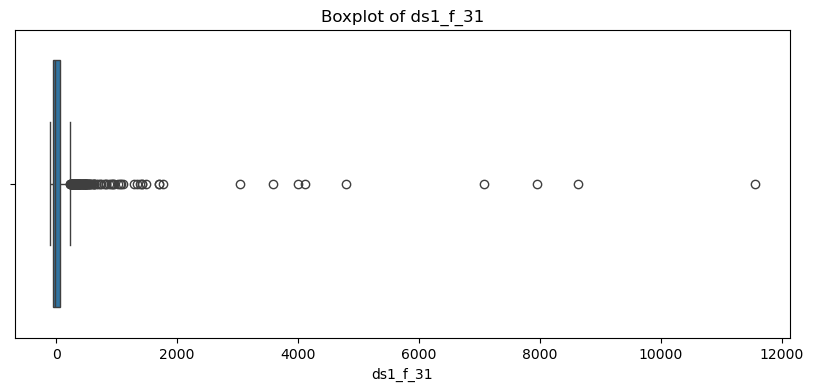


Outliers in ds1_f_31:
Number of outliers: 131
Outlier values:
[ 1490.95986335   480.2458842    556.19309196   366.32889238
   362.9124877    447.98271183   393.9640987    288.10714578
   243.57367194   471.86261197   272.99784136  1383.3676253
   236.7927577    740.39554189   246.66607321   239.31989781
   324.8550783    446.2402573    480.57207888   463.4011213
   356.28758912   630.3541907    378.62656292   280.63909656
   964.82556415   249.00861623   633.33946655   255.07565353
  1099.43490255   352.82301194   270.37138496   516.07693371
   380.29163967   262.4906873    374.30809112   282.945776
   832.09890183   304.24023817   379.44841313   490.3230409
   497.13879616   492.63900281   579.47317211   528.75098116
   906.74466278   487.8769062   4795.3992335   3591.3497427
   429.67619759   443.93334948  1416.77919231   332.7430582
   411.94713192   239.40560234   341.24124933   324.91339754
   305.92940258   464.07078163   825.70587337   261.78262618
  1019.30929737   252.7934732

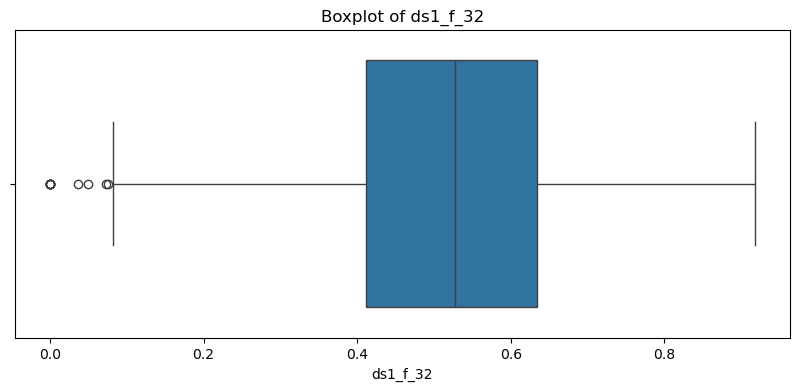


Outliers in ds1_f_32:
Number of outliers: 11
Outlier values:
[ 3.63490212e-02  3.14933265e-14  4.90326138e-02  4.22624898e-14
 -5.04411328e-14 -1.75045164e-14 -1.83926948e-14  2.96059473e-16
  7.30158585e-02  4.15223411e-14  7.48177101e-02]
--------------------------------------------------


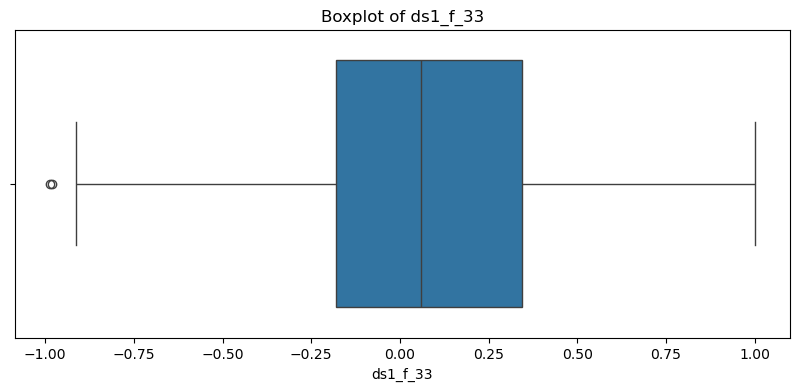


Outliers in ds1_f_33:
Number of outliers: 2
Outlier values:
[-0.97957266 -0.98606072]
--------------------------------------------------


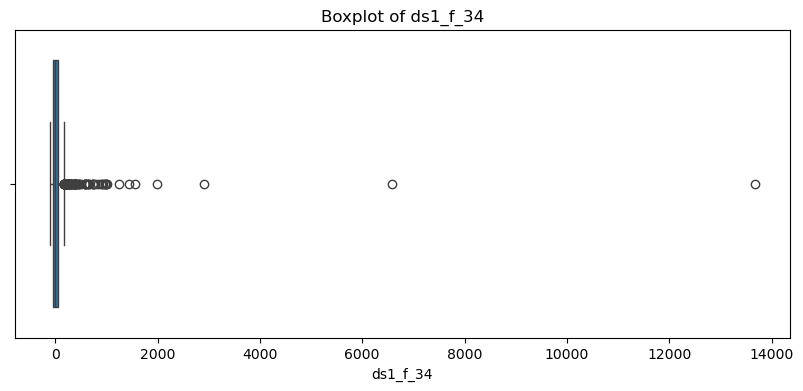


Outliers in ds1_f_34:
Number of outliers: 112
Outlier values:
[  573.96064561   392.54780972  1255.03560747   970.51764631
   307.50145364   177.81473931   263.73720518   258.23820434
   185.94995011   233.42426833   272.81642172   366.25722149
   925.28331215   739.56437561   304.53163021   508.42598016
   250.72503543   253.52487505   174.33129315   377.73062785
   291.5831058    375.21156853   265.84033269   199.0854355
   786.32307614   223.26269677   377.98135495   285.96139836
   168.68662594   843.23778514   654.66813855   184.89207302
   237.93672789   255.15484635   209.70116782   922.02998961
   193.92865392   206.34475375   192.72974116   169.48429849
 13667.89136134   994.18225671   199.11192472   387.6245828
   328.99854122   178.56692004   262.71621807  6576.90531624
   437.09136015   392.3566563    247.33273716   267.91227393
   988.66925929   230.37154401   188.46331121   172.87613884
   409.92207227   173.41354782   225.29032912  1559.20344741
   369.55359897   241.48

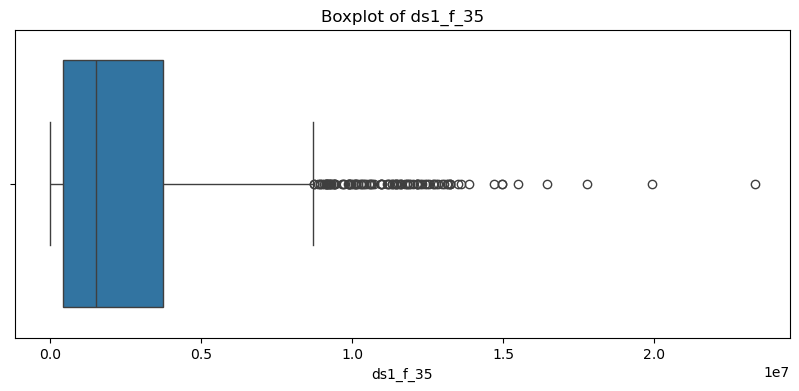


Outliers in ds1_f_35:
Number of outliers: 102
Outlier values:
[14713650.66666667  8874167.5        19937844.66666667 11514149.
  9429790.66666667 13253620.66666667 10595112.         11611224.33333333
 11813082.          9018071.33333333  9146590.5         9138200.
  8950477.33333333 12837649.66666667 12303595.66666667 12696741.
 11611742.66666667 11144233.         10042912.33333333 11756672.66666667
 10626654.          9887629.         10090490.66666667 17782989.
  9979875.66666667 12555830.66666667  9381417.66666667 11824569.
 10467578.          8742779.         11192422.66666667 13039699.33333333
 12464892.33333333  9892891.66666667 12776801.66666667 13493854.66666667
 11464694.66666667  9151416.          9675951.         11394332.66666667
 10983041.66666667 12168800.66666667 11467049.66666667  9242375.33333333
 13246170.33333333 12022619.66666667  8723747.33333333 10187372.
 11440756.33333333 13593490.         12972889.33333333 10957899.
  9707581.66666667 12163523.         1009495

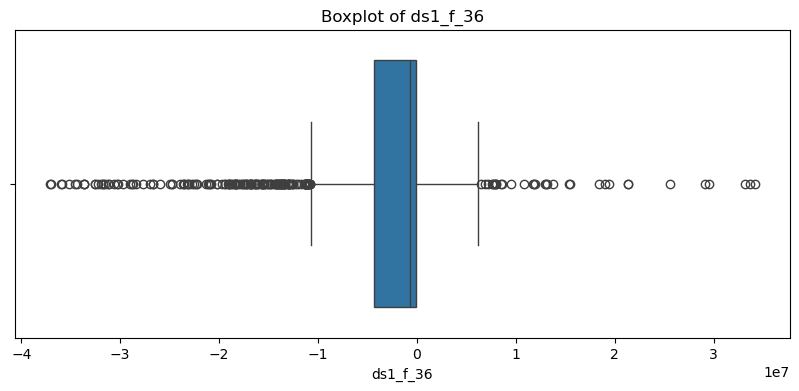


Outliers in ds1_f_36:
Number of outliers: 191
Outlier values:
[-17621275. -16737891.  21387232. -10818346. -33664053. -11036753.
 -37091614. -13449942.  13046424. -12059892. -19010352. -10839321.
  21352519. -23601292. -22221699. -26666472. -14804026. -16469948.
 -11035180. -15260378.  11735092.  29514156. -24992374. -18972898.
  34150664.  15414899.   7969077.   8531373. -16327102. -20227449.
 -31151928. -18456767.   7715233. -19354843. -12600401. -15630583.
 -16154597. -14137274. -14319194. -28981488. -24787476. -11218313.
  18975847. -28783844.  12942004. -21154601. -23524429. -11055400.
 -14773663.  11835165. -22737157. -18789216. -13005549. -14190283.
 -17511671. -18696811.   9499577. -26001640. -26966892. -32597853.
 -15074055. -31249746. -13759978. -12502279. -13977793. -13480820.
 -14047825. -20842179.  13162628.  13748598. -11201778. -23971887.
 -18040753. -11332341. -16295872. -21333714. -13780595. -11239466.
 -14712813. -17393929.   7153068. -18260865. -16913529. -15655576.

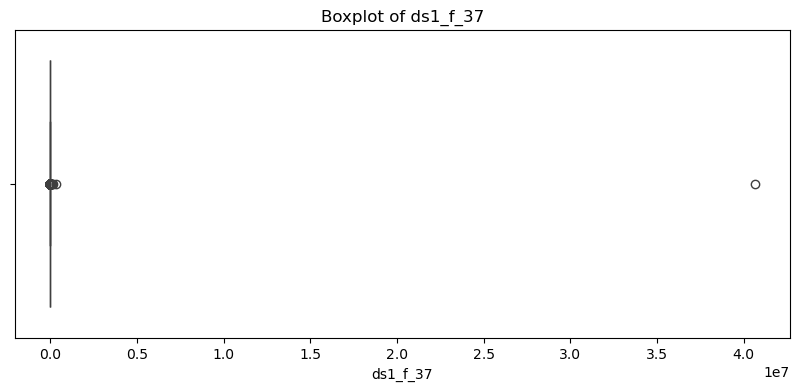


Outliers in ds1_f_37:
Number of outliers: 277
Outlier values:
[3.97517390e+01 4.03375781e+02 1.71479785e+02 2.09381875e+03
 1.81509225e+03 4.98882784e+02 6.65836445e+01 4.82206064e+04
 4.76011397e+01 1.08472548e+02 9.66205540e+03 1.77174401e+03
 9.15230753e+02 1.03618308e+03 6.72383008e+01 3.03422899e+02
 2.42473222e+02 1.17492271e+03 4.04098697e+02 3.19181701e+01
 6.71241483e+02 2.12443509e+04 5.26129341e+02 1.76218502e+04
 1.09349876e+04 1.15794960e+02 6.24395857e+02 6.37843043e+02
 1.33133398e+03 2.12725650e+03 4.36434244e+01 4.20152017e+02
 2.14766667e+03 2.29911105e+03 7.51870705e+02 3.61463539e+01
 3.67589081e+02 7.36501301e+02 4.70214975e+02 5.18391271e+01
 1.56324171e+03 2.49612453e+03 7.24632462e+02 1.38024669e+02
 4.17254997e+02 7.23434051e+02 3.41284931e+01 1.46714448e+04
 1.25455361e+02 4.12678891e+02 1.11679456e+02 2.09213724e+03
 4.98698662e+02 2.26208280e+04 7.29571578e+03 5.27254124e+03
 6.33216076e+01 7.22270950e+02 4.06255857e+07 2.03082638e+02
 3.06137966e+04 1.8633

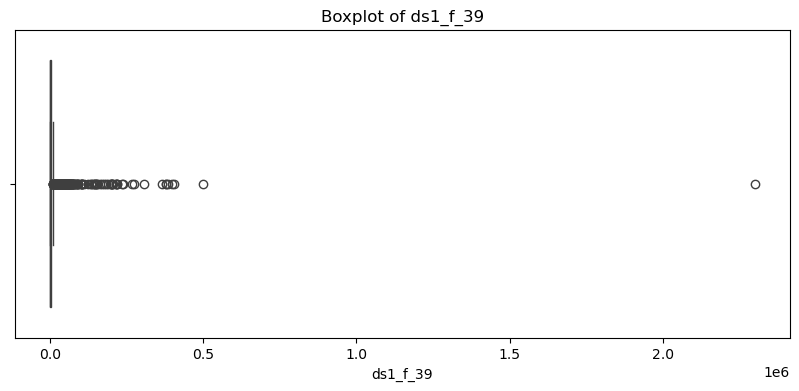


Outliers in ds1_f_39:
Number of outliers: 263
Outlier values:
[  44500.   21000.   40000.   13500.   24277.   29677.   46600.   12000.
   18000.   51982.   21000.   53000.   58000.   11781.   10881.   24675.
   63700.   14000.  105000.   12000.   17742.   22000.   17327.   12000.
   27930.  200000.   25500.   20000.   19597.   18800.   19618.  175000.
  100000.   13300.  380000.   92700.   15000.   23080.   14848.   74000.
   11500.   47000.   12589.   99417.   70757.  140000.  109700.   92000.
  199000.   42000.   24000.   16000.   17000.   15100.   21700.  217000.
   13404.   12900.   28637.   20050.   23841.   11246.   15194.   18500.
   13000.   53000.   35000.   38100.   15000.   15184.   15000.   62610.
   16724.   51257.   19000.   60000.   39600.   12000.   43500.  380000.
   21200.  199000.   29000.   31500.  134500.   46700.   12616.   22603.
   66000.  152384.   11500.   31574.   29000.   15500.   19300.   13741.
   19993.   60000.   33000.   15000.   19500.   46000.   3080

In [42]:
## Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Detect and visualize outliers for numeric columns
for column in df1.select_dtypes(include='number').columns:
    # Create boxplot
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df1, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()
    
    # Get outliers
    outliers = detect_outliers(df1, column)
    
    # Print outlier statistics
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Outlier values:\n{outliers.values}")
    print("-"*50)

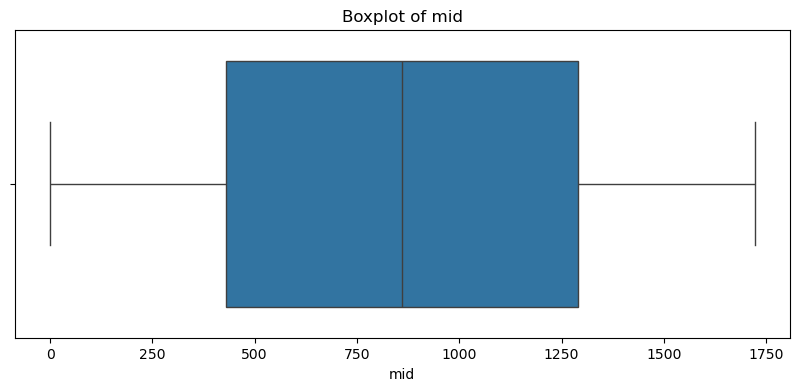


Outliers in mid:
Number of outliers: 0
--------------------------------------------------


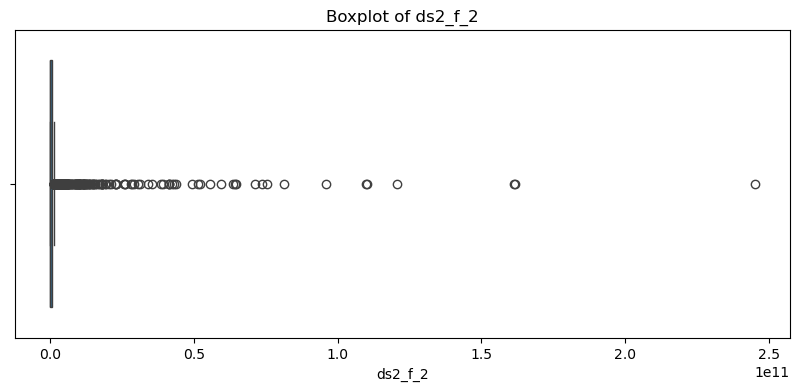


Outliers in ds2_f_2:
Number of outliers: 282
Outlier values:
[2.94870000e+09 2.60000000e+10 3.20000000e+09 1.64609290e+09
 5.23290000e+10 9.03900000e+09 3.04130000e+10 3.80000000e+09
 2.84820000e+10 2.65784268e+09 1.93226930e+09 1.49372000e+10
 1.72433100e+09 3.55348000e+09 3.29214000e+09 5.53234000e+09
 2.06543406e+09 2.35800000e+09 7.54114061e+09 1.45140000e+10
 9.73407000e+09 4.84674300e+09 1.21000000e+10 1.04000000e+10
 1.43478800e+09 3.13901100e+09 1.34264939e+09 4.70000000e+09
 7.08667000e+09 5.10000000e+09 9.93967982e+09 1.35705452e+09
 2.30577300e+09 3.32671350e+09 1.49000730e+09 2.64540285e+09
 3.42503654e+09 3.77250000e+09 1.50971000e+09 5.32318000e+09
 1.07905000e+10 3.85600000e+09 2.29223733e+09 1.76760000e+09
 3.00000000e+09 1.24700000e+10 1.13200000e+10 1.36242000e+09
 1.18900000e+10 3.97600000e+09 7.53332650e+10 1.05360000e+10
 1.70605478e+09 2.01691600e+09 5.01736229e+09 3.88587351e+09
 1.58098187e+09 2.70000000e+09 1.59900000e+09 5.76308700e+09
 3.50000000e+09 9.09585

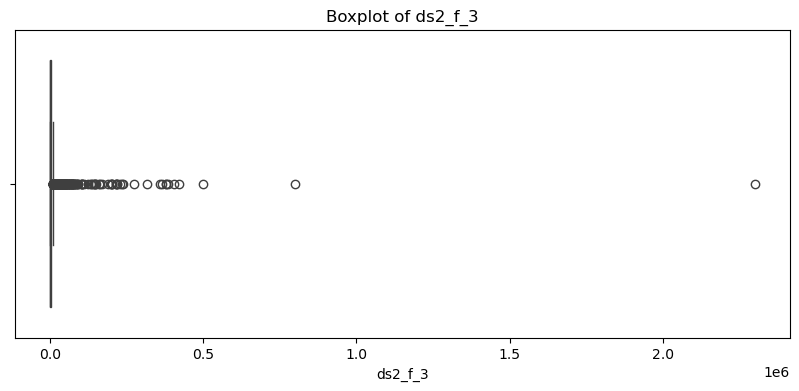


Outliers in ds2_f_3:
Number of outliers: 276
Outlier values:
[  44500.   21000.   40000.   13500.   37000.   29677.   46600.   12000.
   18000.    9831.   10000.   10000.   16634.   53000.   11781.   10881.
   10000.   24675.   50000.   14000.  105000.   12000.   17742.   22000.
   17327.   12000.   10000.   27930.  220000.   27000.   20000.   19597.
   18800.   19618.  199000.   13300.  380000.   23429.   15000.   14848.
   74000.   25756.   12589.   99417.   70757.  140000.  109700.   51501.
   92000.   10000.   24000.   16000.   17000.   15100.   20000.   10000.
  217000.  360000.   13404.   12900.   28637.   20050.   23841.   11246.
   15194.   18500.   25000.   13000.   53000.   10091.   35000.   25000.
   38100.   15000.   15184.   15000.   62610.   16724.   19000.   60000.
   39600.   12000.   43500.  380000.   21200.  199000.   29000.   31500.
   40000.   46700.   12616.   22603.   66000.  135000.   11500.   31574.
   31000.   15500.   19300.   13741.   19993.   10100.   60000

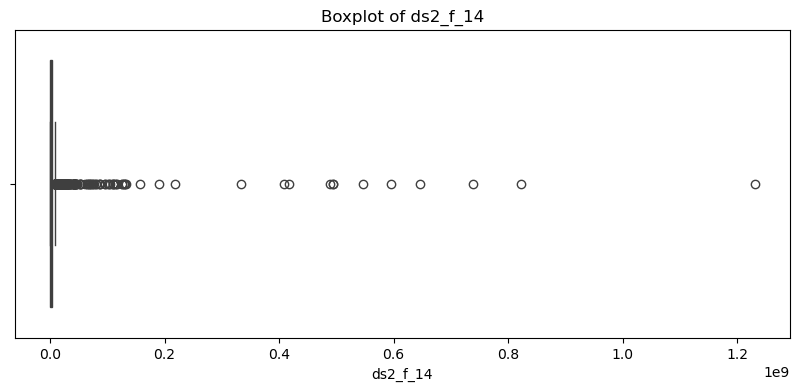


Outliers in ds2_f_14:
Number of outliers: 253
Outlier values:
[1.21965832e+07 1.24630386e+07 1.14404285e+07 1.13438135e+07
 2.59911336e+07 3.38216306e+07 2.25893993e+07 4.48226346e+07
 1.51999694e+07 8.74576271e+06 5.20020015e+07 8.54027667e+06
 1.12106544e+07 1.90184063e+08 1.86986786e+07 8.58961894e+06
 1.02188128e+08 3.91606402e+07 8.47453913e+06 1.01591353e+07
 3.21046796e+07 4.20855406e+07 4.75099288e+07 2.72375524e+07
 4.15604797e+07 2.02230854e+07 9.12912696e+06 2.37373699e+07
 4.93214656e+08 1.32826130e+08 2.91653176e+07 1.78812679e+07
 1.09949653e+08 2.27628544e+07 1.03663346e+07 6.45407983e+08
 2.35863150e+07 1.32432316e+07 1.08298682e+07 8.47289497e+07
 1.77791003e+07 3.32197355e+07 1.44290422e+07 2.21779241e+07
 1.14299978e+07 2.22213786e+07 3.18275660e+07 1.04483936e+07
 2.28212168e+07 1.66286395e+07 1.43721043e+07 7.05983385e+07
 6.93148779e+07 2.92267151e+07 8.43711980e+06 9.67321762e+07
 2.66733519e+07 1.49982806e+07 8.69637680e+07 1.44129535e+07
 1.53510057e+07 2.0309

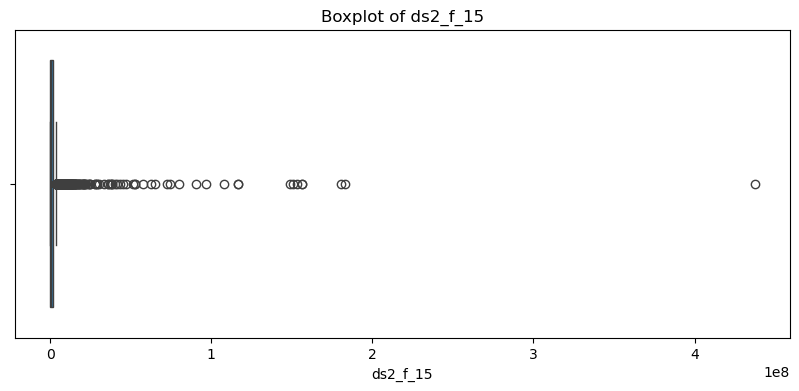


Outliers in ds2_f_15:
Number of outliers: 242
Outlier values:
[6.90157606e+06 4.92567130e+06 6.04645919e+06 5.74460533e+06
 1.21526217e+07 4.30929471e+06 1.43690327e+07 4.38660383e+06
 1.88368072e+07 4.88183374e+06 1.08114642e+08 4.89354946e+06
 1.14987298e+07 4.34510186e+06 4.04661123e+07 1.33926637e+07
 3.88169610e+06 1.53462861e+07 1.59681364e+07 2.34015759e+07
 1.32111709e+07 1.74291680e+07 4.71924335e+06 5.19418555e+06
 9.87725455e+06 1.83105725e+08 3.83877676e+06 1.25724104e+07
 1.38270551e+07 3.85025677e+07 3.79145771e+06 6.48599460e+06
 3.84516931e+06 4.20473828e+06 1.56034360e+08 4.15910656e+06
 6.96099239e+06 3.58955596e+07 3.94553615e+06 6.31254909e+06
 1.96673950e+07 9.58344402e+06 1.06227555e+07 6.89918679e+06
 1.28414027e+07 2.04248524e+07 5.76489109e+06 5.28108601e+06
 8.54472242e+06 5.90218362e+06 3.71768548e+07 1.28643874e+07
 1.30257694e+07 2.04523354e+07 9.76520851e+06 7.28539547e+06
 2.88904622e+07 4.88083022e+06 8.05227489e+06 1.32629154e+07
 7.08137530e+06 2.4464

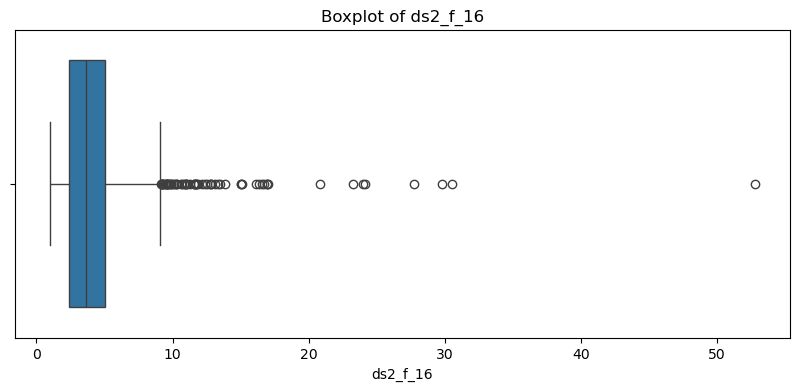


Outliers in ds2_f_16:
Number of outliers: 65
Outlier values:
[10.60405188 12.39976411  9.44032247 16.35884447 10.24441538  9.20412519
  9.32162023 10.89543676 11.72574672 10.05144728 17.02871976 12.81583239
  9.85591488 16.11282091 10.84541115 15.13071532 10.10782708 11.08038344
 11.83097978 10.70100305  9.75634303  9.89205505 29.76369681 10.9956942
 20.84296169 10.32383883 11.71954287  9.60481833 11.27494179 30.51813053
  9.22636887 23.25039219 24.16894364 12.85416061  9.25097149 12.1289565
 10.99066589  9.83580107 13.33362456  9.54571534 15.00827642 16.53342688
 11.64647645 11.56327189  9.16627068 16.69859798 13.88406694  9.69518818
 12.50512211 52.75923305  9.59397899 16.90617443 13.46358386 13.12773718
 15.02490325  9.52371931 11.70179099  9.28198023 24.00474047 10.26406423
 12.7165177  27.74157329 11.59406894  9.58163016 16.92938676]
--------------------------------------------------


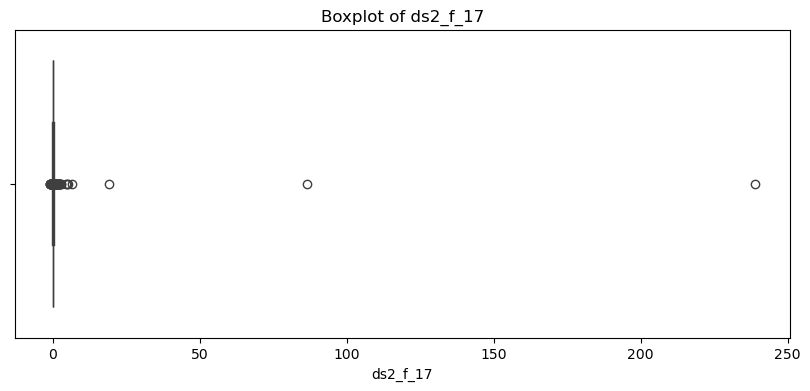


Outliers in ds2_f_17:
Number of outliers: 166
Outlier values:
[ -0.38220278   0.34530662   0.99726041  -0.52838394   4.5932209
  -0.41409598   0.30587928   0.50349172 238.79034688   0.28747857
   1.56409709   0.44951977  -0.41434106   0.37401545   6.60989781
   0.32623353   0.52442483  -0.48558823   0.32647502  -0.88294993
   0.28567758   0.46612613   0.4577641    1.08439635  -0.41658825
  -0.69496343   0.46712665  -0.80173036  -0.51123191   0.31522582
  -0.57236112   0.3664072   -0.6566929    1.00286344   0.35603887
   2.1201689    0.59604926   2.89983968  -0.57493757  -0.47447269
   0.53049348   0.57719437   0.39352585   0.61712446   1.21255316
   0.30541376   0.44229522  18.90524574   0.35261557   0.37262928
  -0.40413459   0.49655933   0.64538578  -0.4305206    0.29611804
   0.41304663  -0.40103094   0.75743619  86.4750027    0.31315668
   0.54799387   0.7720369   -0.40399425   4.66166074  -0.45060656
   2.43155775  -0.52984931   0.88634218  -0.75204455   0.42197909
   0.43181745 

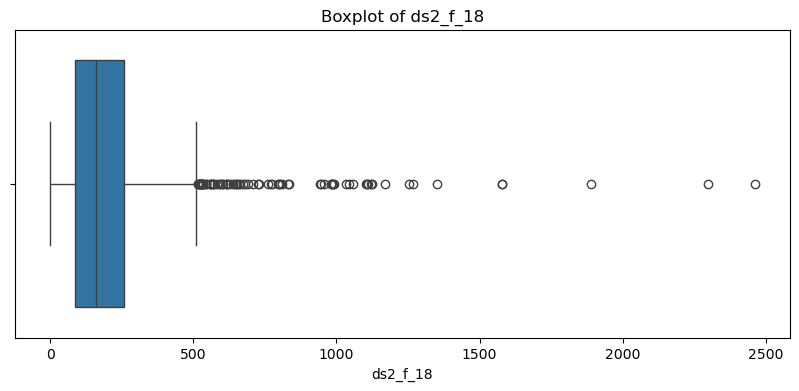


Outliers in ds2_f_18:
Number of outliers: 76
Outlier values:
[ 525.73691609  534.05894668 1119.94470227  524.09860468  692.68974312
  515.28158397  556.89247404  979.37652685  592.18422843  650.0144822
  707.62394776  985.46960031 1111.33058134  653.38218763  833.57947968
  613.75242551  990.58653962  775.09219365  801.84111328  573.02072117
 1034.3871924   617.30913032  798.23879088  672.05899435  729.58477527
  583.68179597  594.58494292 2299.37101689  810.76859941 2460.68934383
  528.42350396  601.59016537  831.32581065  986.29123909  988.15814693
 1103.72926422  646.52497779 1125.78162346  761.73493123  518.44175252
  661.18128283  569.24115662  558.11455403  545.75326557  531.74077254
  682.38242357 1265.9755832   532.20950537  619.44753159  663.04937636
  604.91013683  640.26988327  943.6105511   532.84760842  770.12902254
  627.32207238 1254.20153049 1889.94929674 1042.88174119  515.92151915
  531.85470226  958.24955449  562.30515657 1578.31935625 1059.18722133
  946.32887667  

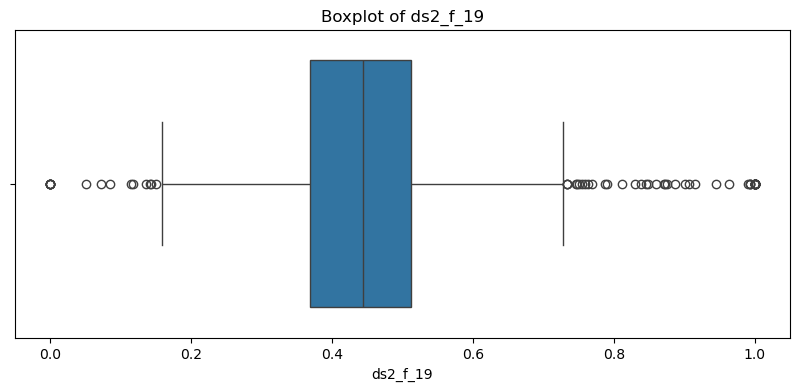


Outliers in ds2_f_19:
Number of outliers: 72
Outlier values:
[0.87107495 0.         1.         0.88702617 1.         0.90046695
 0.11697944 0.14355829 1.         1.         0.13581703 0.94525646
 1.         0.87267361 0.         0.08569427 1.         1.
 0.78977274 0.91562023 0.99999536 1.         1.         0.74579368
 0.14223982 0.9899342  0.84595325 1.         0.         0.99330585
 0.75020751 0.811928   0.84935094 1.         0.11502973 0.78722978
 0.         0.96360626 1.         1.         0.75442159 1.
 1.         1.         0.73306797 0.73338911 0.         0.76915318
 1.         1.         0.87546133 0.15026466 0.76279671 0.99299646
 0.8308203  0.73306797 0.83922395 1.         0.85949039 0.90685283
 0.         1.         0.74775847 0.         1.         1.
 1.         1.         0.99299646 0.07172559 0.05165519 0.75973406]
--------------------------------------------------


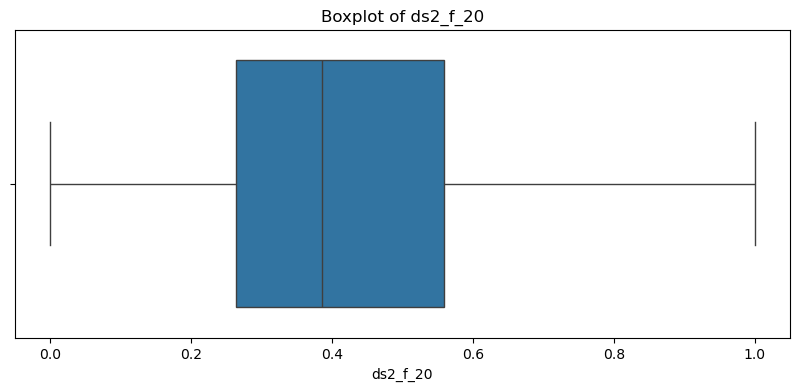


Outliers in ds2_f_20:
Number of outliers: 0
--------------------------------------------------


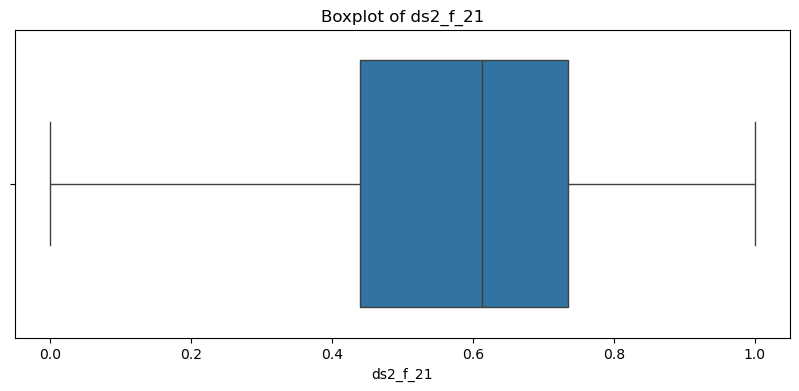


Outliers in ds2_f_21:
Number of outliers: 0
--------------------------------------------------


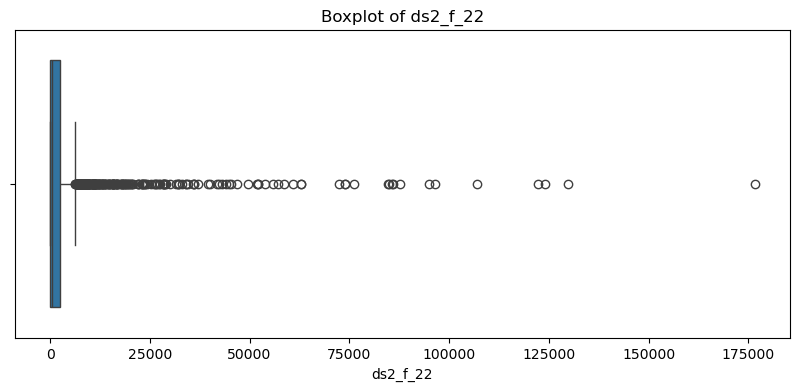


Outliers in ds2_f_22:
Number of outliers: 240
Outlier values:
[  7518.   6388.  34510.   7729.  31625.   6787.  40025.  32108.  14078.
  34170.  21948.  10905.  53939.   8349.   6827.  28656.   8809.  10834.
  12174.  73888.  25169.  13426.   9955.  11824.  23076.  23083.  11049.
  14679.   7738.  11501.   9674.  15552.   6462.  19419.  44951.   9764.
  72435.  29005.  51756.   6651.  19781.  12263.  55856.  11018.  11013.
  17986.  26609.   7011.  28556.  16235.  11051.  19322.   8131.   9585.
   6900.   9415.   8625.  10622.  28375.  10117.  15068.   8270.  16676.
   7667.   6864.   6921.   9531.  10971.  29963.   7132.  16438.  15656.
   6501.  13429.  15821.  12973.  52195.   8121.  18987.  18896.  18260.
  58587.  62770.  94980.  84778.   8321.  12267.  10725.   9758.   6299.
  36155.  36167.  85008.  76086.  85723.   8922.  24225.   7690.   8003.
  49662.  15375.  11483.  13507.   7685.  32336.  18939.   6859.  10484.
   8719.   6782.  27454.  12265.   8751.  10908.  10904.   78

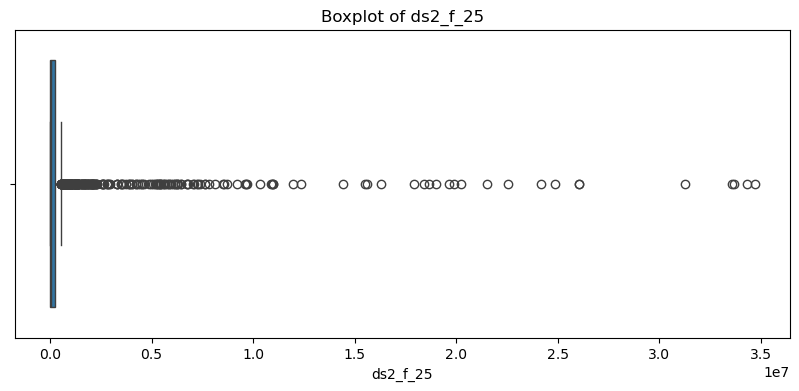


Outliers in ds2_f_25:
Number of outliers: 266
Outlier values:
[  616422. 22565532.   635547.  1338530.  1036021.  1928918.  5083811.
   663639.  2854425.   722433.  1546384.  1747382.  3554649.   586175.
   704379.  7296971.  1042955.   631862.  6229955.   720101.  6426525.
  1369667. 15526123.  5425431.  1204651.  1759470.   798271.  1364355.
  1644660.  4054030. 24192438.  1287452.  1559104.   587898.   681303.
  9186597.  5477009.   565250.   626299.  2091386.  2637991. 20237262.
 33593886.  5191572.   658076.  1195946.  2603119.   887174.  3294300.
 34301634. 24862300.  8120220.  1391662.  8531394.  1341877.  1219952.
  6071833.  2110769.  2046925. 10963044.  5599195.   836388. 10959255.
   652419.   769308.   557486.   776348.  1976501.  2094262.  1633898.
   695985.   631144.   559263.  1016950.   926618. 19900178. 17907714.
   599640.  1646857.   721254. 11978089.   556357.  3501892.  1370253.
  2535370.  4244481.  9712521. 26035804.  3876348. 10313996.  2009962.
   733018.  56

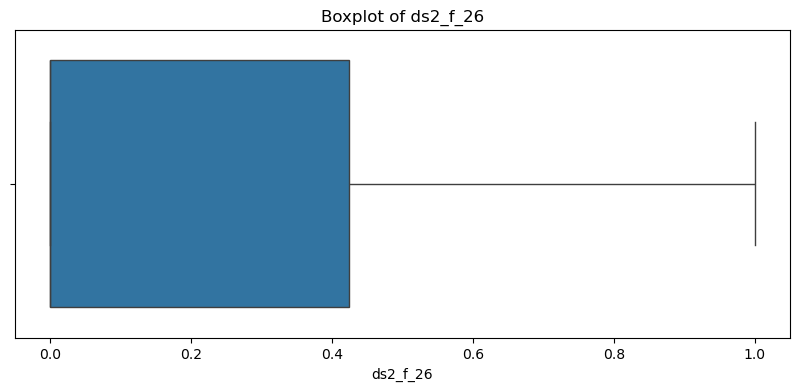


Outliers in ds2_f_26:
Number of outliers: 0
--------------------------------------------------


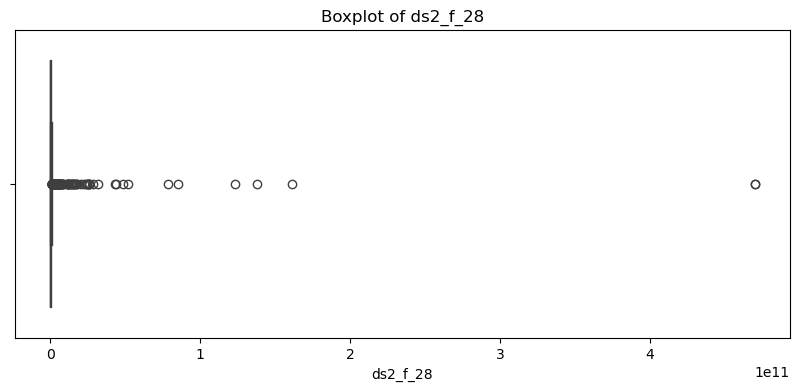


Outliers in ds2_f_28:
Number of outliers: 189
Outlier values:
[3.98636199e+09 3.41787671e+09 1.61327558e+10 1.94229831e+09
 2.89936247e+09 5.78300000e+09 7.34075751e+09 2.85860000e+10
 5.19010000e+09 1.37888000e+11 8.89077300e+09 1.84502262e+09
 2.44112580e+09 1.43478800e+09 1.89828359e+09 2.10700197e+09
 3.58210000e+09 1.09849900e+09 4.15194884e+09 1.56493733e+09
 1.93664958e+09 4.05680000e+09 1.42689600e+09 6.15060300e+09
 7.87840356e+09 2.76453222e+09 4.09986400e+09 4.54000000e+09
 1.45094837e+09 1.82000000e+09 4.30641951e+09 1.20681751e+09
 1.14685542e+09 4.57500000e+09 4.28545101e+09 1.23933818e+09
 5.55453407e+09 1.68494606e+09 3.06649123e+09 5.76393600e+09
 1.33039400e+09 1.41238446e+09 1.61142462e+11 3.70966558e+09
 1.50373000e+09 1.51078190e+10 4.88800000e+09 1.30624852e+09
 4.86362082e+09 5.84600000e+09 2.08292800e+09 3.38802247e+09
 4.24388135e+09 1.42087200e+09 8.52490000e+10 3.09042100e+09
 2.13053566e+09 2.13465304e+09 1.48965511e+09 1.25344880e+09
 1.19838805e+09 1.3905

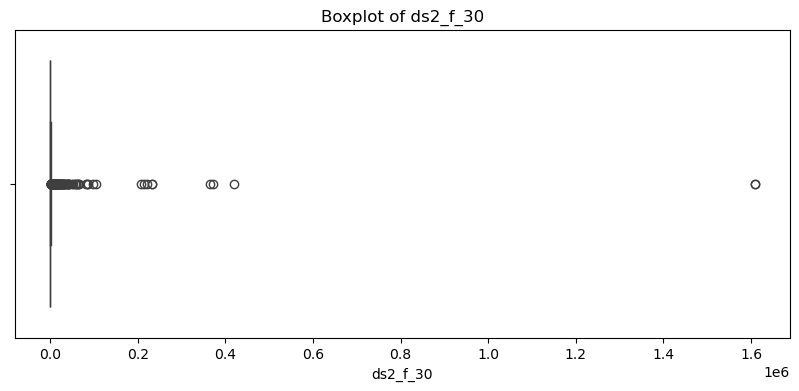


Outliers in ds2_f_30:
Number of outliers: 227
Outlier values:
[  27897.    3115.    3511.    3200.    2662.    9556.    6400.    5900.
    4000.    3601.    5000.    4184.    8783.    4635.    5607.   32729.
   22965.    5100.  420000.   21300.    2197.    5067.    5740.   27930.
    2940.    6000.   20000.    6461.    4076.    6300.    6900.    5470.
    4915.    2573.    7239.    5183.   15000.    4441.    2501.   36200.
   60000.    6787.  364900.    4700.    6152.    5710.   42216.   13222.
  208580.   16600.    5200.   12000.  372000.    9750.   15300.   23118.
    6917.    8600.    6166.   17399.   13320.    4013.    7400.   15000.
    9300.    2398.   40739.   15000.    2449.    6200.    6000.    2931.
    8000.    3100.    2700.    2750.   20000.    2709. 1608000.    7461.
   10202.    3327.    9000.   12900.    2040.   31686.   10200.   16000.
    6000.    6195.    4846.   10642.    8400.   21500.    7867.   13000.
    2230.    5000.   10440.   11400.    4776.   35000.    474

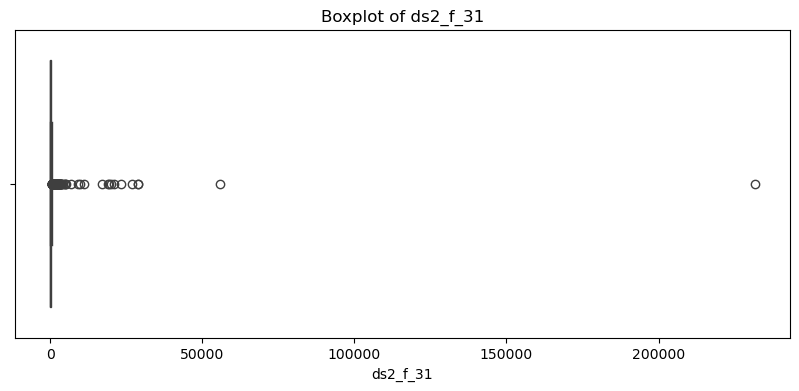


Outliers in ds2_f_31:
Number of outliers: 148
Outlier values:
[  1514.   2500.   1291.   3115.    630.   1200.    657.    700.    861.
   3601.    878.   3136.  18999.    700.  28985.    650.    621.   2500.
    646.    687.    848.   1312.    800.   1800.  23429.    900.    832.
    636.   2700.    956.   1670.   1115.   1364.   1600.   1001.   2234.
    935.    758.   1903.    700.    792.   3500.   1500.   2398.   1500.
   1248.   1500.   1521.   2000.    753.    689.    650.   1028.   1647.
   1438.   1000.    670.   1498.   9338.    615.   2669.    800.   2000.
    626.   1500.    770.    987.  27000.   4742.   2000.   1035.   2923.
    676.   1800.   2400.  20151.    729.   2691.    977.   1500.   1189.
   5205.   3900.   1613.    800.    741.   5000.   1114.   1800.   3700.
    980.  56000.   2000.   4389.   2489.   3244.    762.   2622.    998.
   1700.   3272.   1700.  19284.   1000.  17000.    900.    650.   1372.
    857.   1370.   1000.    658.   3273.  28853.   2500.   30

In [43]:
## Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Detect and visualize outliers for numeric columns
for column in df2.select_dtypes(include='number').columns:
    # Create boxplot
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df2, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()
    
    # Get outliers
    outliers = detect_outliers(df2, column)
    
    # Print outlier statistics
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Outlier values:\n{outliers.values}")
    print("-"*50)

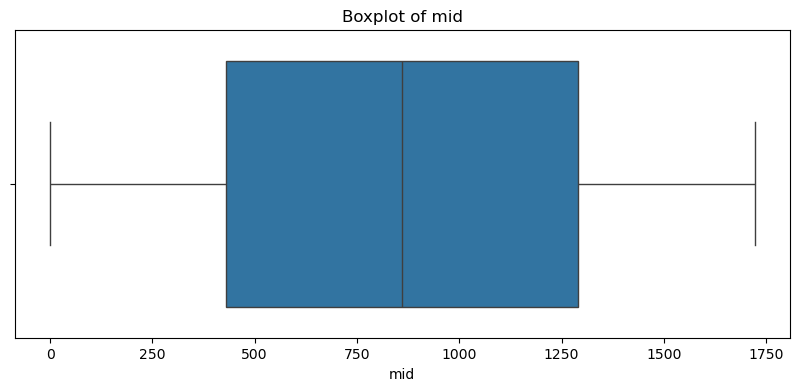


Outliers in mid:
Number of outliers: 0
--------------------------------------------------


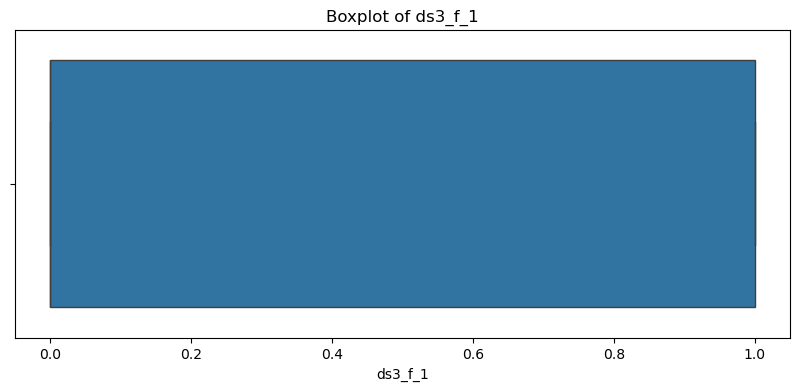


Outliers in ds3_f_1:
Number of outliers: 0
--------------------------------------------------


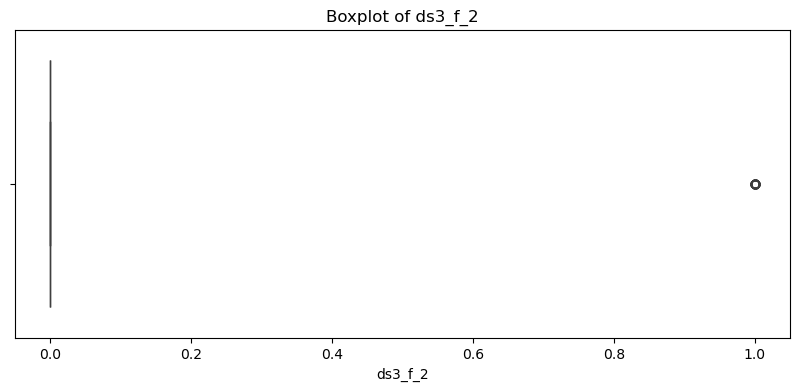


Outliers in ds3_f_2:
Number of outliers: 54
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


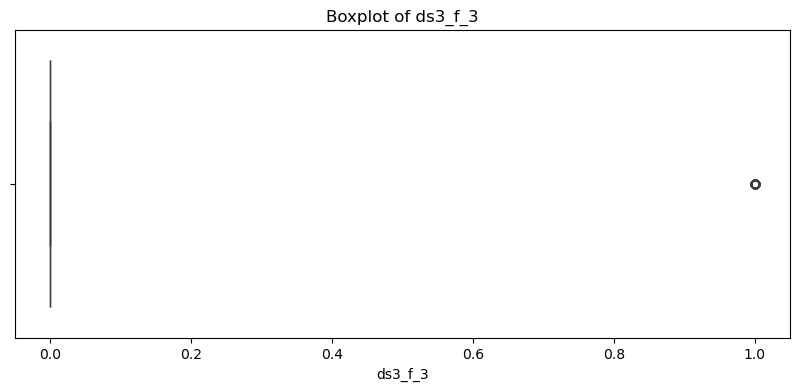


Outliers in ds3_f_3:
Number of outliers: 83
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


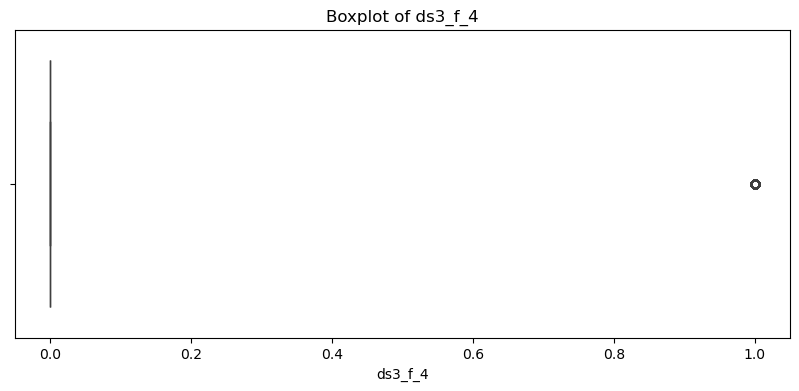


Outliers in ds3_f_4:
Number of outliers: 148
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
--------------------------------------------------


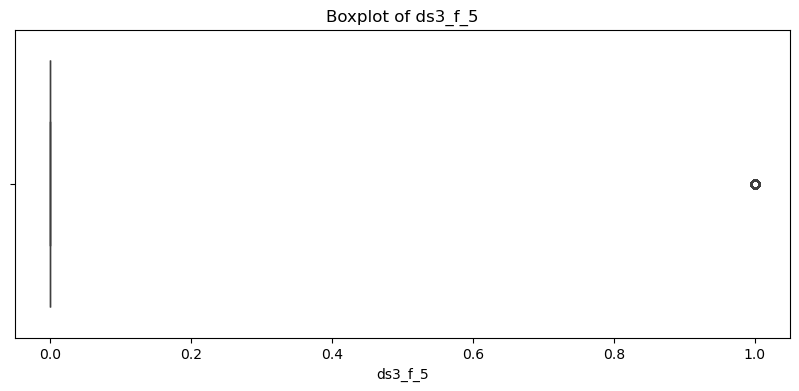


Outliers in ds3_f_5:
Number of outliers: 395
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

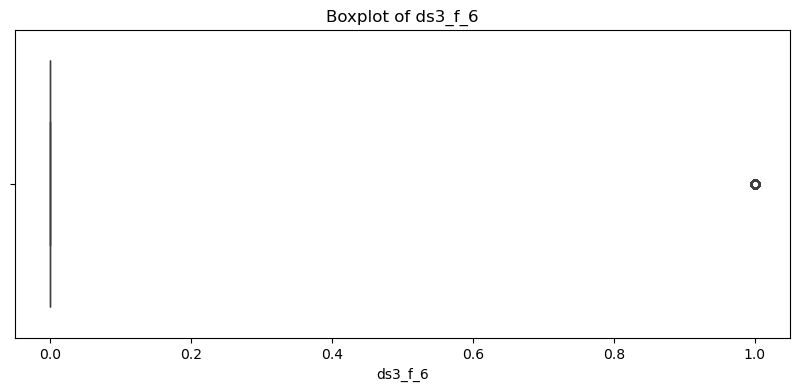


Outliers in ds3_f_6:
Number of outliers: 143
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


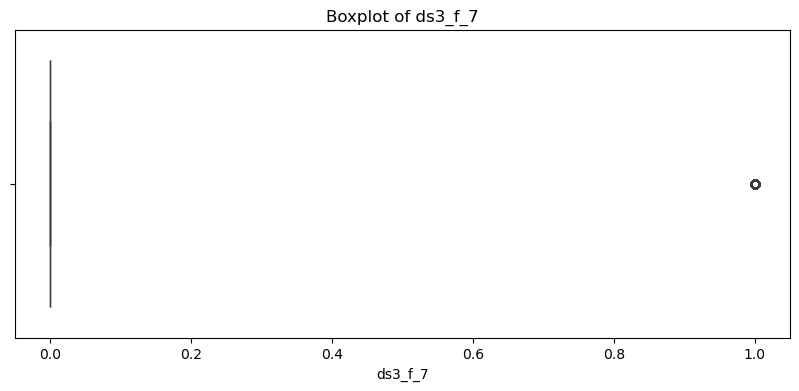


Outliers in ds3_f_7:
Number of outliers: 185
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


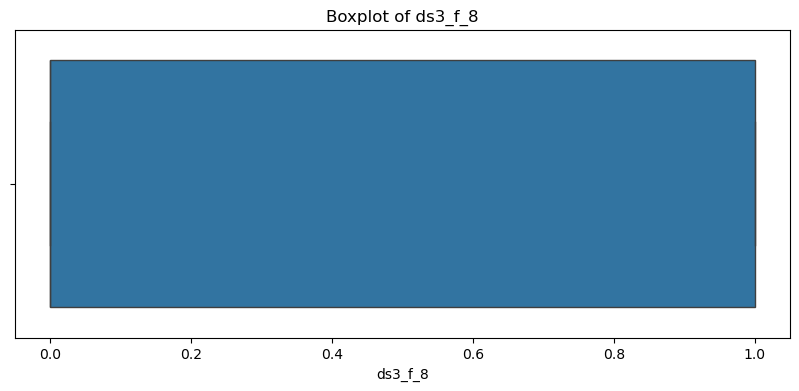


Outliers in ds3_f_8:
Number of outliers: 0
--------------------------------------------------


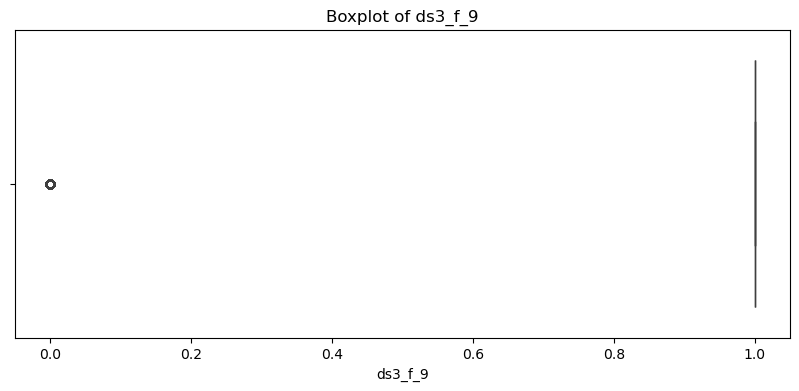


Outliers in ds3_f_9:
Number of outliers: 390
Outlier values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

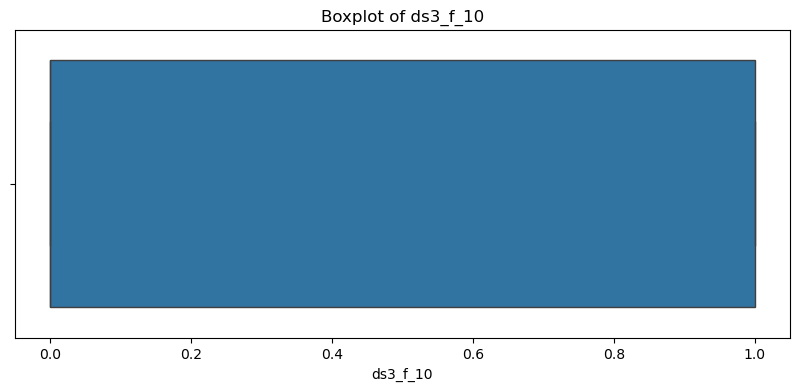


Outliers in ds3_f_10:
Number of outliers: 0
--------------------------------------------------


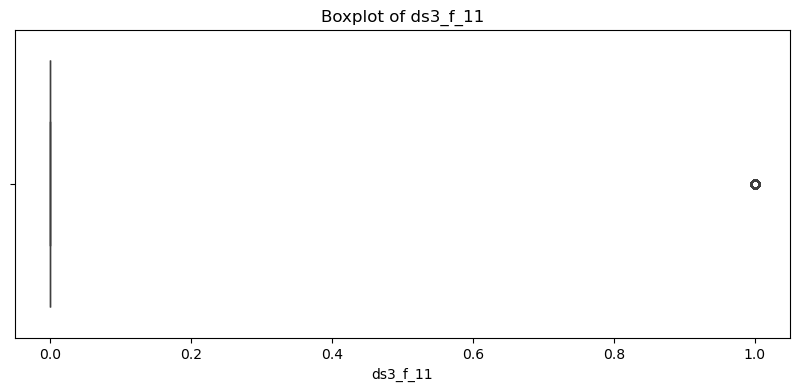


Outliers in ds3_f_11:
Number of outliers: 367
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

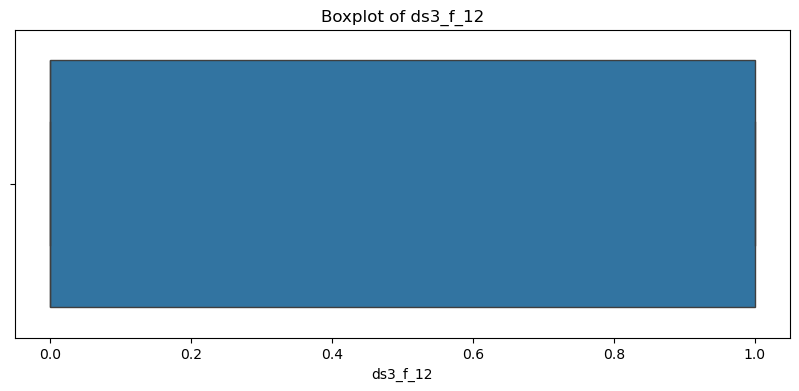


Outliers in ds3_f_12:
Number of outliers: 0
--------------------------------------------------


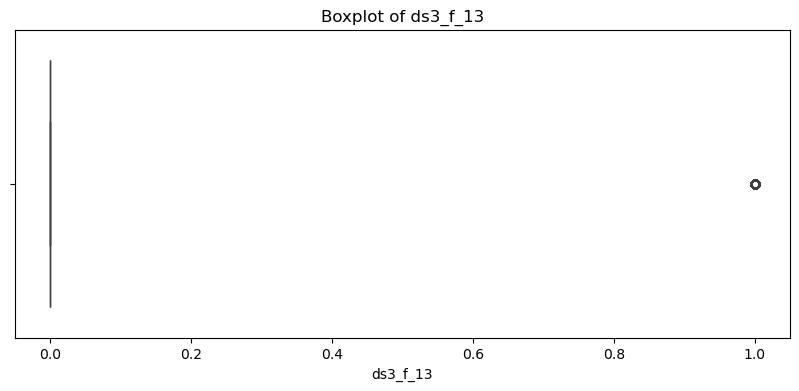


Outliers in ds3_f_13:
Number of outliers: 166
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


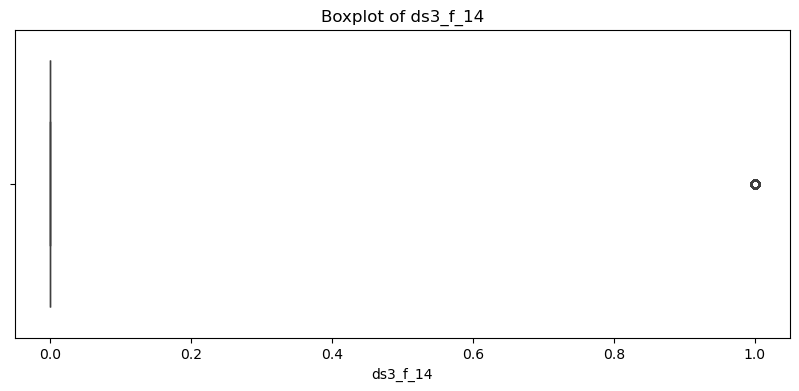


Outliers in ds3_f_14:
Number of outliers: 195
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
--------------------------------------------------


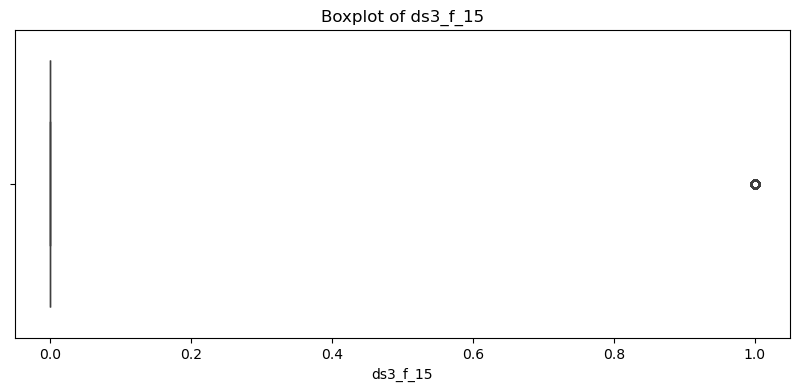


Outliers in ds3_f_15:
Number of outliers: 319
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

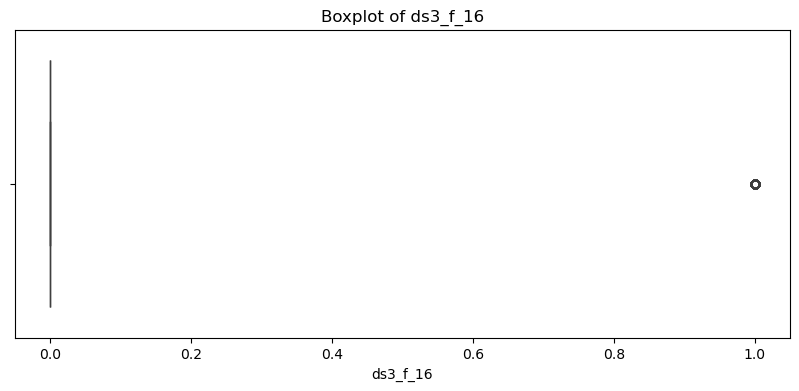


Outliers in ds3_f_16:
Number of outliers: 129
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


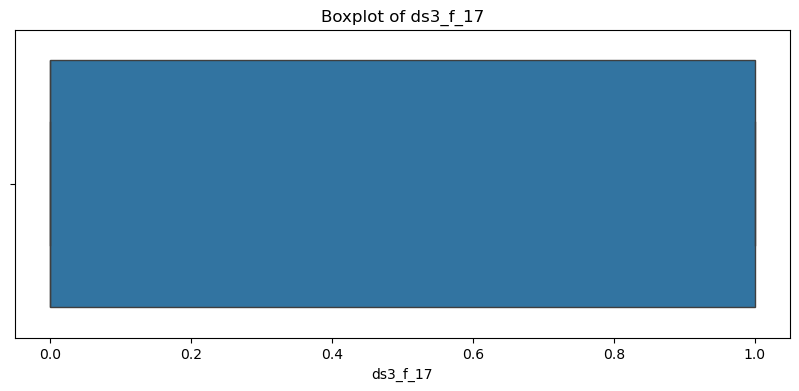


Outliers in ds3_f_17:
Number of outliers: 0
--------------------------------------------------


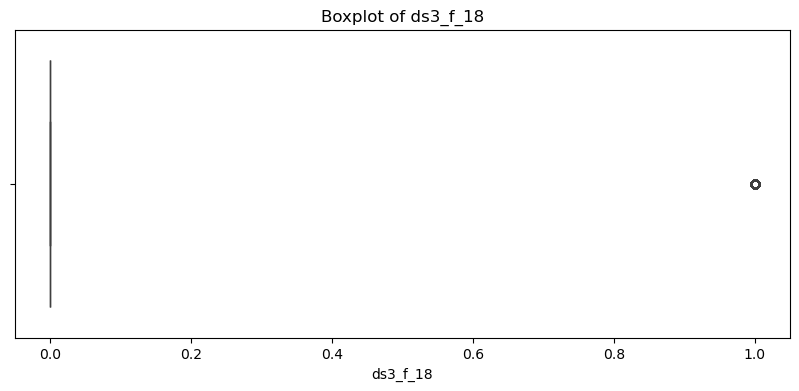


Outliers in ds3_f_18:
Number of outliers: 332
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

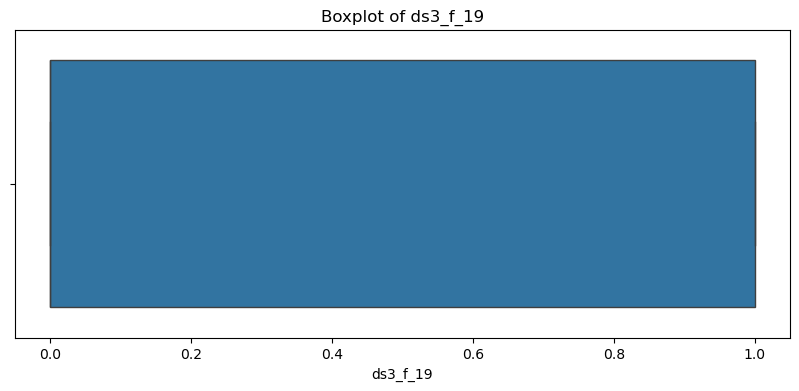


Outliers in ds3_f_19:
Number of outliers: 0
--------------------------------------------------


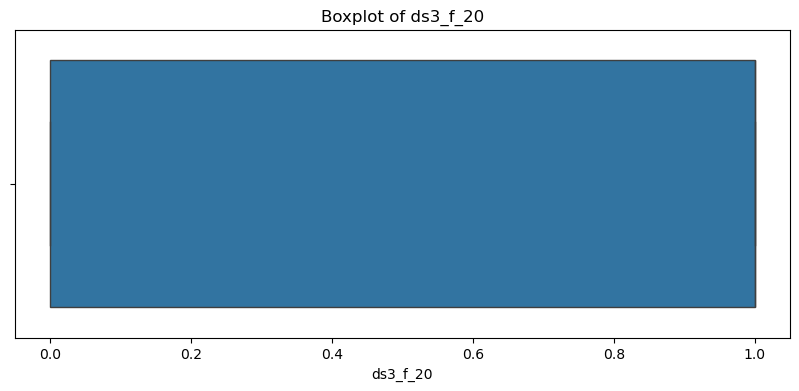


Outliers in ds3_f_20:
Number of outliers: 0
--------------------------------------------------


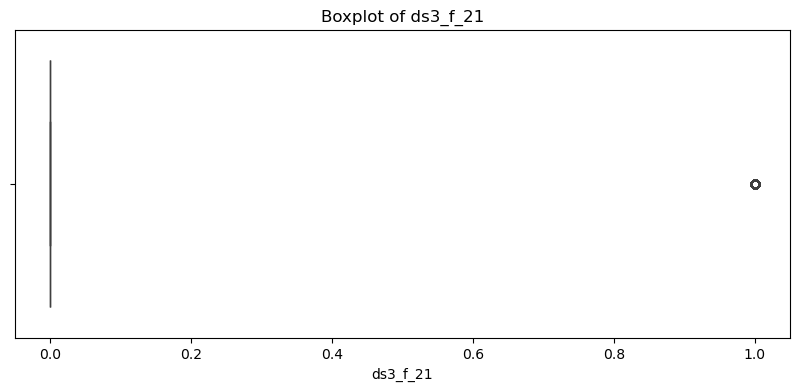


Outliers in ds3_f_21:
Number of outliers: 341
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

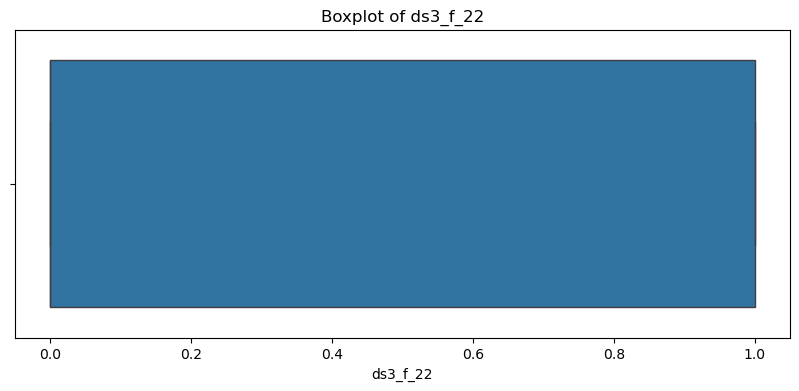


Outliers in ds3_f_22:
Number of outliers: 0
--------------------------------------------------


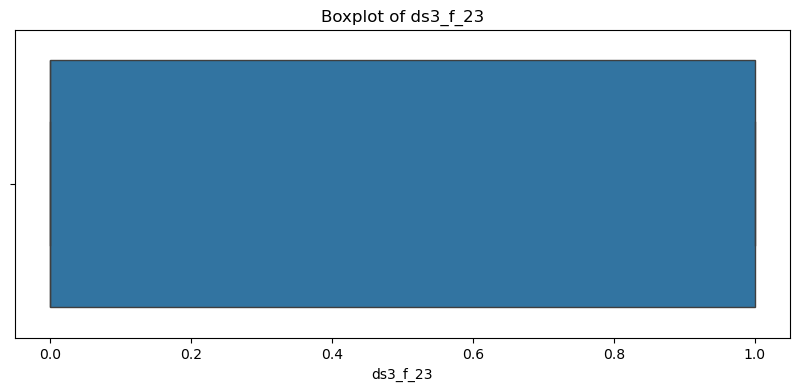


Outliers in ds3_f_23:
Number of outliers: 0
--------------------------------------------------


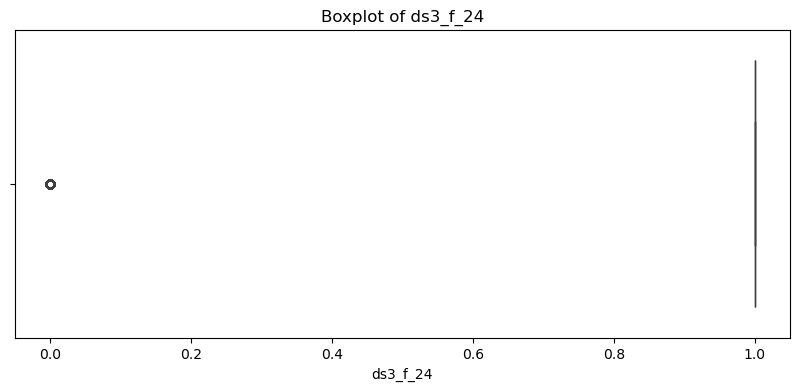


Outliers in ds3_f_24:
Number of outliers: 385
Outlier values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

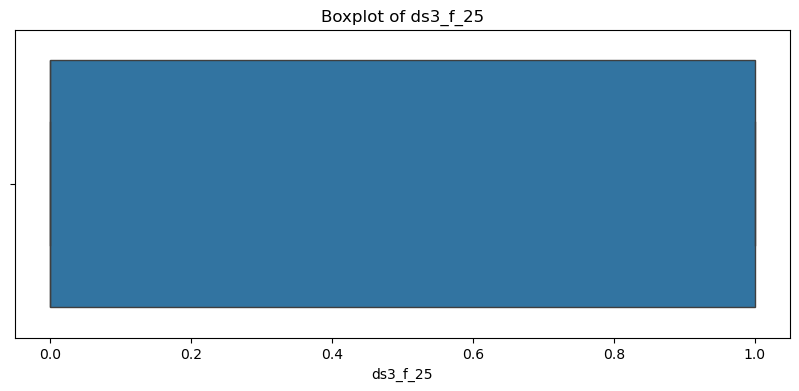


Outliers in ds3_f_25:
Number of outliers: 0
--------------------------------------------------


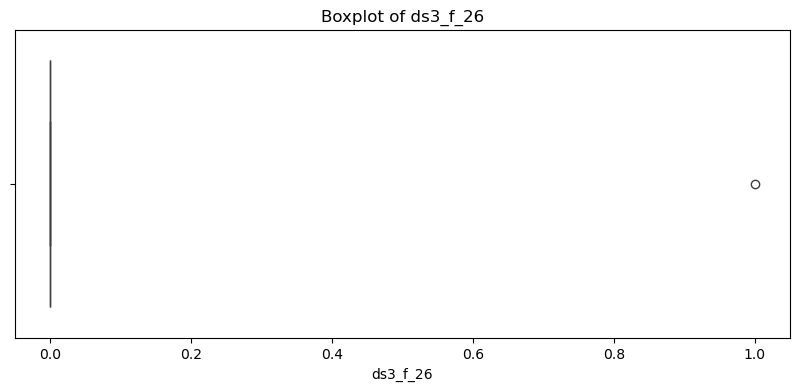


Outliers in ds3_f_26:
Number of outliers: 1
Outlier values:
[1.]
--------------------------------------------------


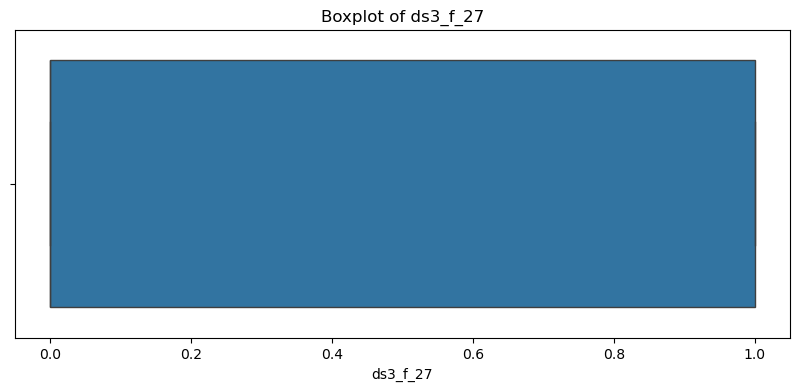


Outliers in ds3_f_27:
Number of outliers: 0
--------------------------------------------------


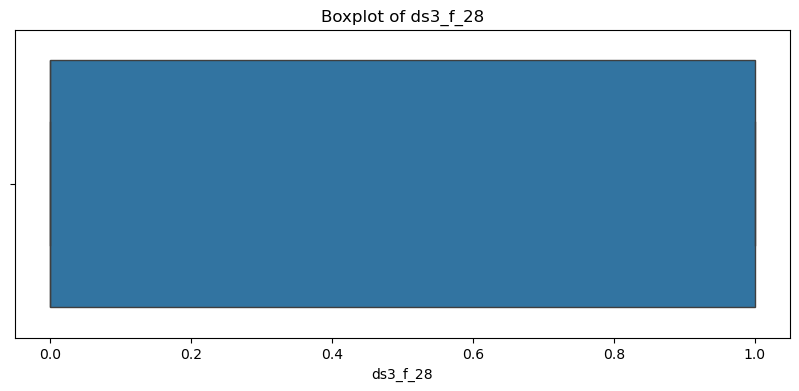


Outliers in ds3_f_28:
Number of outliers: 0
--------------------------------------------------


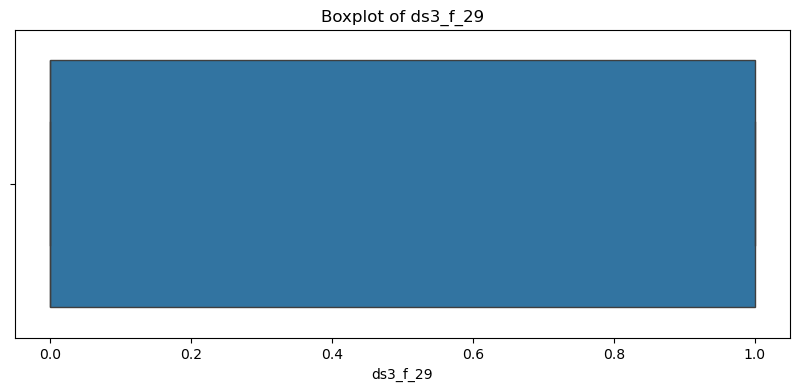


Outliers in ds3_f_29:
Number of outliers: 0
--------------------------------------------------


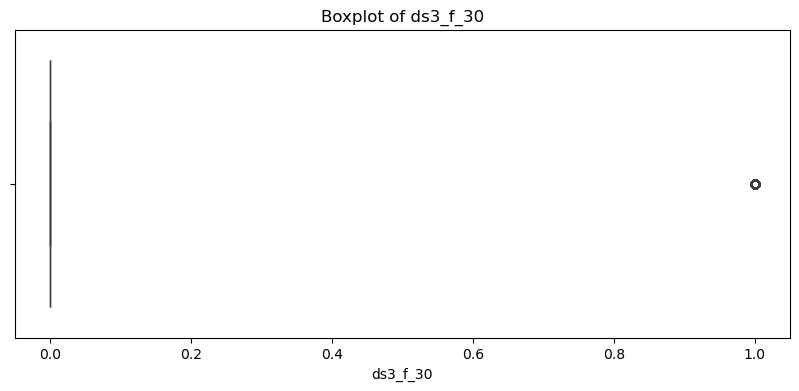


Outliers in ds3_f_30:
Number of outliers: 238
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


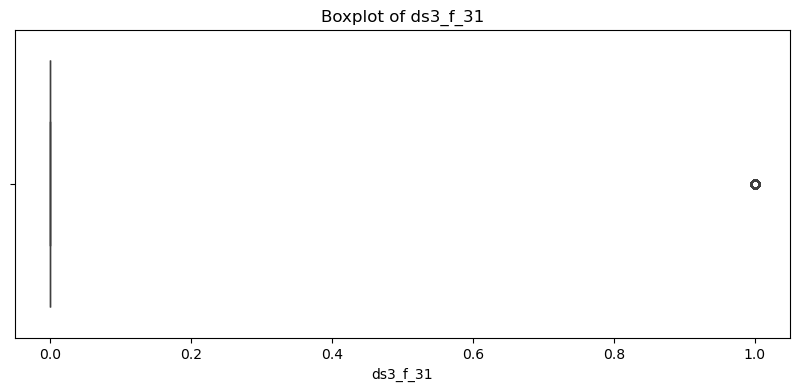


Outliers in ds3_f_31:
Number of outliers: 154
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


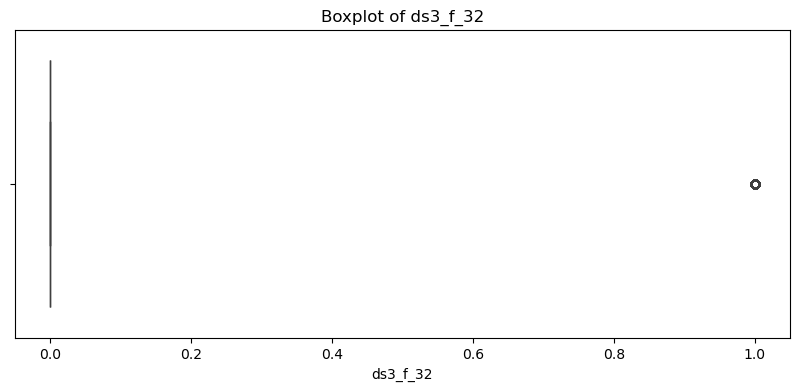


Outliers in ds3_f_32:
Number of outliers: 298
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-----------------------------

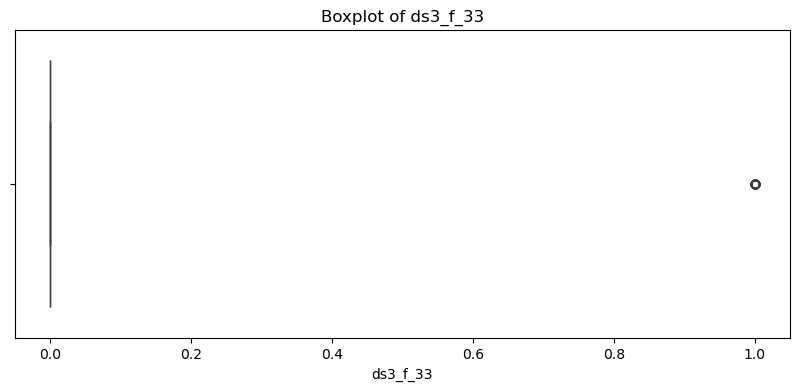


Outliers in ds3_f_33:
Number of outliers: 52
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
--------------------------------------------------


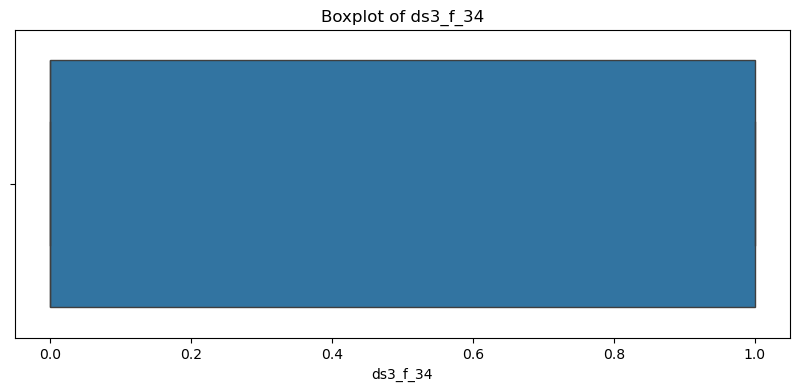


Outliers in ds3_f_34:
Number of outliers: 0
--------------------------------------------------


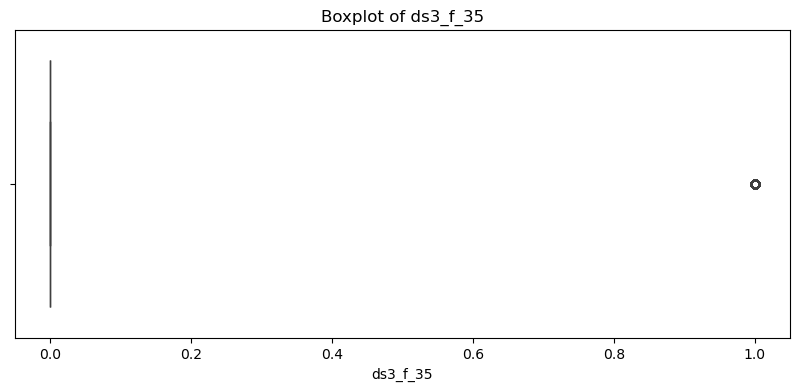


Outliers in ds3_f_35:
Number of outliers: 192
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


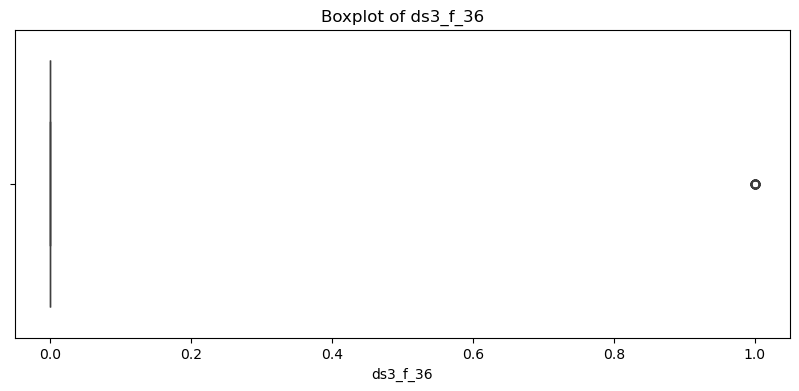


Outliers in ds3_f_36:
Number of outliers: 41
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


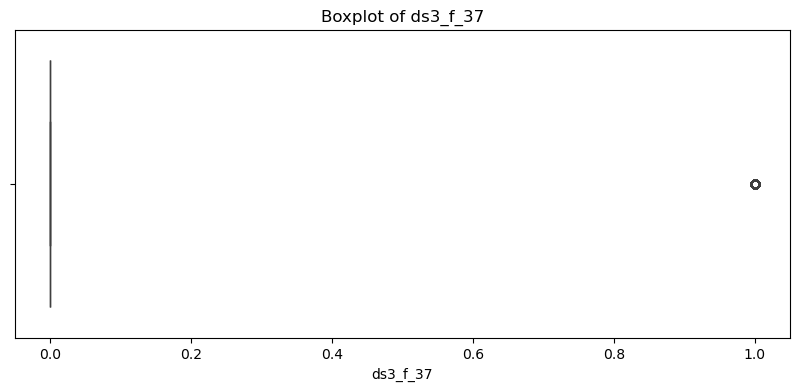


Outliers in ds3_f_37:
Number of outliers: 156
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


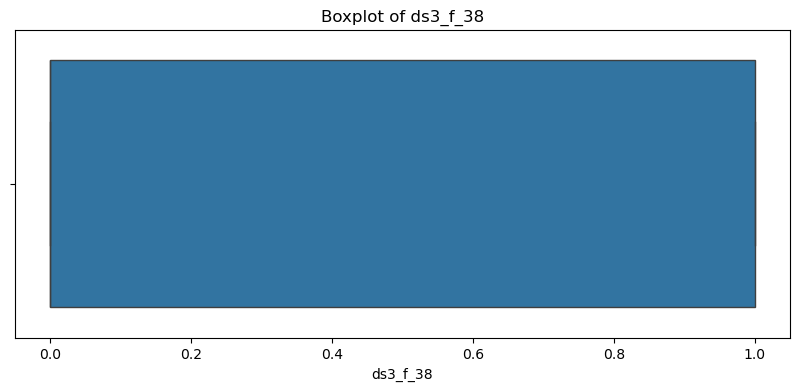


Outliers in ds3_f_38:
Number of outliers: 0
--------------------------------------------------


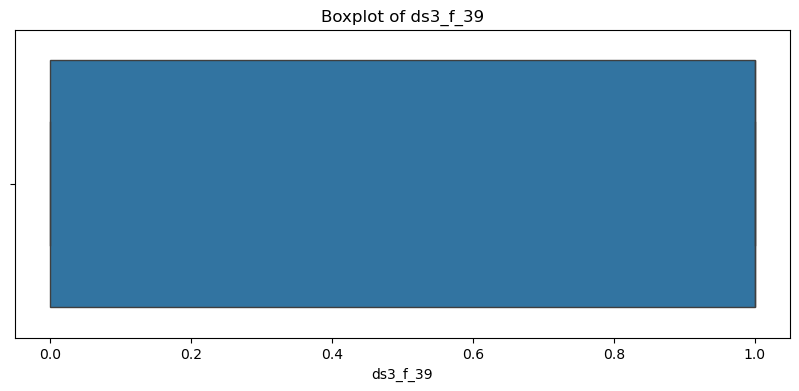


Outliers in ds3_f_39:
Number of outliers: 0
--------------------------------------------------


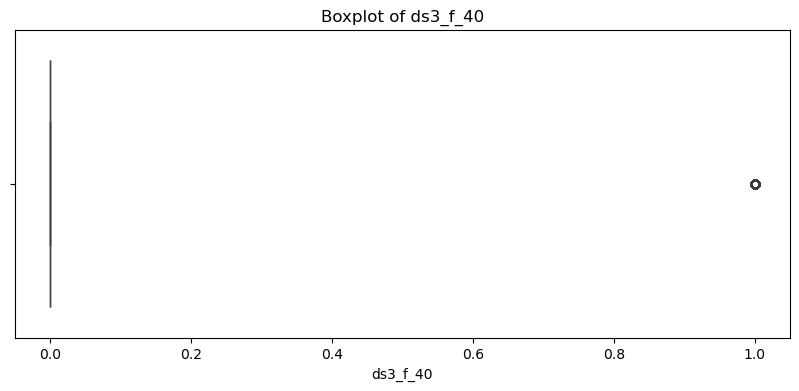


Outliers in ds3_f_40:
Number of outliers: 294
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
-----------------------------------------

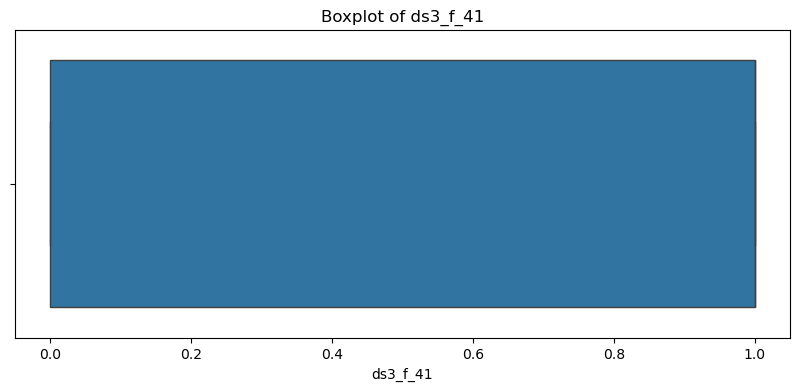


Outliers in ds3_f_41:
Number of outliers: 0
--------------------------------------------------


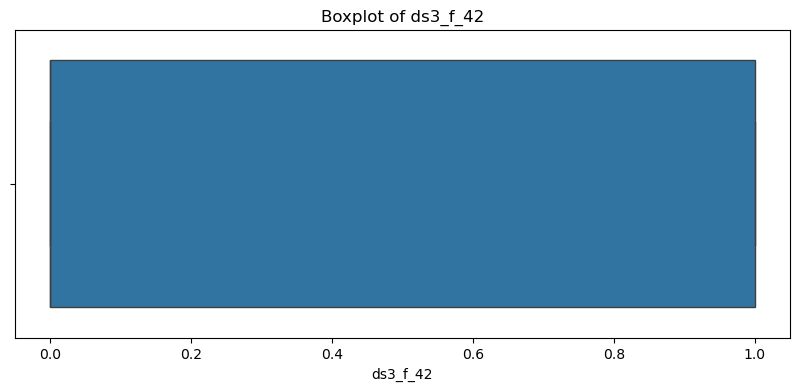


Outliers in ds3_f_42:
Number of outliers: 0
--------------------------------------------------


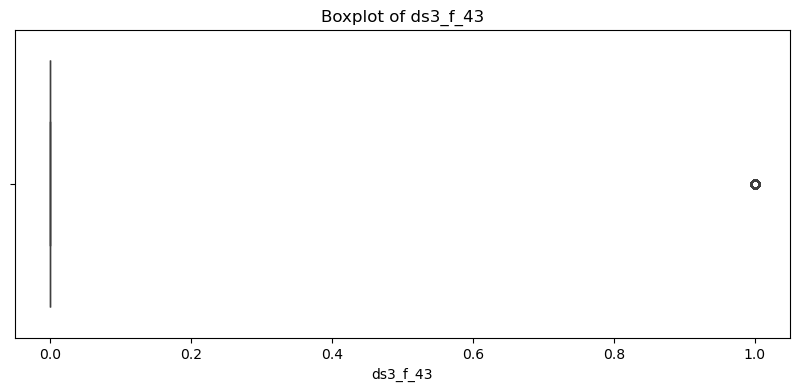


Outliers in ds3_f_43:
Number of outliers: 299
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------

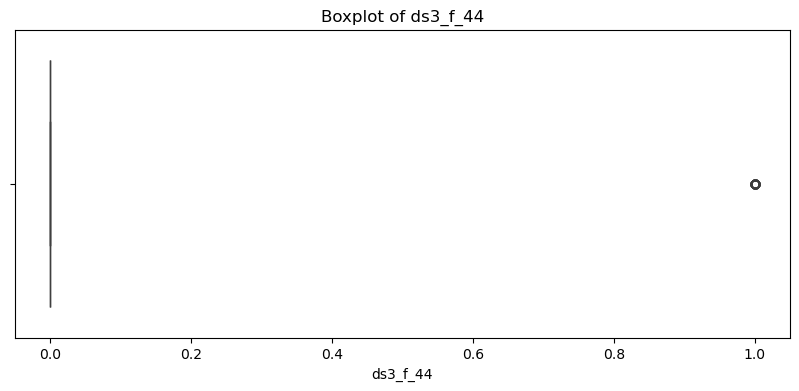


Outliers in ds3_f_44:
Number of outliers: 89
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


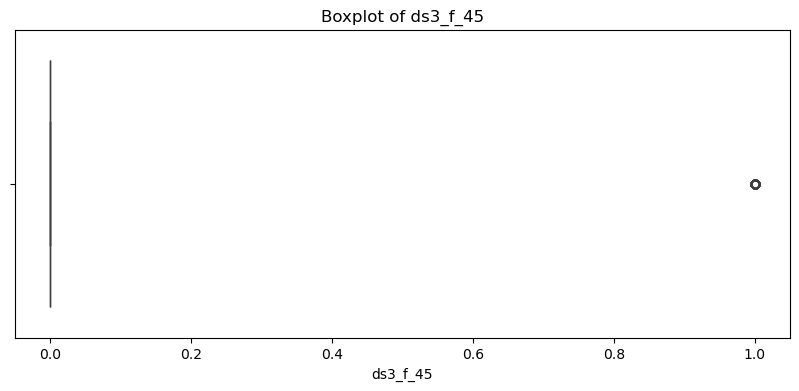


Outliers in ds3_f_45:
Number of outliers: 115
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


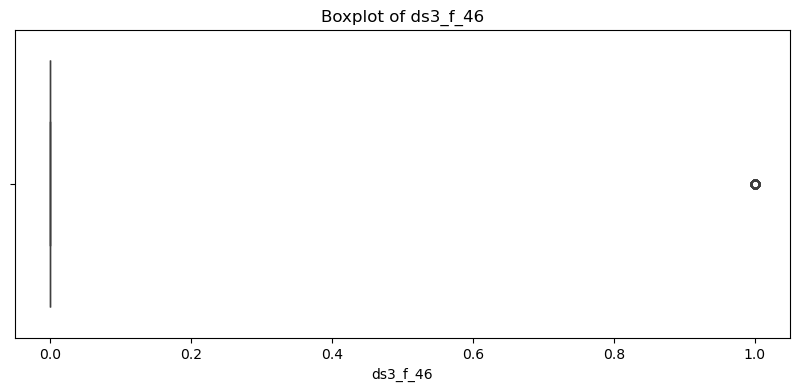


Outliers in ds3_f_46:
Number of outliers: 119
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


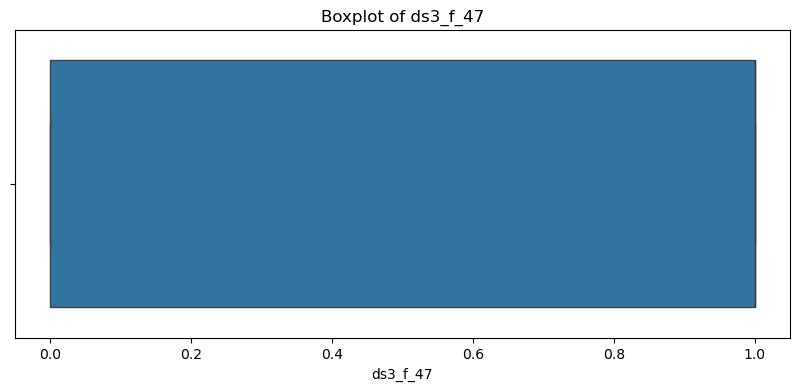


Outliers in ds3_f_47:
Number of outliers: 0
--------------------------------------------------


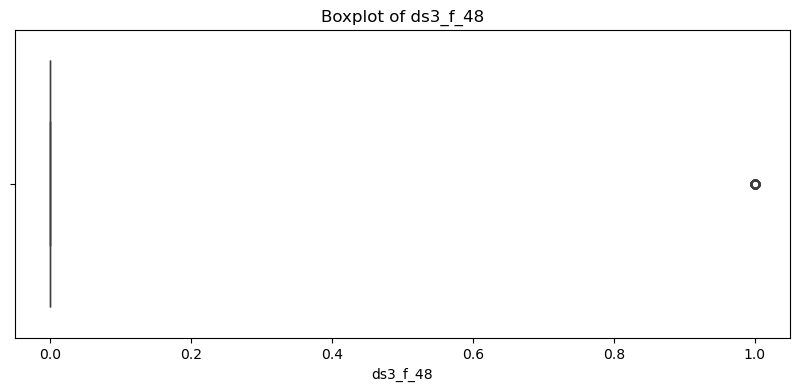


Outliers in ds3_f_48:
Number of outliers: 102
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


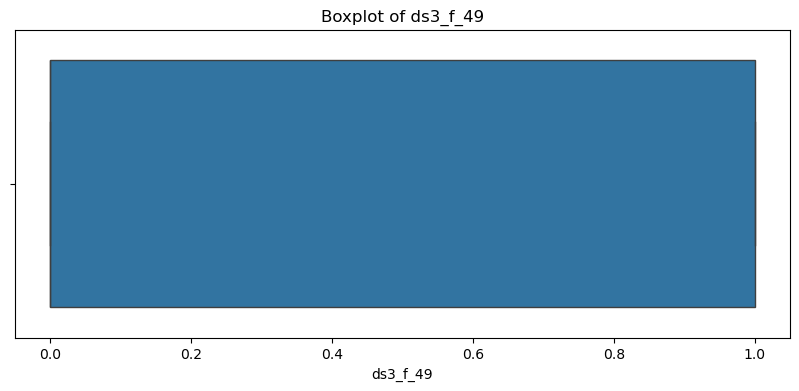


Outliers in ds3_f_49:
Number of outliers: 0
--------------------------------------------------


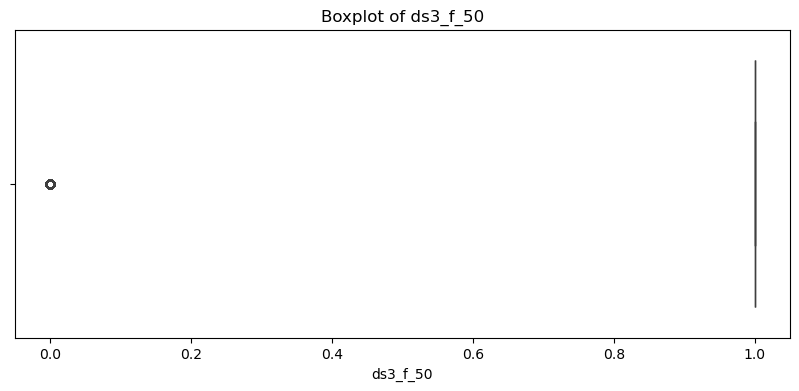


Outliers in ds3_f_50:
Number of outliers: 421
Outlier values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

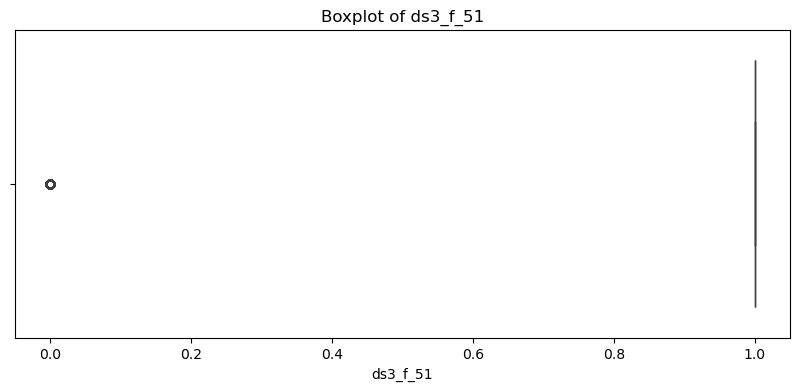


Outliers in ds3_f_51:
Number of outliers: 269
Outlier values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
--------------------------------------------------


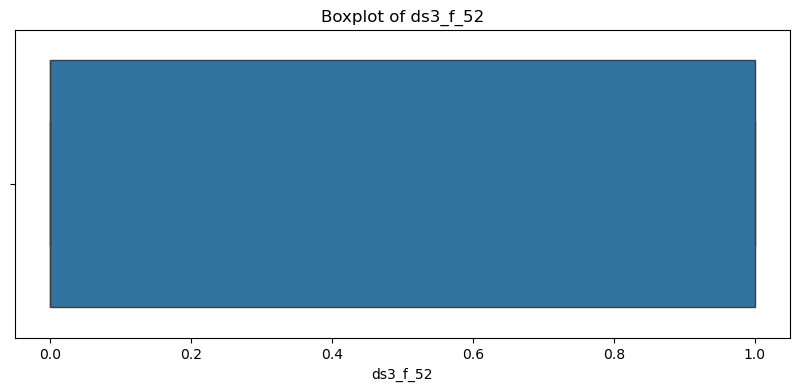


Outliers in ds3_f_52:
Number of outliers: 0
--------------------------------------------------


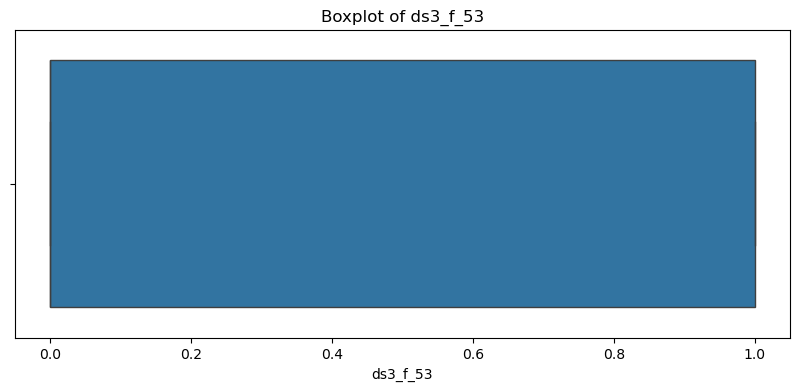


Outliers in ds3_f_53:
Number of outliers: 0
--------------------------------------------------


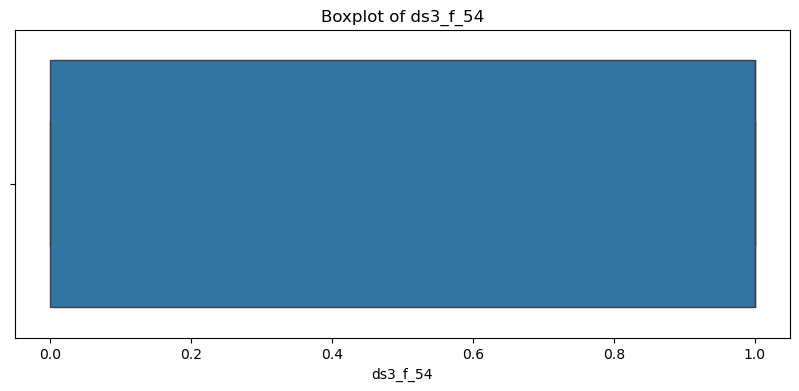


Outliers in ds3_f_54:
Number of outliers: 0
--------------------------------------------------


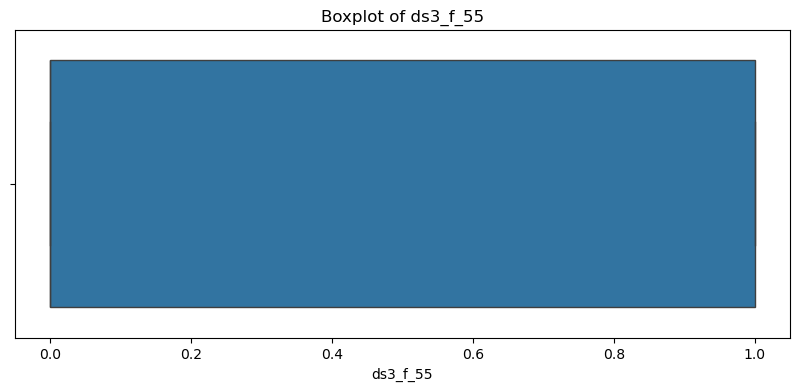


Outliers in ds3_f_55:
Number of outliers: 0
--------------------------------------------------


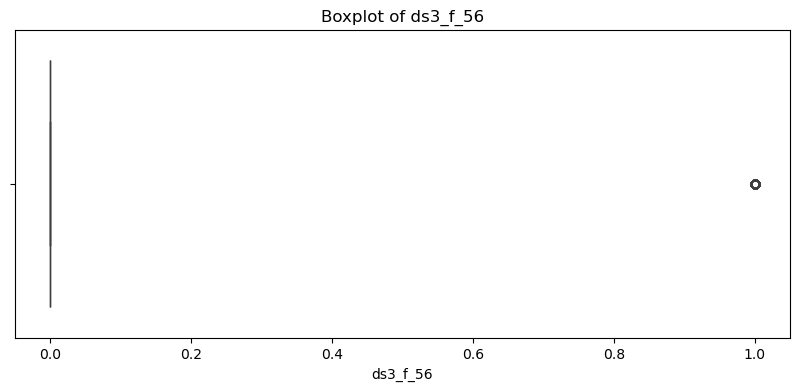


Outliers in ds3_f_56:
Number of outliers: 126
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


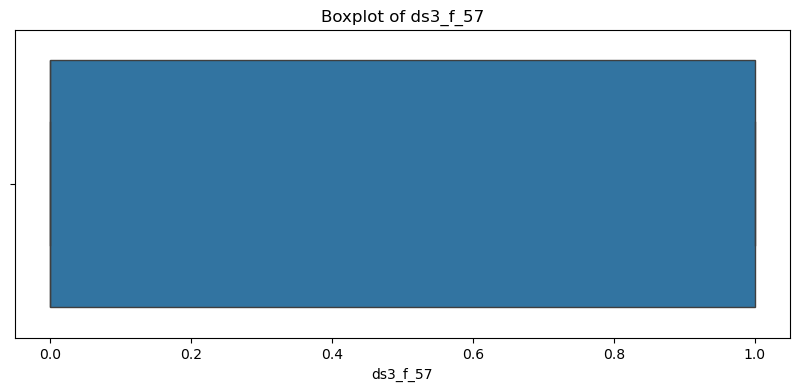


Outliers in ds3_f_57:
Number of outliers: 0
--------------------------------------------------


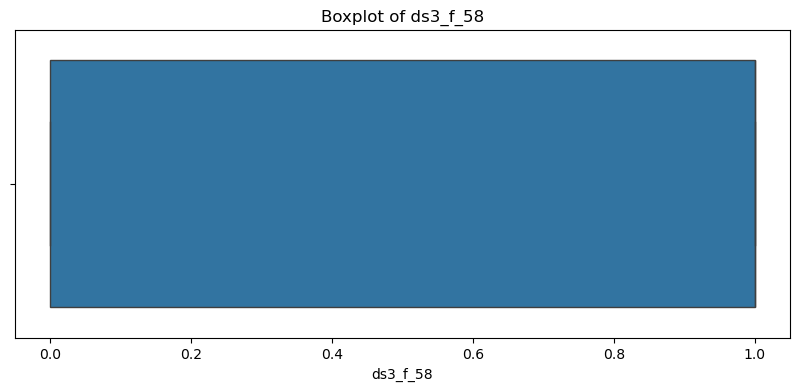


Outliers in ds3_f_58:
Number of outliers: 0
--------------------------------------------------


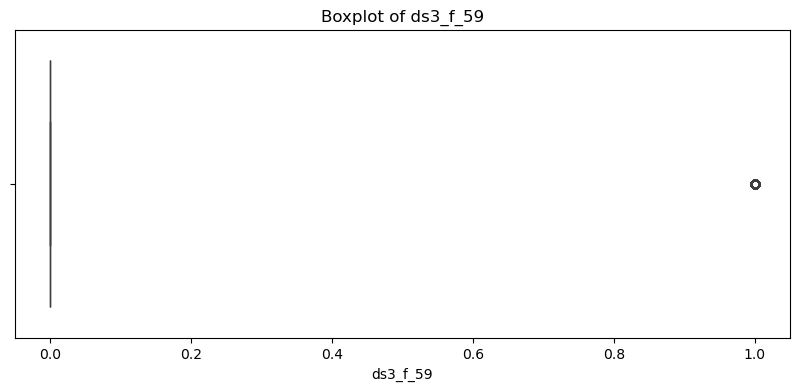


Outliers in ds3_f_59:
Number of outliers: 161
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


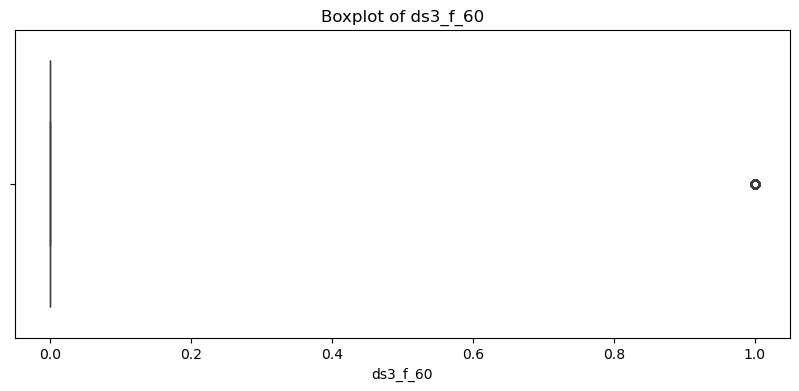


Outliers in ds3_f_60:
Number of outliers: 290
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
--------------------------------------------------


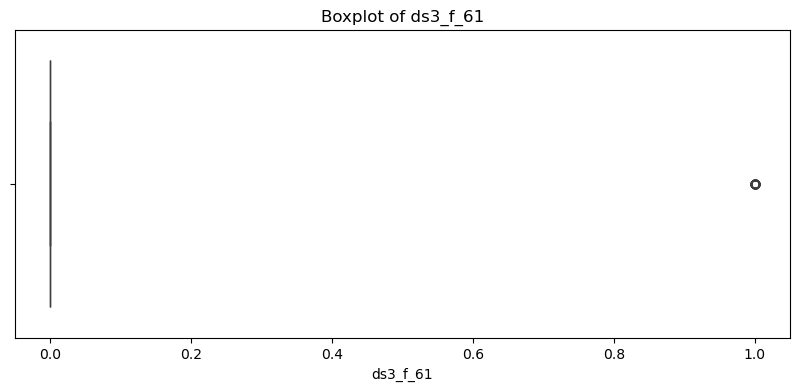


Outliers in ds3_f_61:
Number of outliers: 52
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
--------------------------------------------------


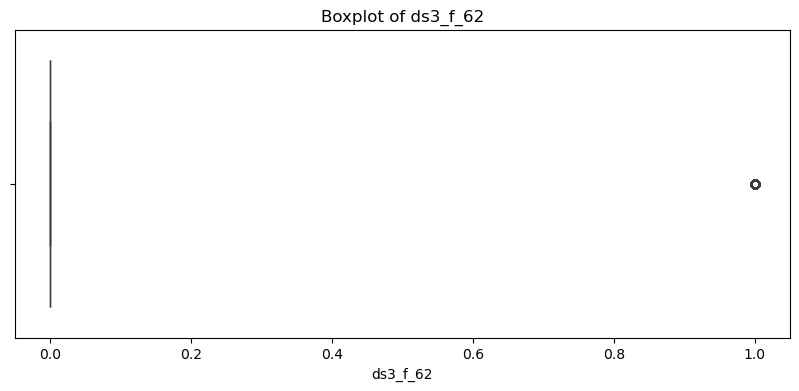


Outliers in ds3_f_62:
Number of outliers: 344
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

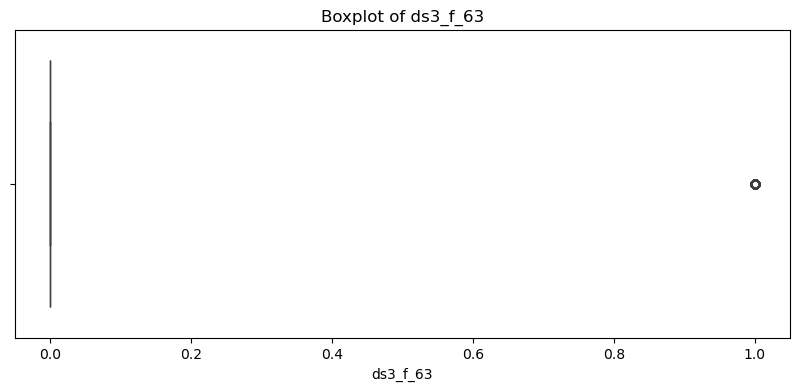


Outliers in ds3_f_63:
Number of outliers: 159
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


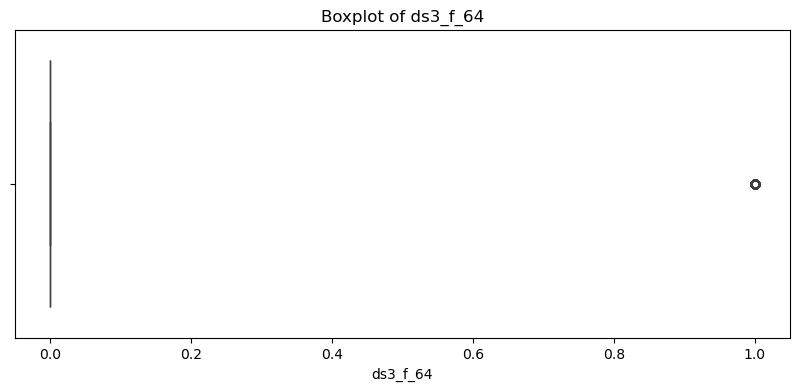


Outliers in ds3_f_64:
Number of outliers: 369
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

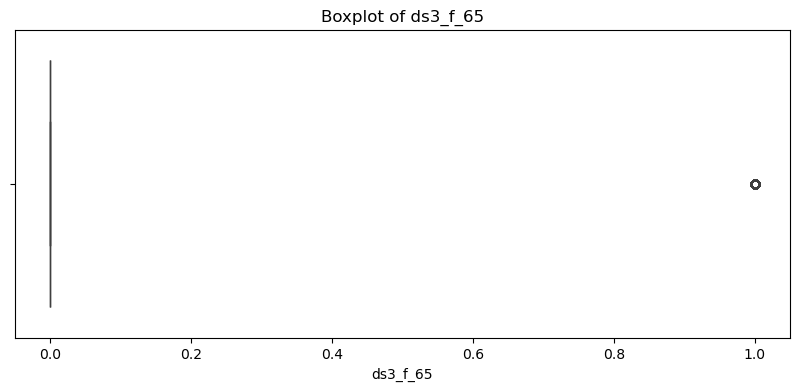


Outliers in ds3_f_65:
Number of outliers: 285
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


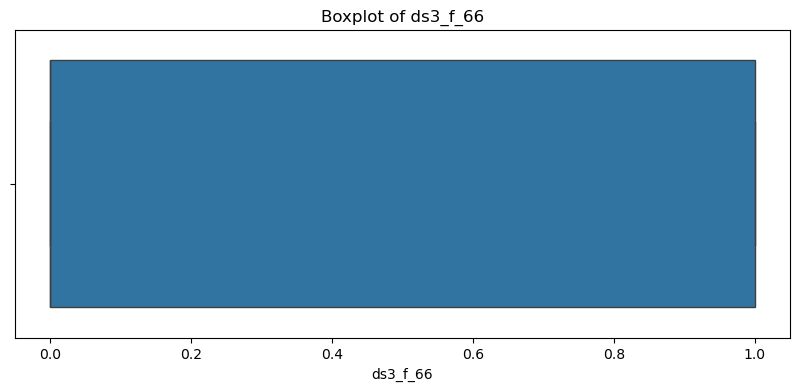


Outliers in ds3_f_66:
Number of outliers: 0
--------------------------------------------------


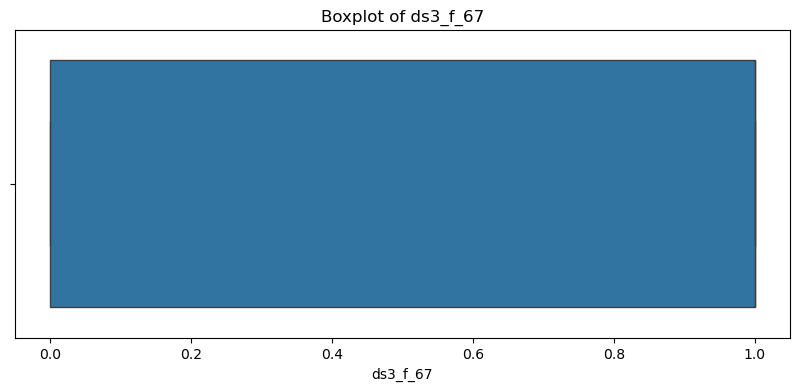


Outliers in ds3_f_67:
Number of outliers: 0
--------------------------------------------------


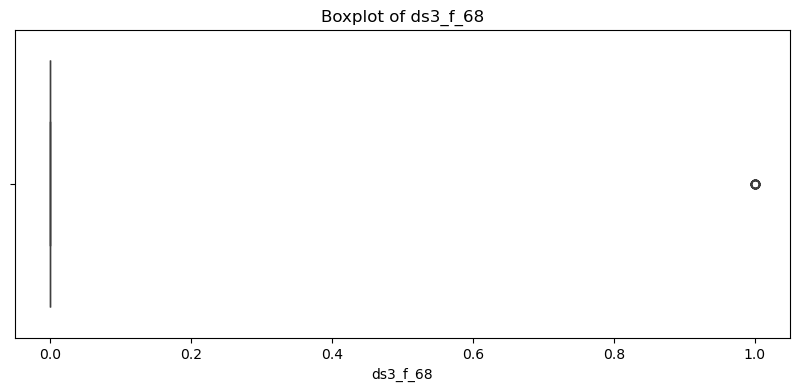


Outliers in ds3_f_68:
Number of outliers: 29
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
--------------------------------------------------


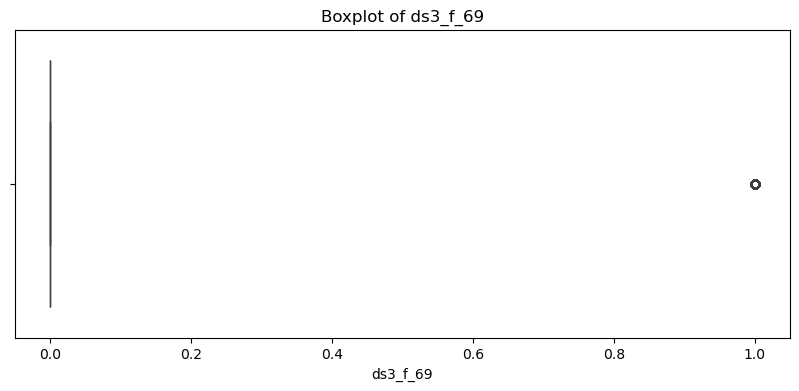


Outliers in ds3_f_69:
Number of outliers: 351
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

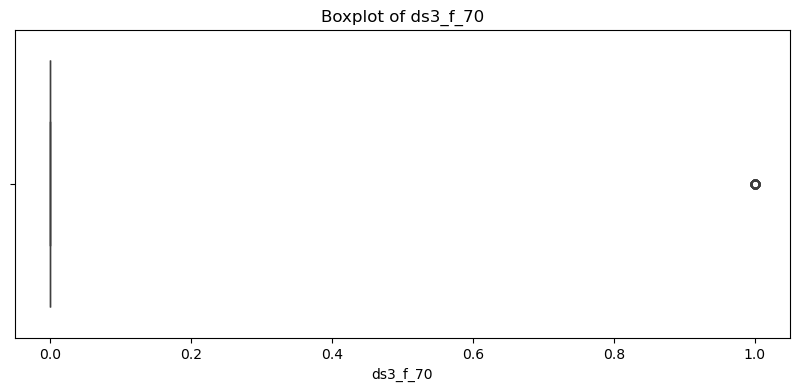


Outliers in ds3_f_70:
Number of outliers: 99
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
--------------------------------------------------


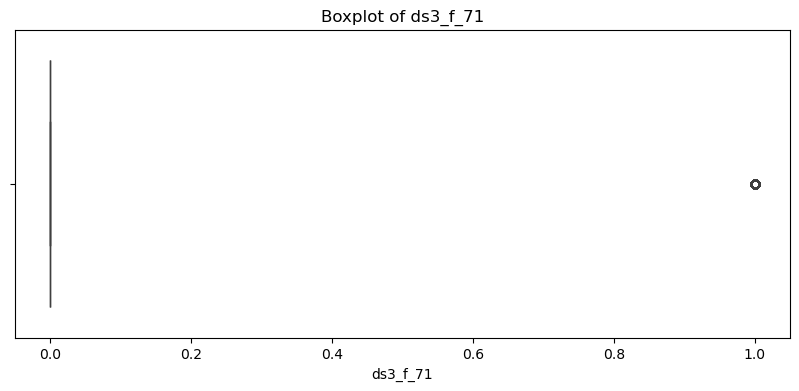


Outliers in ds3_f_71:
Number of outliers: 175
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


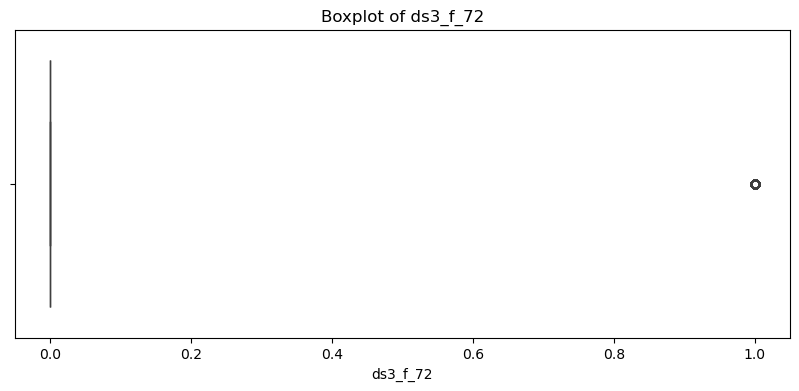


Outliers in ds3_f_72:
Number of outliers: 136
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


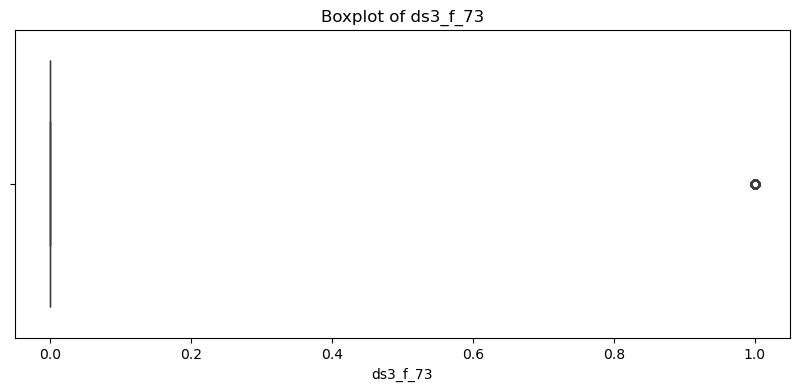


Outliers in ds3_f_73:
Number of outliers: 290
Outlier values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
--------------------------------------------------


In [44]:
## Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Detect and visualize outliers for numeric columns
for column in df3.select_dtypes(include='number').columns:
    # Create boxplot
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df3, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()
    
    # Get outliers
    outliers = detect_outliers(df3, column)
    
    # Print outlier statistics
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"""Outlier values:\n{outliers.values}""")
    print("-"*50)

## Analyzing data source 1 (For categorical analysis)

In [45]:
# List of columns to analyze
columns_to_analyze_df1 = ['ds1_f_10', 'ds1_f_38', 'ds1_f_41']

# Print column names
print(df1.columns)
print('**' * 50)

# Loop through each column, checking if it exists before printing value counts
for column in columns_to_analyze_df1:
    if column in df1.columns:
        value_counts = df1[column].value_counts().to_frame()
        print(f"Value counts for {column}:\n{value_counts.to_string()}")
    else:
        print(f"Warning: Column '{column}' does not exist in the DataFrame.")
    print('**' * 50)


Index(['mid', 'ds1_f_1', 'ds1_f_2', 'ds1_f_3', 'ds1_f_4', 'ds1_f_5', 'ds1_f_6',
       'ds1_f_7', 'ds1_f_8', 'ds1_f_9', 'ds1_f_10', 'ds1_f_11', 'ds1_f_12',
       'ds1_f_13', 'ds1_f_14', 'ds1_f_15', 'ds1_f_16', 'ds1_f_17', 'ds1_f_18',
       'ds1_f_19', 'ds1_f_20', 'ds1_f_21', 'ds1_f_22', 'ds1_f_23', 'ds1_f_24',
       'ds1_f_25', 'ds1_f_26', 'ds1_f_27', 'ds1_f_28', 'ds1_f_29', 'ds1_f_30',
       'ds1_f_31', 'ds1_f_32', 'ds1_f_33', 'ds1_f_34', 'ds1_f_35', 'ds1_f_36',
       'ds1_f_37', 'ds1_f_38', 'ds1_f_39', 'ds1_f_40', 'ds1_f_41'],
      dtype='object')
****************************************************************************************************
Value counts for ds1_f_10:
                                                                             count
ds1_f_10                                                                          
Lifestyle/Fashion_and_Apparel                                                  103
Computers_Electronics_and_Technology/Programming_and_Develope

### Reason to choose LightGBM :
LightGBM is a gradient boosting framework that uses tree based learning algorithm. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel and GPU learning.
- Capable of handling large-scale data.

Considering outliers and distributions, LightGBM is less sensitive to outliers and distributions. It splits data based on feature thresholds, which makes it capable of effectively ignoring outliers.

In [46]:
!python -m pip install lightgbm

Label Encoding the important columns

In [47]:
from sklearn.preprocessing import LabelEncoder

for col in ['ds1_f_10', 'ds1_f_38', 'ds1_f_41']:
    df1[col] = LabelEncoder().fit_transform(df1[col])

print(df1.head(10))


   mid       ds1_f_1       ds1_f_2        ds1_f_3   ds1_f_4   ds1_f_5  \
0    0  6.165387e+04  2.313614e+04   17558.804329  0.542466  2.565388   
1    1  1.072220e+06  3.649478e+05  186277.555456  0.467809  3.380499   
2    2  4.826617e+05  1.994125e+05   46771.452836  0.394757  4.393336   
3    3  1.021842e+06  4.044056e+05   79996.354324  0.410477  5.195879   
4    4  2.089518e+05  4.958270e+04   56116.938579  0.434635  4.152852   
5    5  8.956774e+05  3.960431e+05  108004.109855  0.472470  3.157994   
6    6  2.858161e+05  7.244032e+04   71064.770244  0.489638  2.479316   
7    7  4.443526e+06  2.231618e+06  852015.033051  0.723105  1.776107   
8    8  1.497954e+06  7.658491e+05  393914.923441  0.553090  4.773854   
9    9  1.194466e+05  5.633762e+04   21364.495511  0.779103  1.463421   

      ds1_f_6   ds1_f_7   ds1_f_8   ds1_f_9  ...  ds1_f_32  ds1_f_33  \
0  100.323540  0.431474  0.568526  517343.0  ...  0.622933  0.117396   
1  202.444909  0.337934  0.662066   46610.0  ...  0.

## Analyzing Data Source 2

In [48]:
df2 = pd.read_parquet("./data/data_source_2.parquet")
# List of columns to analyze
columns_to_analyze = [
    'ds2_f_1', 'ds2_f_4', 'ds2_f_5', 'ds2_f_7', 'ds2_f_8', 'ds2_f_9', 'ds2_f_10', 'ds2_f_27', 'ds2_f_29', 'ds2_f_32'
]

# Print column names
print(df2.columns)
print('**' * 50)

# Loop through each column and print the value counts
for column in columns_to_analyze:
    value_counts = df2[column].value_counts().to_frame()
    print(value_counts.to_string())
    print('**' * 50)


Index(['mid', 'ds2_f_1', 'ds2_f_2', 'ds2_f_3', 'ds2_f_4', 'ds2_f_5', 'ds2_f_6',
       'ds2_f_7', 'ds2_f_8', 'ds2_f_9', 'ds2_f_10', 'ds2_f_11', 'ds2_f_12',
       'ds2_f_13', 'ds2_f_14', 'ds2_f_15', 'ds2_f_16', 'ds2_f_17', 'ds2_f_18',
       'ds2_f_19', 'ds2_f_20', 'ds2_f_21', 'ds2_f_22', 'ds2_f_23', 'ds2_f_24',
       'ds2_f_25', 'ds2_f_26', 'ds2_f_27', 'ds2_f_28', 'ds2_f_29', 'ds2_f_30',
       'ds2_f_31', 'ds2_f_32'],
      dtype='object')
****************************************************************************************************
                      count
ds2_f_1                    
united states           955
united kingdom          212
australia               119
germany                  78
netherlands              55
canada                   46
sweden                   41
norway                   20
spain                    16
japan                    15
france                   12
denmark                  11
switzerland              10
italy                     9
irel

In [49]:
# Function to apply both label and frequency encoding
def encode_categorical_features(df, cols):
    encoded_df = df.copy()
    
    # Apply both label and frequency encoding
    for col in cols:
        # Label encoding
        le = LabelEncoder()
        encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
        
        # Frequency encoding
        freq = encoded_df[col].value_counts()
        encoded_df[f'{col}_freq'] = encoded_df[col].map(freq)
    
    return encoded_df

# Categorical columns to encode
categorical_cols = ['ds2_f_1', 'ds2_f_4', 'ds2_f_5', 'ds2_f_7', 'ds2_f_8', 'ds2_f_27', 'ds2_f_29', 
                   'ds2_f_9', 'ds2_f_10', 'ds2_f_32']

# Apply encodings
df2 = encode_categorical_features(df2, categorical_cols)

# Display first 5 rows of encoded dataframe
df2.head(5)

mid  ds2_f_1      ds2_f_2  ds2_f_3  ds2_f_4  ds2_f_5 ds2_f_6  ds2_f_7  \
0    0       52     762513.0   1238.0        2        3      34        8   
1    1       52  206135279.0  44500.0        0        1   44500       15   
2    2       51  213905112.0   1125.0        2        1    1125        8   
3    3        2  742495085.0   1000.0        2        3    1000        8   
4    4       51    5500000.0    290.0        2        3     290       11   

   ds2_f_8  ds2_f_9  ...  ds2_f_1_freq ds2_f_4_freq ds2_f_5_freq ds2_f_7_freq  \
0        4        0  ...           955         1015          480          411   
1       15       18  ...           955          613         1034           63   
2        0        2  ...           212         1015         1034          411   
3        0       37  ...           119         1015          480          411   
4       21        0  ...           212         1015          480          250   

   ds2_f_8_freq  ds2_f_27_freq  ds2_f_29_freq  ds2_f_9_freq  ds2_f_10_freq  \
0             8            137            233           703           1519   
1            18            141            478            27           1519   
2          1232            165            179            62             75   
3          1232            313            179           239             54   
4            88             81            478           703           1519   

   ds2_f_32_freq  
0           1014  
1           1014  
2            547  
3            161  
4           1014  

[5 rows x 43 columns]

## Train test Split (80/20)

In [6]:
# Load train and test parquet files
df_train = pd.read_parquet('./data/train_ids.parquet')
df_test = pd.read_parquet('./data/test_ids.parquet')

In [100]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

df1 = df1.iloc[:1683]
df2 = df2.iloc[:1683]
df3 = df3.iloc[:1683]
df_train = df_train.iloc[:1683]

# df1 = df1.drop(columns=['ds1_f_37','ds1_f_40'])

# df2 = df2.drop(columns=['ds2_f_8', 'ds2_f_9', 'ds2_f_10','ds2_f_6', 'ds2_f_24', 'ds2_f_11', 'ds2_f_12','ds2_f_13', 'ds2_f_23'])

# df1 = df1.merge(df2, on='mid', how='inner')
# df1 = df1.merge(df3, on='mid', how='inner')
X = df1

y = df_train['target_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LightGBM Classifier implementation

In [101]:
import lightgbm as lgb

def train_lightgbm(X_train, y_train, X_test, y_test, params=None):
    if params is None:
        params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'metric': 'binary_logloss',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'max_depth': -1,
            'min_data_in_leaf': 20,
        }
    clf = lgb.LGBMClassifier(**params)
    clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='binary_logloss')
    return clf

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': -1,
    'min_data_in_leaf': 20
}

clf = train_lightgbm(X_train, y_train, X_test, y_test, params)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 112, number of negat

In [102]:
y_pred = clf.predict_proba(X_test)[:, 1]
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


### Result:

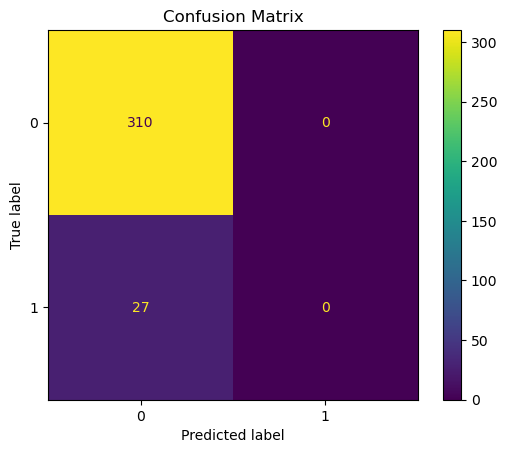

LightGBM Model Metrics:
Accuracy: 0.9199
ROC AUC: 0.5452
Average Precision: 0.0919
Balanced Accuracy: 0.5000


In [103]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)

# Confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()

plt.title('Confusion Matrix')
plt.show()

print(f'LightGBM Model Metrics:')
print(f'Accuracy: {accuracy:0.4f}')
print(f'ROC AUC: {roc_auc:0.4f}')
print(f'Average Precision: {average_precision:0.4f}')
print(f'Balanced Accuracy: {balanced_accuracy:0.4f}')


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


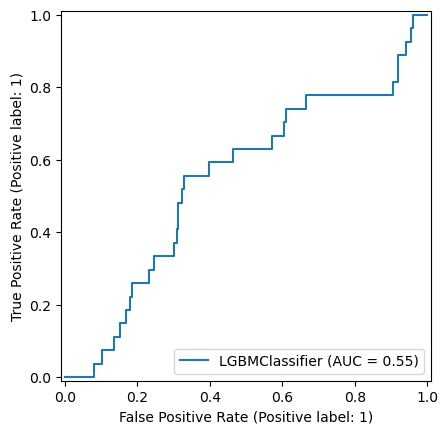

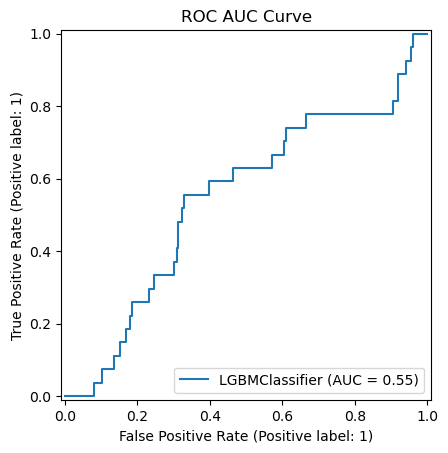

In [104]:
from sklearn.metrics import RocCurveDisplay

# Generate ROC AUC curve
roc_display = RocCurveDisplay.from_estimator(clf, X_test, y_test)
roc_display.plot()

plt.title('ROC AUC Curve')
plt.show()


In [105]:
y_pred_train = clf.predict(X_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [106]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


## During Interview Implementation

Loading data...
Splitting data...
Training model...
Evaluating model...


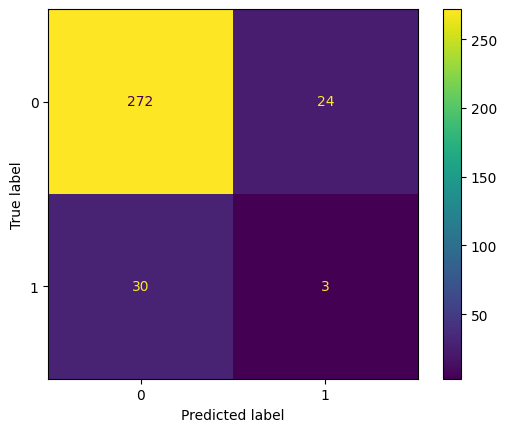

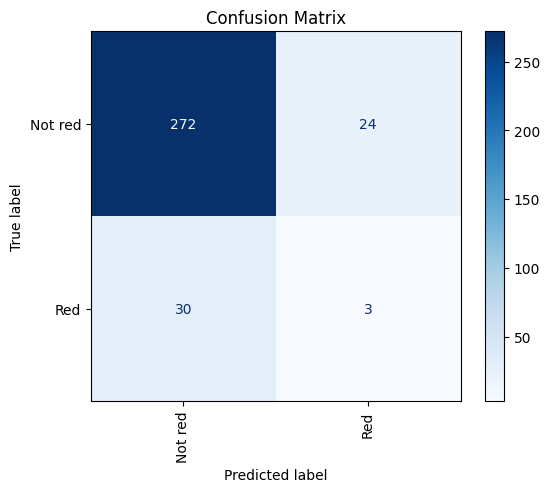

--------------------------------------------------
accuracy: 0.8359
roc_auc: 0.4563
average_precision: 0.0939
balanced_accuracy: 0.5049
--------------------------------------------------
Saving Model ...
Model saved as model.joblib
Training completed successfully!


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
)
import lightgbm as lgb
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')


def save_model(model, file_name: str = 'model.joblib'):
    """
    Serialize the model to a file
    """
    joblib.dump(model, file_name)
    print(f"Model saved as {file_name}")


def evaluate_model(model, X_test, y_test):
    """
    Evaluate model with adjusted threshold
    """
    y_pred = model.predict_proba(X_test)[:, 1]

    thresholds = np.arange(0.3, 0.7, 0.05)
    best_threshold = 0.5
    best_balanced_accuracy = 0

    for threshold in thresholds:
        y_pred_binary = (y_pred >= threshold).astype(int)
        balanced_acc = balanced_accuracy_score(y_test, y_pred_binary)
        if balanced_acc > best_balanced_accuracy:
            best_balanced_accuracy = balanced_acc
            best_threshold = threshold

    y_pred_binary = (y_pred >= best_threshold).astype(int)

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred_binary),
        'roc_auc': roc_auc_score(y_test, y_pred),
        'average_precision': average_precision_score(y_test, y_pred),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_pred_binary)
    }

    confusion = confusion_matrix(y_test, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
    disp.plot()
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    disp.ax_.set_xticklabels(['Not red', 'Red'])
    disp.ax_.set_yticklabels(['Not red', 'Red'])
    plt.title('Confusion Matrix')
    plt.show()

    print('-'*50)
    for metric_name, value in metrics.items():
        print(f'{metric_name}: {value:0.4f}')

    return metrics


def split_data(X, y, test_size=0.2, random_state=42):
    """
    Generate data splits
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


def preprocess_data(df1, df2, df3):
    """
    Preprocess the dataframes before training
    """
    categorical_cols = ['ds1_f_10', 'ds1_f_38', 'ds1_f_41']
    for col in categorical_cols:
        df1[col] = LabelEncoder().fit_transform(df1[col])

    df1 = df1.drop(columns=['ds1_f_37', 'ds1_f_40'])
    df2 = df2.drop(columns=['ds2_f_8', 'ds2_f_9', 'ds2_f_10', 'ds2_f_6',
                           'ds2_f_24', 'ds2_f_11', 'ds2_f_12', 'ds2_f_13', 'ds2_f_23'])

    categorical_cols = ['ds2_f_1', 'ds2_f_4', 'ds2_f_5', 'ds2_f_7', 'ds2_f_8',
                       'ds2_f_27', 'ds2_f_29', 'ds2_f_9', 'ds2_f_10', 'ds2_f_32']

    for col in categorical_cols:
        if col in df2.columns:
            le = LabelEncoder()
            df2[col] = le.fit_transform(df2[col].astype(str))
            freq = df2[col].value_counts()
            df2[f'{col}_freq'] = df2[col].map(freq)

    final_df = df1.merge(df2, on='mid', how='inner')
    final_df = final_df.merge(df3, on='mid', how='inner')

    return final_df


def load_data(df1, df2, df3, df_train, df_test):
    """
    Load and prepare the data from DataFrames
    """
    n_rows = min(len(df1), len(df2), len(df3), len(df_train))
    df1 = df1.iloc[:n_rows]
    df2 = df2.iloc[:n_rows]
    df3 = df3.iloc[:n_rows]
    df_train = df_train.iloc[:n_rows]

    X = preprocess_data(df1, df2, df3)
    y = df_train['target_label']

    X_test = X[X['mid'].isin(df_test['mid'])]
    y_test = df_test.set_index('mid').loc[X_test['mid']]['target_label']

    X_train = X[~X['mid'].isin(df_test['mid'])]
    y_train = y[~X['mid'].isin(df_test['mid'])]

    return X_train, X_test, y_train, y_test


def train_model(X_train, y_train, X_test, y_test):
    """
    Train the LightGBM model with improved class balancing and parameters
    """
    n_samples = len(y_train)
    n_positive = sum(y_train)
    n_negative = n_samples - n_positive
    scale_pos_weight = n_negative / n_positive

    params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': ['binary_logloss', 'auc'],
        'num_leaves': 62,
        'learning_rate': 0.01,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.7,
        'bagging_freq': 5,
        'max_depth': 8,
        'min_data_in_leaf': 10,
        'scale_pos_weight': scale_pos_weight * 2,
        'verbose': -1
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
    )

    return model


def train(df1, df2, df3, df_train, df_test):
    """
    Main training pipeline
    """
    print("Loading data...")
    X_train, X_test, y_train, y_test = load_data(df1, df2, df3, df_train, df_test)

    print("Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X_train, y_train)

    print("Training model...")
    model = train_model(X_train, y_train, X_test, y_test)

    print("Evaluating model...")
    evaluate_model(model, X_test, y_test)

    print(f"""{'-' * 50}\nSaving Model ...""")
    save_model(model)

    print("Training completed successfully!")


train(df1, df2, df3, df_train, df_test)
